In [37]:
import string
import numpy as np
import igraph
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import distance #for lev, hamming , jaccard

#import sys
#np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
#order = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"] #RANDOM SAMPLE ORDERING, USE YOUR OWN
#order = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"] #RANDOM SAMPLE ORDERING, USE YOUR OWN
order = ["V", "Y", "T", "W", "P", "E", "C", "G", "R", "L", "I", "N", "M", "S", "H", "F", "K", "D", "Q", "A"] #RANDOM SAMPLE ORDERING


In [39]:

vals= {} #assign an incremement or decrement to each alphabet letter
id=-((len(order)+1)/2)
for i in order:
	if id == 0:
		vals["_"]=id
		id+=1
	vals[i]=id
	id+=1
print (vals)


{'V': -10.5, 'Y': -9.5, 'T': -8.5, 'W': -7.5, 'P': -6.5, 'E': -5.5, 'C': -4.5, 'G': -3.5, 'R': -2.5, 'L': -1.5, 'I': -0.5, 'N': 0.5, 'M': 1.5, 'S': 2.5, 'H': 3.5, 'F': 4.5, 'K': 5.5, 'D': 6.5, 'Q': 7.5, 'A': 8.5}


In [40]:
#extra code

start=0

f = open('data1.csv')
csv_f = csv.reader(f)
with open("dump.txt",'w') as WF:
    for row in csv_f:
        #print (row[1])
        for x in row[1]:
            #print ('x=',x) #printing one letter one by one
            if x in vals:
                    #print (vals[x]) # converting only the capital letters of the word to a number
                    #print (vals[x],"+",start,"=",start+vals[x]) #printing the added values
                    start+=vals[x] #adding the converted numbers
            else:
                    #print (start)
                    #print ("entered else:",start ,"+", vals[" "],"=",start+vals[" "]) # handling encounter of other letters 
                    start+=vals[" "]
            WF.write(str(start)+" ")

KeyError: ' '

In [41]:
#DATA 1
#New time series method
#WORKING 

f = open('data1.csv')
csv_f = csv.reader(f)

a = []
with open('data1_new_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                d.append(0)
                print (d[0])
                count=0
                for x in col[1]:
                    print (x) # letter
                    c = vals[x]
                    print(c) #vals of letter x
                    a=c+d[count]
                    d.append(a)
                    count+=1
                    
                    #print(a)
                print (d)
                wr = csv.writer(cf,lineterminator='\r')
                wr.writerow(d)

['name', ' sequence', ' source']
DDSSSASGQQQESSVSSQSEASTSSQLG
0
D
6.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 6.5, 13.0, 15.5, 18.0, 20.5, 29.0, 31.5, 28.0, 35.5, 43.0, 50.5, 45.0, 47.5, 50.0, 39.5, 42.0, 44.5, 52.0, 54.5, 49.0, 57.5, 60.0, 51.5, 54.0, 56.5, 64.0, 62.5, 59.0]
ADSSSAGGQQQESSVSSQSDQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 24.0, 31.5, 39.0, 46.5, 41.0, 43.5, 46.0, 35.5, 38.0, 40.5, 48.0, 50.5, 57.0, 64.5, 73.0, 75.5, 67.0, 69.5, 72.0, 79.5, 78.0, 74.5]
ADSSSAGGQQQESSVSSQSGQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7

2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 44.0, 46.5, 54.0, 56.5, 63.0, 70.5, 79.0, 81.5, 73.0, 75.5, 78.0, 85.5, 84.0, 80.5]
ADSSSAGGQQHESSVSSQSDQASTSSQLW
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
H
3.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
W
-7.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 24.0, 31.5, 39.0, 42.5, 37.0, 39.5, 42.0, 31.5, 34.0, 36.5, 44.0, 46.5, 53.0, 60.5, 69.0, 71.5, 63.0, 65.5, 68.0, 75.5, 74.0, 66.5]
AGSSSAGGQQQESSVSSQSDQASTSSQLG
0
A
8.5
G
-3.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 5.0, 7.5, 10.0, 12.5, 21.0, 17.5, 14.0, 21.5, 29.0, 36.5, 31.0, 33.5, 36.0, 25.5, 28.0, 30.5, 38.0, 40.5, 47.0, 54.5, 63.0, 65.5,

2.5
E
-5.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 5.0, 7.5, 10.0, 12.5, 7.0, 9.5, 6.0, 13.5, 21.0, 28.5, 23.0, 25.5, 28.0, 17.5, 16.0, 18.5, 26.0, 28.5, 25.0, 32.5, 41.0, 43.5, 35.0, 37.5, 40.0, 47.5, 46.0, 42.5]
TDSSSASDQQQESSVSSQSGQASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 23.0, 30.5, 38.0, 45.5, 40.0, 42.5, 45.0, 34.5, 37.0, 39.5, 47.0, 49.5, 46.0, 53.5, 62.0, 64.5, 56.0, 58.5, 61.0, 68.5, 67.0, 63.5]
ADSSSASGQQQKSSVLSQSSQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
K
5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
S
2.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5,

2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 46.0, 35.5, 29.0, 31.5, 39.0, 41.5, 38.0, 45.5, 54.0, 56.5, 48.0, 50.5, 53.0, 60.5, 59.0, 55.5]
ADGSSAGDQQQESGVLSQSGQASTSSQLG
0
A
8.5
D
6.5
G
-3.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
G
-3.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 11.5, 14.0, 16.5, 25.0, 21.5, 28.0, 35.5, 43.0, 50.5, 45.0, 47.5, 44.0, 33.5, 32.0, 34.5, 42.0, 44.5, 41.0, 48.5, 57.0, 59.5, 51.0, 53.5, 56.0, 63.5, 62.0, 58.5]
TDSSSASGQQQESGVSSQSDASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
G
-3.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 29.0, 18.5, 21.0, 23.5, 31.0, 33.5, 40.0, 48.5, 51.0, 42.5, 45.0, 47.5, 55.0, 53.5, 50.0]
ADSSSVSGQQQESSVLSQSGQA

2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 5.0, 7.5, 10.0, 12.5, 21.0, 17.5, 14.0, 21.5, 29.0, 36.5, 31.0, 33.5, 36.0, 25.5, 28.0, 30.5, 38.0, 40.5, 35.0, 43.5, 46.0, 37.5, 40.0, 42.5, 50.0, 48.5, 45.0, 41.5]
ADSSSASGQQQESSVLSQSEASTSSQLGG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 50.0, 52.5, 47.0, 55.5, 58.0, 49.5, 52.0, 54.5, 62.0, 60.5, 57.0, 53.5]
TDSSSAGDQQQESSVSSQSDASTSSQLR
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
R
-2.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 10.5, 17.0, 24.5, 32.0, 39.5, 34.0, 36.5, 39.0, 28.5, 31.0, 33.5, 41.0, 43.5, 50.0, 58.5, 61.0, 52.5,

L
-1.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 17.0, 19.5, 16.0, 23.5, 31.0, 38.5, 33.0, 35.5, 38.0, 27.5, 26.0, 28.5, 36.0, 38.5, 35.0, 42.5, 51.0, 53.5, 45.0, 47.5, 50.0, 57.5, 56.0, 52.5]
TDSSSAGGQQQESSVSSQSDASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 10.5, 7.0, 14.5, 22.0, 29.5, 24.0, 26.5, 29.0, 18.5, 21.0, 23.5, 31.0, 33.5, 40.0, 48.5, 51.0, 42.5, 45.0, 47.5, 55.0, 53.5, 50.0]
ADGSSAGDQQQESSVSSQSGQASTSSQLG
0
A
8.5
D
6.5
G
-3.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 11.5, 14.0, 16.5, 25.0, 21.5, 28.0, 35.5, 43.0, 50.5, 45.0, 47.5, 50.0, 39.5, 42.0, 44.5, 52.0, 54.5, 51.0, 58.5, 67.0, 69.5, 61

E
-5.5
A
8.5
R
-2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 49.0, 38.5, 41.0, 43.5, 51.0, 53.5, 48.0, 56.5, 54.0, 45.5, 48.0, 50.5, 58.0, 56.5, 53.0, 49.5]
ADSSSASGQQQESSVSSQSEASSSSQLGG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
S
2.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 44.0, 46.5, 54.0, 56.5, 51.0, 59.5, 62.0, 64.5, 67.0, 69.5, 77.0, 75.5, 72.0, 68.5]
ADSSSASGQQQESIVSSQSEASTSSQLGG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
I
-0.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 49.0, 38.5, 41.0, 43.5, 51.0, 53.5, 48.0, 56.5, 59.0, 50.5, 53.0, 55.

7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 29.0, 18.5, 17.0, 10.5, 18.0, 20.5, 17.0, 24.5, 33.0, 35.5, 27.0, 29.5, 32.0, 39.5, 38.0, 34.5]
TDSSSASGQQQESSVLPQGDQASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
P
-6.5
Q
7.5
G
-3.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 35.0, 24.5, 23.0, 16.5, 24.0, 20.5, 27.0, 34.5, 43.0, 45.5, 37.0, 39.5, 42.0, 49.5, 48.0, 44.5]
TDSSSASGQQQESSVLSQGDQASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
G
-3.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 35.0, 24.5, 23.0, 25.5, 33.0, 29.5, 36.0, 43.5, 52.0, 54.5, 46.0, 48.5, 51.0, 58.5, 57.0, 53.5]
AGSSSASGQQQDSSVLSQGDQAST

In [42]:
#len(data1csv)

In [43]:
#extra code

start=0

f = open('data1.csv')
csv_f = csv.reader(f)
with open("dump.txt",'w') as WF:
    for row in csv_f:
        #print (row[1])
        for x in row[1]:
            #print ('x=',x) #printing one letter one by one
            if x in vals:
                    #print (vals[x]) # converting only the capital letters of the word to a number
                    #print (vals[x],"+",start,"=",start+vals[x]) #printing the added values
                    start+=vals[x] #adding the converted numbers
            else:
                    #print (start)
                    #print ("entered else:",start ,"+", vals[" "],"=",start+vals[" "]) # handling encounter of other letters 
                    #start+=vals[" "]
                WF.write(str(start)+" ")

#### DATA 1 - Converting to time series

In [44]:
#DATA 1
#New time series method
#WORKING 

f = open('data1.csv')
csv_f = csv.reader(f)

a = []
with open('data1_New_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                d.append(0)
                print (d[0])
                count=0
                for x in col[1]:
                    print (x) # letter
                    c = vals[x]
                    print(c) #vals of letter x
                    a=c+d[count]
                    d.append(a)
                    count+=1
                    
                    #print(a)
                print (d)
                wr = csv.writer(cf,lineterminator='\r')
                wr.writerow(d)

['name', ' sequence', ' source']
DDSSSASGQQQESSVSSQSEASTSSQLG
0
D
6.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 6.5, 13.0, 15.5, 18.0, 20.5, 29.0, 31.5, 28.0, 35.5, 43.0, 50.5, 45.0, 47.5, 50.0, 39.5, 42.0, 44.5, 52.0, 54.5, 49.0, 57.5, 60.0, 51.5, 54.0, 56.5, 64.0, 62.5, 59.0]
ADSSSAGGQQQESSVSSQSDQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 24.0, 31.5, 39.0, 46.5, 41.0, 43.5, 46.0, 35.5, 38.0, 40.5, 48.0, 50.5, 57.0, 64.5, 73.0, 75.5, 67.0, 69.5, 72.0, 79.5, 78.0, 74.5]
ADSSSAGGQQQESSVSSQSGQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7

2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 2.5, 11.0, 7.5, 4.0, 11.5, 19.0, 26.5, 21.0, 23.5, 26.0, 15.5, 18.0, 20.5, 28.0, 30.5, 37.0, 44.5, 53.0, 55.5, 47.0, 49.5, 52.0, 59.5, 58.0, 54.5]
TDSSSASGQQQESSGSSQSGQASHSAQSG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
G
-3.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
H
3.5
S
2.5
A
8.5
Q
7.5
S
2.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 35.0, 31.5, 34.0, 36.5, 44.0, 46.5, 43.0, 50.5, 59.0, 61.5, 65.0, 67.5, 76.0, 83.5, 86.0, 82.5]
ADSSSASGQQQESSVSSQSDQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 44.0, 46.5, 54.0, 56.5, 63.0, 70.5, 79.0, 81.5, 73.0, 75.5, 78.0, 85.5, 84.0, 80.5]
ADSSSAGGQQHESSVSSQSDQASTSSQLW

Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 30.0, 32.5, 35.0, 24.5, 23.0, 25.5, 33.0, 35.5, 42.0, 49.5, 58.0, 60.5, 52.0, 54.5, 57.0, 64.5, 67.0, 63.5]
ADSSSASGQQQESSVLSQSSQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
S
2.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 50.0, 52.5, 55.0, 62.5, 71.0, 73.5, 65.0, 67.5, 70.0, 77.5, 76.0, 72.5]
ADSSSASGQQQESSVLSQSDQASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
D
6.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 50.0, 52.5, 59.0, 66.5, 75.0, 77.5, 69.0,

S
2.5
S
2.5
V
-10.5
S
2.5
F
4.5
Q
7.5
T
-8.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -1.5, 2.0, 4.5, 7.0, 9.5, 18.0, 20.5, 17.0, 24.5, 32.0, 39.5, 34.0, 36.5, 39.0, 28.5, 31.0, 35.5, 43.0, 34.5, 31.0, 38.5, 47.0, 49.5, 41.0, 43.5, 46.0, 53.5, 52.0, 48.5]
TDSSSAGDQHQESSVSSQSGQASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
H
3.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 10.5, 17.0, 24.5, 28.0, 35.5, 30.0, 32.5, 35.0, 24.5, 27.0, 29.5, 37.0, 39.5, 36.0, 43.5, 52.0, 54.5, 46.0, 48.5, 51.0, 58.5, 57.0, 53.5]
TDSSSASGEQQESSVLSPSGEASTSSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
E
-5.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
P
-6.5
S
2.5
G
-3.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 7.5, 15.0, 22.5, 17.0, 19.5, 22.0, 11.5, 10.0, 12.5, 6.0, 8

2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
V
-10.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 46.0, 35.5, 34.0, 36.5, 44.0, 46.5, 43.0, 50.5, 59.0, 61.5, 53.0, 55.5, 58.0, 65.5, 64.0, 60.5, 50.0, 46.5]
ADSSSTGGQQQESSVSSHSEASTSSQLGG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
T
-8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
H
3.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 14.0, 10.5, 7.0, 14.5, 22.0, 29.5, 24.0, 26.5, 29.0, 18.5, 21.0, 23.5, 27.0, 29.5, 24.0, 32.5, 35.0, 26.5, 29.0, 31.5, 39.0, 37.5, 34.0, 30.5]
ADSSSASGQQQESSVLSQSEASTSSHLGG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
H
3.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 50

7.5
T
-8.5
G
-3.5
Q
7.5
A
8.5
S
2.5
P
-6.5
S
2.5
S
2.5
H
3.5
L
-1.5
R
-2.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 34.0, 41.5, 49.0, 54.5, 49.0, 51.5, 52.0, 41.5, 44.0, 46.5, 54.0, 45.5, 42.0, 49.5, 58.0, 60.5, 54.0, 56.5, 59.0, 62.5, 61.0, 58.5]
TDSSSAGDQQQGSGVSAQSGQASPWSQLG
0
T
-8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
G
-3.5
S
2.5
G
-3.5
V
-10.5
S
2.5
A
8.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
P
-6.5
W
-7.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 10.5, 17.0, 24.5, 32.0, 39.5, 36.0, 38.5, 35.0, 24.5, 27.0, 35.5, 43.0, 45.5, 42.0, 49.5, 58.0, 60.5, 54.0, 46.5, 49.0, 56.5, 55.0, 51.5]
ADSSSASGRHQKSNVSSQSEACTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
R
-2.5
H
3.5
Q
7.5
K
5.5
S
2.5
N
0.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
C
-4.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 27.5, 31.0, 38.5, 44.0, 46.5, 47.0, 36.5, 39.0, 41.5, 49.0, 51.5, 46.0, 54.5, 50.0, 41.5, 44.0, 4

E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 9.0, 5.5, 8.0, 10.5, 19.0, 21.5, 18.0, 25.5, 33.0, 40.5, 35.0, 37.5, 40.0, 29.5, 28.0, 30.5, 38.0, 40.5, 47.0, 41.5, 50.0, 52.5, 44.0, 46.5, 49.0, 56.5, 55.0, 51.5]
ADSSSASGQQQESSVLSQSDEASTSSQLG
0
A
8.5
D
6.5
S
2.5
S
2.5
S
2.5
A
8.5
S
2.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
D
6.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 50.0, 52.5, 59.0, 53.5, 62.0, 64.5, 56.0, 58.5, 61.0, 68.5, 67.0, 63.5]
TDSSPEGQQQESSVFSQSAQASTSSQSG
0
T
-8.5
D
6.5
S
2.5
S
2.5
P
-6.5
E
-5.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
F
4.5
S
2.5
Q
7.5
S
2.5
A
8.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
S
2.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, -3.5, -9.0, -12.5, -5.0, 2.5, 10.0, 4.5, 7.0, 9.5, -1.0, 3.5, 6.0, 13.5, 16.0, 24.5, 32.0, 40.5, 43.0, 34.5, 37.0, 39.5, 47.0, 49.5, 46.0]
ADS

2.5
Q
7.5
S
2.5
G
-3.5
Q
7.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, -8.5, -2.0, 0.5, 3.0, 5.5, 14.0, 16.5, 13.0, 20.5, 28.0, 35.5, 32.0, 34.5, 31.0, 20.5, 23.0, 25.5, 33.0, 35.5, 32.0, 39.5, 48.0, 50.5, 42.0, 44.5, 47.0, 54.5, 53.0, 49.5]
AGSSSAGGQQQESSVLSQSEASTSSQLGG
0
A
8.5
G
-3.5
S
2.5
S
2.5
S
2.5
A
8.5
G
-3.5
G
-3.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
L
-1.5
S
2.5
Q
7.5
S
2.5
E
-5.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
G
-3.5
[0, 8.5, 5.0, 7.5, 10.0, 12.5, 21.0, 17.5, 14.0, 21.5, 29.0, 36.5, 31.0, 33.5, 36.0, 25.5, 24.0, 26.5, 34.0, 36.5, 31.0, 39.5, 42.0, 33.5, 36.0, 38.5, 46.0, 44.5, 41.0, 37.5]
ADGSSAGDQQQESSVSSQSDASTSSQLG
0
A
8.5
D
6.5
G
-3.5
S
2.5
S
2.5
A
8.5
G
-3.5
D
6.5
Q
7.5
Q
7.5
Q
7.5
E
-5.5
S
2.5
S
2.5
V
-10.5
S
2.5
S
2.5
Q
7.5
S
2.5
D
6.5
A
8.5
S
2.5
T
-8.5
S
2.5
S
2.5
Q
7.5
L
-1.5
G
-3.5
[0, 8.5, 15.0, 11.5, 14.0, 16.5, 25.0, 21.5, 28.0, 35.5, 43.0, 50.5, 45.0, 47.5, 50.0, 39.5, 42.0, 44.5, 52.0, 54.5, 61.0, 69.5, 72.0, 63.5, 66.0

#### DATA 2 - Converting to timeseries 

In [45]:
# DATA 2
#New time series method
#WORKING 

f = open('data2.csv')
csv_f = csv.reader(f)
a = []
with open('data2_New_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                d.append(0)
                print (d[0])
                count=0
                for x in col[1]:
                    print (x) # letter
                    c = vals[x]
                    print(c) #vals of letter x
                    a=c+d[count]
                    d.append(a)
                    count+=1
                    
                    #print(a)
                print (d)
                wr = csv.writer(cf,lineterminator='\r')
                wr.writerow(d)                        


['ID', 'Sequence']
WKQENGMWYFYNTDGSMATG
0
W
-7.5
K
5.5
Q
7.5
E
-5.5
N
0.5
G
-3.5
M
1.5
W
-7.5
Y
-9.5
F
4.5
Y
-9.5
N
0.5
T
-8.5
D
6.5
G
-3.5
S
2.5
M
1.5
A
8.5
T
-8.5
G
-3.5
[0, -7.5, -2.0, 5.5, 0.0, 0.5, -3.0, -1.5, -9.0, -18.5, -14.0, -23.5, -23.0, -31.5, -25.0, -28.5, -26.0, -24.5, -16.0, -24.5, -28.0]
WLQNNGSWYYLNANGSMATG
0
W
-7.5
L
-1.5
Q
7.5
N
0.5
N
0.5
G
-3.5
S
2.5
W
-7.5
Y
-9.5
Y
-9.5
L
-1.5
N
0.5
A
8.5
N
0.5
G
-3.5
S
2.5
M
1.5
A
8.5
T
-8.5
G
-3.5
[0, -7.5, -9.0, -1.5, -1.0, -0.5, -4.0, -1.5, -9.0, -18.5, -28.0, -29.5, -29.0, -20.5, -20.0, -23.5, -21.0, -19.5, -11.0, -19.5, -23.0]
WVKDGDTWYYLEASGAMKASQ
0
W
-7.5
V
-10.5
K
5.5
D
6.5
G
-3.5
D
6.5
T
-8.5
W
-7.5
Y
-9.5
Y
-9.5
L
-1.5
E
-5.5
A
8.5
S
2.5
G
-3.5
A
8.5
M
1.5
K
5.5
A
8.5
S
2.5
Q
7.5
[0, -7.5, -18.0, -12.5, -6.0, -9.5, -3.0, -11.5, -19.0, -28.5, -38.0, -39.5, -45.0, -36.5, -34.0, -37.5, -29.0, -27.5, -22.0, -13.5, -11.0, -3.5]
WFKVSDKWYYVNSNGAMATG
0
W
-7.5
F
4.5
K
5.5
V
-10.5
S
2.5
D
6.5
K
5.5
W
-7.5
Y
-9.5
Y
-9.5
V
-10.5
N


##### (additional work) Placing values in one list and plotting (DATA 1)

In [46]:
#placing all the values in one list mlist[0:]
# using this for plotting 
#data1
length = 0
mlist = []
for line in open("data1_New_timeSeries.csv"):
        reader_file = csv.reader(open("data1_New_timeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            mlist.append(float(x[i]))
        #mlist.append(y)
        length = max(length, len(y))


print(length)

32


(-50, 50)

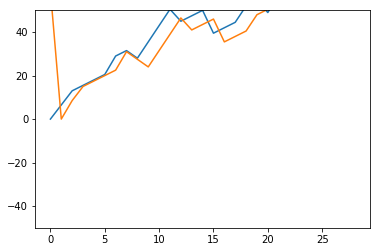

In [47]:
plt.plot(mlist[:28]) #first sequence
plt.plot(mlist[28:57]) # second sequence 
plt.ylim(-50, 50)

#### DATA 1 - converting list of lists to array to lists & plotting

In [48]:
#data1
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)

length = 0
mlist1 = []
for line in open("data1_New_timeSeries.csv"):
        reader_file = csv.reader(open("data1_New_timeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            #mlist.append(float(x[i]))
        mlist1.append(y)
        length = max(length, len(y))
        arr = np.array(mlist1)
        
        
print (length)
#mlist1
        
print(arr[1])
print("\n")        
print(arr[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

for i in range(1,234):
    print("a[",i,"]")
    print(len(mlist1[i]))

32
[0.0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 24.0, 31.5, 39.0, 46.5, 41.0, 43.5, 46.0, 35.5, 38.0, 40.5, 48.0, 50.5, 57.0, 64.5, 73.0, 75.5, 67.0, 69.5, 72.0, 79.5, 78.0, 74.5]


[0.0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 27.5, 24.0, 31.5, 39.0, 46.5, 41.0, 43.5, 46.0, 35.5, 38.0, 40.5, 48.0, 50.5, 47.0, 54.5, 63.0, 65.5, 57.0, 59.5, 62.0, 69.5, 68.0, 64.5]
a[ 1 ]
30
a[ 2 ]
30
a[ 3 ]
30
a[ 4 ]
29
a[ 5 ]
30
a[ 6 ]
30
a[ 7 ]
30
a[ 8 ]
30
a[ 9 ]
30
a[ 10 ]
29
a[ 11 ]
24
a[ 12 ]
30
a[ 13 ]
29
a[ 14 ]
30
a[ 15 ]
30
a[ 16 ]
30
a[ 17 ]
29
a[ 18 ]
30
a[ 19 ]
29
a[ 20 ]
29
a[ 21 ]
29
a[ 22 ]
29
a[ 23 ]
30
a[ 24 ]
30
a[ 25 ]
30
a[ 26 ]
30
a[ 27 ]
30
a[ 28 ]
26
a[ 29 ]
30
a[ 30 ]
30
a[ 31 ]
30
a[ 32 ]
30
a[ 33 ]
30
a[ 34 ]
29
a[ 35 ]
30
a[ 36 ]
30
a[ 37 ]
30
a[ 38 ]
30
a[ 39 ]
30
a[ 40 ]
29
a[ 41 ]
30
a[ 42 ]
32
a[ 43 ]
30
a[ 44 ]
29
a[ 45 ]
30
a[ 46 ]
30
a[ 47 ]
30
a[ 48 ]
30
a[ 49 ]
30
a[ 50 ]
30
a[ 51 ]
30
a[ 52 ]
30
a[ 53 ]
30
a[ 54 ]
30
a[ 55 ]
30
a[ 56 ]
30
a[ 57 ]
30
a[ 58 ]
30
a[ 59 ]


(-50, 50)

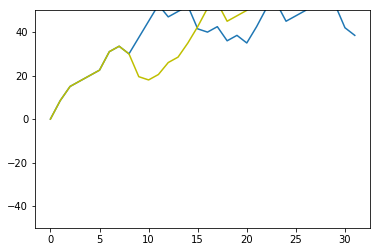

In [49]:
plt.plot(arr[42]) #first sequence
plt.plot(arr[199],'y') # second sequence 
plt.ylim(-50,50)

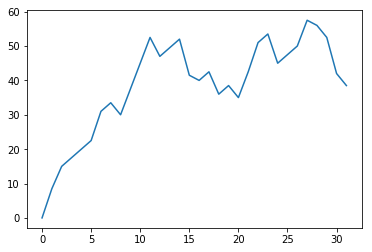

In [50]:
plt.plot(arr[42]) # 23 elements 


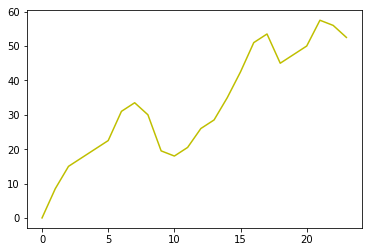

In [51]:
plt.plot(arr[199],'y') #31 elements

(-50, 50)

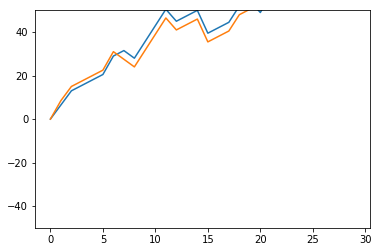

In [52]:
plt.plot(arr[0]) #first sequence
plt.plot(arr[1]) # second sequence 
plt.ylim(-50,50)

#### DATA 1 Padding

In [53]:
#padding 0s at the end of the arrays
arr_of_arr= []
li_padded = []
for i in range(0,len(arr)):
    abc = np.array(mlist1[i])
    a_padded = np.pad(abc,(0,length-len(mlist1[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded.append(a_padded)

    
print ((li_padded)) 
length
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[array([ 0. ,  6.5, 13. , 15.5, 18. , 20.5, 29. , 31.5, 28. , 35.5, 43. ,
       50.5, 45. , 47.5, 50. , 39.5, 42. , 44.5, 52. , 54.5, 49. , 57.5,
       60. , 51.5, 54. , 56.5, 64. , 62.5, 59. ,  0. ,  0. ,  0. ]), array([ 0. ,  8.5, 15. , 17.5, 20. , 22.5, 31. , 27.5, 24. , 31.5, 39. ,
       46.5, 41. , 43.5, 46. , 35.5, 38. , 40.5, 48. , 50.5, 57. , 64.5,
       73. , 75.5, 67. , 69.5, 72. , 79.5, 78. , 74.5,  0. ,  0. ]), array([ 0. ,  8.5, 15. , 17.5, 20. , 22.5, 31. , 27.5, 24. , 31.5, 39. ,
       46.5, 41. , 43.5, 46. , 35.5, 38. , 40.5, 48. , 50.5, 47. , 54.5,
       63. , 65.5, 57. , 59.5, 62. , 69.5, 68. , 64.5,  0. ,  0. ]), array([ 0. ,  8.5, 15. , 17.5, 20. , 22.5, 31. , 33.5, 30. , 37.5, 45. ,
       52.5, 47. , 49.5, 52. , 41.5, 44. , 46.5, 54. , 56.5, 51. , 59.5,
       62. , 53.5, 56. , 58.5, 66. , 64.5, 61. , 57.5,  0. ,  0. ]), array([ 0. ,  8.5, 15. , 17.5, 20. , 22.5, 31. , 33.5, 30. , 37.5, 45. ,
       52.5, 47. , 49.5, 52. , 41.5, 44. , 46.5, 54. , 56.5, 51. ,

32

##### DATA 2 converting "list of lists" to "array of lists"

In [54]:
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]

length2 = 0
mlist2 = []
for line in open("data2_New_timeSeries.csv"):
        reader_file2 = csv.reader(open("data2_New_timeSeries.csv"))
        length_of_file2 = len(list(reader_file2))
        x2 = line.split(',')
        y2 = []
        for i in range(len(x2)):
            y2.append(float(x2[i]))
            #mlist.append(float(x[i]))
        mlist2.append(y2)
        length2 = max(length2, len(y2))
        arr2 = np.array(mlist2)
        #print (len(mlist2))

#print (mlist2[0])
print(arr2[20])
print("\n")        
print(arr2[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

len(mlist2[1])

[0.0, -7.5, -18.0, -12.5, -6.0, -9.5, -3.0, -11.5, -19.0, -28.5, -38.0, -39.5, -45.0, -36.5, -34.0, -37.5, -29.0, -27.5, -22.0, -13.5, -13.0, -5.5]


[0.0, -7.5, -18.0, -12.5, -6.0, -9.5, -3.0, -11.5, -19.0, -28.5, -38.0, -39.5, -45.0, -36.5, -34.0, -37.5, -29.0, -27.5, -22.0, -13.5, -11.0, -3.5]


21

#### Padding data2

In [55]:
#padding 0s at the end of the arrays (padding  for dataset 2 is not required, but i still it did it anyway ¯\_(ツ)_/¯ )
# 0 values are spaces
arr_of_arr2= []
li_padded2 = []
for i in range(0,len(arr2)):
    abc2 = np.array(mlist2[i])
    a_padded2 = np.pad(abc2,(0,length2-len(mlist2[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded2.append(a_padded2)

    
print ((li_padded2[2]))  #this is silimar to element[14]
print ((li_padded2[12]))
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[  0.   -7.5 -18.  -12.5  -6.   -9.5  -3.  -11.5 -19.  -28.5 -38.  -39.5
 -45.  -36.5 -34.  -37.5 -29.  -27.5 -22.  -13.5 -11.   -3.5]
[  0.   -7.5 -18.  -12.5  -6.   -9.5 -15.  -23.5 -31.  -40.5 -50.  -51.5
 -57.  -48.5 -46.  -49.5 -47.  -45.5 -40.  -31.5 -31.  -23.5]


# DISTANCE 

#### Fast Dynamic time warping 

In [56]:
#data1
print (li_padded[42]) #31
print (li_padded[199]) #199
distance, path = fastdtw(li_padded[42],li_padded[199],dist=euclidean)
print (distance)

[ 0.   8.5 15.  17.5 20.  22.5 31.  33.5 30.  37.5 45.  52.5 47.  49.5
 52.  41.5 40.  42.5 36.  38.5 35.  42.5 51.  53.5 45.  47.5 50.  57.5
 56.  52.5 42.  38.5]
[ 0.   8.5 15.  17.5 20.  22.5 31.  33.5 30.  19.5 18.  20.5 26.  28.5
 35.  42.5 51.  53.5 45.  47.5 50.  57.5 56.  52.5  0.   0.   0.   0.
  0.   0.   0.   0. ]
413.5


In [57]:
#data1
print (arr[42]) #31
print (arr[199]) #199
distance, path = fastdtw(arr[42],arr[199],dist=euclidean)
print (distance)

[0.0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 37.5, 45.0, 52.5, 47.0, 49.5, 52.0, 41.5, 40.0, 42.5, 36.0, 38.5, 35.0, 42.5, 51.0, 53.5, 45.0, 47.5, 50.0, 57.5, 56.0, 52.5, 42.0, 38.5]
[0.0, 8.5, 15.0, 17.5, 20.0, 22.5, 31.0, 33.5, 30.0, 19.5, 18.0, 20.5, 26.0, 28.5, 35.0, 42.5, 51.0, 53.5, 45.0, 47.5, 50.0, 57.5, 56.0, 52.5]
126.5


In [58]:
#data1

distance, path = fastdtw(li_padded[0],li_padded[1],dist=euclidean)
print (distance)

151.5


In [59]:
#data1
 
distance, path = fastdtw([-7.5,-7.5,4.5,4.5,4.5,-10.5,4.5,-3.5,-4.5,-4.5,-4.5,-5.5,4.5,4.5,8.5,4.5,4.5,-4.5,4.5,-5.5,-10.5,4.5,5.5,4.5,4.5,-4.5,-0.5,-3.5],[-10.5,-7.5,4.5,4.5,4.5,-10.5,-3.5,-3.5,-4.5,-4.5,-4.5,-5.5,4.5,4.5,8.5,4.5,4.5,-4.5,4.5,-7.5,-4.5,-10.5,4.5,5.5,4.5,4.5,-4.5,-0.5,-3.5],dist=euclidean)
print (distance)

14.0


In [60]:
#data2
distance2, path2 = fastdtw(li_padded2[0],li_padded2[14],dist=euclidean)
print (distance2)

13.0


In [61]:
#data2
distance2, path2 = fastdtw(li_padded2[2],li_padded2[12],dist=euclidean)
print (distance2)

117.0


In [62]:
%%time
len(arr)
#type(li_padded2[current_row])


Wall time: 0 ns


234

In [63]:
#DATA2 FAST DTW
current_row= 0
compare_row= 0
data2_arr_eucl = []
for current_row in range(0,len(arr2)):
    dist_values = []
    for comapre_row in range(0,len(arr2)):
        print ("current",current_row)
        print ("comapre",compare_row)
        distance,path = fastdtw(arr2[current_row],arr2[compare_row],dist=euclidean) 
        print(distance)
        dist_values.append(distance)
        compare_row=compare_row+1
    data2_arr_eucl.append(dist_values)
    current_row=current_row+1
    compare_row=0




current 0
comapre 0
0.0
current 0
comapre 1
64.5
current 0
comapre 2
150.0
current 0
comapre 3
70.5
current 0
comapre 4
102.0
current 0
comapre 5
49.5
current 0
comapre 6
88.5
current 0
comapre 7
57.5
current 0
comapre 8
69.5
current 0
comapre 9
66.5
current 0
comapre 10
69.0
current 0
comapre 11
63.5
current 0
comapre 12
222.0
current 0
comapre 13
129.0
current 0
comapre 14
13.0
current 0
comapre 15
78.0
current 0
comapre 16
59.5
current 0
comapre 17
98.0
current 0
comapre 18
198.0
current 0
comapre 19
259.0
current 0
comapre 20
146.0
current 1
comapre 0
64.5
current 1
comapre 1
0.0
current 1
comapre 2
143.0
current 1
comapre 3
45.0
current 1
comapre 4
103.0
current 1
comapre 5
57.5
current 1
comapre 6
99.5
current 1
comapre 7
10.0
current 1
comapre 8
76.5
current 1
comapre 9
58.5
current 1
comapre 10
87.5
current 1
comapre 11
14.5
current 1
comapre 12
266.5
current 1
comapre 13
165.0
current 1
comapre 14
58.5
current 1
comapre 15
26.5
current 1
comapre 16
93.0
current 1
comapre 17
86

comapre 7
34.0
current 15
comapre 8
87.5
current 15
comapre 9
58.5
current 15
comapre 10
105.5
current 15
comapre 11
41.0
current 15
comapre 12
296.5
current 15
comapre 13
195.0
current 15
comapre 14
63.0
current 15
comapre 15
0.0
current 15
comapre 16
116.0
current 15
comapre 17
117.5
current 15
comapre 18
303.5
current 15
comapre 19
357.5
current 15
comapre 20
130.5
current 16
comapre 0
59.5
current 16
comapre 1
93.0
current 16
comapre 2
124.5
current 16
comapre 3
92.0
current 16
comapre 4
67.0
current 16
comapre 5
56.0
current 16
comapre 6
71.5
current 16
comapre 7
84.0
current 16
comapre 8
68.0
current 16
comapre 9
67.0
current 16
comapre 10
58.0
current 16
comapre 11
83.5
current 16
comapre 12
187.5
current 16
comapre 13
105.0
current 16
comapre 14
73.5
current 16
comapre 15
116.0
current 16
comapre 16
0.0
current 16
comapre 17
75.5
current 16
comapre 18
146.5
current 16
comapre 19
208.5
current 16
comapre 20
120.5
current 17
comapre 0
98.0
current 17
comapre 1
86.5
current 17
com

In [64]:
df2_eucl =  pd.DataFrame(data2_arr_eucl)
df2_eucl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,64.5,150.0,70.5,102.0,49.5,88.5,57.5,69.5,66.5,69.0,63.5,222.0,129.0,13.0,78.0,59.5,98.0,198.0,259.0,146.0
1,64.5,0.0,143.0,45.0,103.0,57.5,99.5,10.0,76.5,58.5,87.5,14.5,266.5,165.0,58.5,26.5,93.0,86.5,273.5,327.5,139.0
2,150.0,143.0,0.0,136.5,92.0,133.0,142.0,141.0,84.5,128.0,90.5,146.0,117.0,192.5,134.0,132.5,124.5,108.0,162.5,212.0,4.0
3,70.5,45.0,136.5,0.0,112.5,60.0,58.0,39.5,83.5,70.0,90.5,43.0,261.0,120.5,69.0,64.0,92.0,89.0,253.5,306.5,132.5
4,102.0,103.0,92.0,112.5,0.0,104.5,61.0,105.5,34.0,127.5,28.5,117.0,140.0,108.0,118.0,135.0,67.0,35.5,116.0,167.0,88.0
5,49.5,57.5,133.0,60.0,104.5,0.0,76.5,58.5,67.5,26.5,78.5,47.0,216.0,157.5,56.5,70.5,56.0,89.5,223.5,289.5,129.0
6,88.5,99.5,142.0,58.0,61.0,76.5,0.0,100.0,72.5,107.5,72.5,97.5,181.5,62.0,106.5,129.5,71.5,48.0,148.0,192.0,138.0
7,57.5,10.0,141.0,39.5,105.5,58.5,100.0,0.0,75.5,58.5,78.0,24.5,266.5,143.5,51.5,34.0,84.0,86.0,258.5,309.5,137.0
8,69.5,76.5,84.5,83.5,34.0,67.5,72.5,75.5,0.0,86.5,10.0,90.5,131.5,141.5,79.5,87.5,68.0,56.5,148.0,198.5,80.5
9,66.5,58.5,128.0,70.0,127.5,26.5,107.5,58.5,86.5,0.0,90.5,48.0,240.0,187.5,53.5,58.5,67.0,117.5,253.5,319.5,126.0


In [32]:
len(li_padded2)

21

In [30]:
%%time
#DATA1 FAST DTW

current_row= 0
compare_row= 0
data1_arr_eucl = []
for current_row in range(0,len(arr)):
    dist_values = []
    for comapre_row in range(0,len(arr)):
        print ("current",current_row)
        print ("comapre",compare_row)
        distance,path = fastdtw(arr[current_row],arr[compare_row],dist=euclidean) 
        print(distance)
        dist_values.append(distance)
        compare_row=compare_row+1
    data1_arr_eucl.append(dist_values)
    current_row=current_row+1
    compare_row=0

current 0
comapre 0
0.0
current 0
comapre 1
256.0
current 0
comapre 2
221.0
current 0
comapre 3
80.5
current 0
comapre 4
74.0
current 0
comapre 5
233.5
current 0
comapre 6
24.5
current 0
comapre 7
243.5
current 0
comapre 8
24.5
current 0
comapre 9
365.5
current 0
comapre 10
370.5
current 0
comapre 11
101.5
current 0
comapre 12
139.5
current 0
comapre 13
232.0
current 0
comapre 14
48.5
current 0
comapre 15
214.0
current 0
comapre 16
339.5
current 0
comapre 17
188.0
current 0
comapre 18
250.0
current 0
comapre 19
242.0
current 0
comapre 20
75.5
current 0
comapre 21
55.5
current 0
comapre 22
257.0
current 0
comapre 23
437.5
current 0
comapre 24
240.5
current 0
comapre 25
81.0
current 0
comapre 26
77.0
current 0
comapre 27
198.0
current 0
comapre 28
112.5
current 0
comapre 29
220.0
current 0
comapre 30
115.5
current 0
comapre 31
196.5
current 0
comapre 32
161.5
current 0
comapre 33
41.5
current 0
comapre 34
168.5
current 0
comapre 35
237.5
current 0
comapre 36
158.5
current 0
comapre 37
22

comapre 84
188.5
current 1
comapre 85
435.5
current 1
comapre 86
85.5
current 1
comapre 87
116.5
current 1
comapre 88
115.5
current 1
comapre 89
837.5
current 1
comapre 90
586.5
current 1
comapre 91
29.0
current 1
comapre 92
103.0
current 1
comapre 93
121.5
current 1
comapre 94
522.0
current 1
comapre 95
321.0
current 1
comapre 96
564.0
current 1
comapre 97
547.5
current 1
comapre 98
212.5
current 1
comapre 99
222.5
current 1
comapre 100
137.0
current 1
comapre 101
323.0
current 1
comapre 102
271.5
current 1
comapre 103
167.5
current 1
comapre 104
108.0
current 1
comapre 105
99.0
current 1
comapre 106
265.5
current 1
comapre 107
491.5
current 1
comapre 108
100.0
current 1
comapre 109
141.0
current 1
comapre 110
143.0
current 1
comapre 111
231.5
current 1
comapre 112
71.0
current 1
comapre 113
833.0
current 1
comapre 114
273.0
current 1
comapre 115
231.5
current 1
comapre 116
281.5
current 1
comapre 117
53.0
current 1
comapre 118
202.0
current 1
comapre 119
382.0
current 1
comapre 120
9

527.0
current 2
comapre 165
249.0
current 2
comapre 166
106.5
current 2
comapre 167
221.5
current 2
comapre 168
242.5
current 2
comapre 169
131.0
current 2
comapre 170
106.5
current 2
comapre 171
151.5
current 2
comapre 172
56.5
current 2
comapre 173
76.0
current 2
comapre 174
222.5
current 2
comapre 175
239.0
current 2
comapre 176
638.0
current 2
comapre 177
149.0
current 2
comapre 178
710.5
current 2
comapre 179
55.0
current 2
comapre 180
193.0
current 2
comapre 181
177.0
current 2
comapre 182
330.5
current 2
comapre 183
320.5
current 2
comapre 184
59.5
current 2
comapre 185
306.5
current 2
comapre 186
434.5
current 2
comapre 187
57.5
current 2
comapre 188
61.5
current 2
comapre 189
56.5
current 2
comapre 190
443.5
current 2
comapre 191
146.0
current 2
comapre 192
79.5
current 2
comapre 193
136.0
current 2
comapre 194
60.5
current 2
comapre 195
318.5
current 2
comapre 196
106.5
current 2
comapre 197
126.0
current 2
comapre 198
473.5
current 2
comapre 199
250.0
current 2
comapre 200
2

KeyboardInterrupt: 

In [31]:
df_eucl =  pd.DataFrame(data1_arr_eucl)
df_eucl

NameError: name 'data1_arr_eucl' is not defined

In [ ]:
#readng time series data to var

data1TS = pd.read_csv('data1_New_TimeSeries.csv', header=None, sep='\n')
data1TS = data1TS[0].str.split('\d \,\d', expand=True)
data1csv = pd.read_csv('data1.csv',header=None)
data1TS


In [ ]:
# visualize distances
#df =  pd.DataFrame(index=)
#df
#data1csv.iloc[1]



## levenshtein Distance
Can only work with alphabets

In [65]:
data1csv = pd.read_csv('data1.csv',header=None,usecols=[1])
data2csv = pd.read_csv('data2.csv',header=None,usecols=[1])

data2csv[1].iloc[1]   #data1csv[column].iloc[row]
#data1csv.iloc[1]
#distance.levenshtein(data1csv[1].iloc[1],data1csv[1].iloc[0]) 

'WKQENGMWYFYNTDGSMATG'

In [66]:
data2TS = pd.read_csv('data2_New_TimeSeries.csv', header=None, sep='\n')
data2TS = data2TS[0].str.split('\d \,\d', expand=True)
data2TS[0:4]

,0
0,"0,-7.5,-2.0,5.5,0.0,0.5,-3.0,-1.5,-9.0,-18.5,-14.0,-23.5,-23.0,-31.5,-25.0,-28.5,-26.0,-24.5,-16.0,-24.5,-28.0"
1,"0,-7.5,-9.0,-1.5,-1.0,-0.5,-4.0,-1.5,-9.0,-18.5,-28.0,-29.5,-29.0,-20.5,-20.0,-23.5,-21.0,-19.5,-11.0,-19.5,-23.0"
2,"0,-7.5,-18.0,-12.5,-6.0,-9.5,-3.0,-11.5,-19.0,-28.5,-38.0,-39.5,-45.0,-36.5,-34.0,-37.5,-29.0,-27.5,-22.0,-13.5,-11.0,-3.5"
3,"0,-7.5,-3.0,2.5,-8.0,-5.5,1.0,6.5,-1.0,-10.5,-20.0,-30.5,-30.0,-27.5,-27.0,-30.5,-22.0,-20.5,-12.0,-20.5,-24.0"


In [67]:
import distance #for lev, hamming , jaccard


In [68]:
distance.levenshtein(data1csv[1].iloc[1],data1csv[1].iloc[2]) 

4

In [125]:
%%time
#DATA1
current_row= 1
compare_row= 1
data1_arr_leven = []
for current_row in range(1,len(arr)+1):
    dist_values = []
    for comapre_row in range(1,len(arr)+1):
        print ("current",current_row)
        print ("comapre",compare_row)
        levin_distance = distance.levenshtein(data1csv[1].iloc[current_row],data1csv[1].iloc[compare_row]) 
        print(levin_distance)
        dist_values.append(levin_distance)
        compare_row=compare_row+1
    data1_arr_leven.append(dist_values)
    current_row=current_row+1
    compare_row=1


current 1
comapre 1
0
current 1
comapre 2
4
current 1
comapre 3
4
current 1
comapre 4
2
current 1
comapre 5
1
current 1
comapre 6
3
current 1
comapre 7
3
current 1
comapre 8
4
current 1
comapre 9
2
current 1
comapre 10
5
current 1
comapre 11
6
current 1
comapre 12
10
current 1
comapre 13
7
current 1
comapre 14
2
current 1
comapre 15
4
current 1
comapre 16
5
current 1
comapre 17
5
current 1
comapre 18
2
current 1
comapre 19
5
current 1
comapre 20
1
current 1
comapre 21
2
current 1
comapre 22
2
current 1
comapre 23
2
current 1
comapre 24
5
current 1
comapre 25
5
current 1
comapre 26
3
current 1
comapre 27
4
current 1
comapre 28
3
current 1
comapre 29
7
current 1
comapre 30
7
current 1
comapre 31
3
current 1
comapre 32
6
current 1
comapre 33
5
current 1
comapre 34
2
current 1
comapre 35
5
current 1
comapre 36
5
current 1
comapre 37
6
current 1
comapre 38
4
current 1
comapre 39
4
current 1
comapre 40
4
current 1
comapre 41
3
current 1
comapre 42
5
current 1
comapre 43
7
current 1
comapre 4

comapre 125
4
current 2
comapre 126
5
current 2
comapre 127
7
current 2
comapre 128
6
current 2
comapre 129
5
current 2
comapre 130
6
current 2
comapre 131
8
current 2
comapre 132
4
current 2
comapre 133
13
current 2
comapre 134
5
current 2
comapre 135
2
current 2
comapre 136
2
current 2
comapre 137
4
current 2
comapre 138
4
current 2
comapre 139
2
current 2
comapre 140
3
current 2
comapre 141
6
current 2
comapre 142
10
current 2
comapre 143
5
current 2
comapre 144
6
current 2
comapre 145
6
current 2
comapre 146
4
current 2
comapre 147
4
current 2
comapre 148
7
current 2
comapre 149
6
current 2
comapre 150
4
current 2
comapre 151
5
current 2
comapre 152
5
current 2
comapre 153
6
current 2
comapre 154
6
current 2
comapre 155
7
current 2
comapre 156
7
current 2
comapre 157
7
current 2
comapre 158
5
current 2
comapre 159
5
current 2
comapre 160
8
current 2
comapre 161
8
current 2
comapre 162
8
current 2
comapre 163
8
current 2
comapre 164
6
current 2
comapre 165
5
current 2
comapre 166
9


4
current 4
comapre 64
4
current 4
comapre 65
4
current 4
comapre 66
6
current 4
comapre 67
5
current 4
comapre 68
6
current 4
comapre 69
2
current 4
comapre 70
6
current 4
comapre 71
5
current 4
comapre 72
6
current 4
comapre 73
5
current 4
comapre 74
7
current 4
comapre 75
6
current 4
comapre 76
6
current 4
comapre 77
6
current 4
comapre 78
6
current 4
comapre 79
7
current 4
comapre 80
5
current 4
comapre 81
8
current 4
comapre 82
4
current 4
comapre 83
5
current 4
comapre 84
5
current 4
comapre 85
6
current 4
comapre 86
7
current 4
comapre 87
9
current 4
comapre 88
9
current 4
comapre 89
9
current 4
comapre 90
4
current 4
comapre 91
7
current 4
comapre 92
5
current 4
comapre 93
8
current 4
comapre 94
5
current 4
comapre 95
7
current 4
comapre 96
7
current 4
comapre 97
6
current 4
comapre 98
5
current 4
comapre 99
5
current 4
comapre 100
6
current 4
comapre 101
5
current 4
comapre 102
5
current 4
comapre 103
5
current 4
comapre 104
5
current 4
comapre 105
2
current 4
comapre 106
1
cu

comapre 95
4
current 6
comapre 96
3
current 6
comapre 97
4
current 6
comapre 98
5
current 6
comapre 99
4
current 6
comapre 100
5
current 6
comapre 101
5
current 6
comapre 102
3
current 6
comapre 103
4
current 6
comapre 104
3
current 6
comapre 105
6
current 6
comapre 106
5
current 6
comapre 107
5
current 6
comapre 108
2
current 6
comapre 109
4
current 6
comapre 110
6
current 6
comapre 111
4
current 6
comapre 112
5
current 6
comapre 113
4
current 6
comapre 114
7
current 6
comapre 115
2
current 6
comapre 116
6
current 6
comapre 117
3
current 6
comapre 118
4
current 6
comapre 119
7
current 6
comapre 120
4
current 6
comapre 121
4
current 6
comapre 122
3
current 6
comapre 123
5
current 6
comapre 124
4
current 6
comapre 125
1
current 6
comapre 126
5
current 6
comapre 127
5
current 6
comapre 128
5
current 6
comapre 129
7
current 6
comapre 130
6
current 6
comapre 131
8
current 6
comapre 132
4
current 6
comapre 133
13
current 6
comapre 134
2
current 6
comapre 135
5
current 6
comapre 136
5
curren

5
current 8
comapre 114
8
current 8
comapre 115
3
current 8
comapre 116
7
current 8
comapre 117
2
current 8
comapre 118
5
current 8
comapre 119
8
current 8
comapre 120
5
current 8
comapre 121
5
current 8
comapre 122
4
current 8
comapre 123
6
current 8
comapre 124
5
current 8
comapre 125
2
current 8
comapre 126
6
current 8
comapre 127
6
current 8
comapre 128
6
current 8
comapre 129
8
current 8
comapre 130
7
current 8
comapre 131
8
current 8
comapre 132
5
current 8
comapre 133
14
current 8
comapre 134
3
current 8
comapre 135
6
current 8
comapre 136
6
current 8
comapre 137
4
current 8
comapre 138
4
current 8
comapre 139
4
current 8
comapre 140
5
current 8
comapre 141
7
current 8
comapre 142
10
current 8
comapre 143
5
current 8
comapre 144
6
current 8
comapre 145
4
current 8
comapre 146
4
current 8
comapre 147
4
current 8
comapre 148
7
current 8
comapre 149
6
current 8
comapre 150
4
current 8
comapre 151
9
current 8
comapre 152
7
current 8
comapre 153
8
current 8
comapre 154
6
current 8
co

6
current 10
comapre 159
6
current 10
comapre 160
9
current 10
comapre 161
9
current 10
comapre 162
9
current 10
comapre 163
9
current 10
comapre 164
7
current 10
comapre 165
6
current 10
comapre 166
10
current 10
comapre 167
12
current 10
comapre 168
12
current 10
comapre 169
12
current 10
comapre 170
5
current 10
comapre 171
7
current 10
comapre 172
6
current 10
comapre 173
6
current 10
comapre 174
6
current 10
comapre 175
7
current 10
comapre 176
9
current 10
comapre 177
8
current 10
comapre 178
8
current 10
comapre 179
6
current 10
comapre 180
4
current 10
comapre 181
6
current 10
comapre 182
8
current 10
comapre 183
6
current 10
comapre 184
8
current 10
comapre 185
5
current 10
comapre 186
5
current 10
comapre 187
7
current 10
comapre 188
4
current 10
comapre 189
5
current 10
comapre 190
4
current 10
comapre 191
5
current 10
comapre 192
5
current 10
comapre 193
6
current 10
comapre 194
6
current 10
comapre 195
4
current 10
comapre 196
7
current 10
comapre 197
8
current 10
comapre 

comapre 90
9
current 12
comapre 91
9
current 12
comapre 92
8
current 12
comapre 93
9
current 12
comapre 94
8
current 12
comapre 95
11
current 12
comapre 96
9
current 12
comapre 97
9
current 12
comapre 98
11
current 12
comapre 99
10
current 12
comapre 100
11
current 12
comapre 101
10
current 12
comapre 102
10
current 12
comapre 103
11
current 12
comapre 104
7
current 12
comapre 105
12
current 12
comapre 106
9
current 12
comapre 107
12
current 12
comapre 108
8
current 12
comapre 109
8
current 12
comapre 110
11
current 12
comapre 111
11
current 12
comapre 112
11
current 12
comapre 113
8
current 12
comapre 114
12
current 12
comapre 115
9
current 12
comapre 116
10
current 12
comapre 117
8
current 12
comapre 118
9
current 12
comapre 119
12
current 12
comapre 120
11
current 12
comapre 121
8
current 12
comapre 122
8
current 12
comapre 123
11
current 12
comapre 124
10
current 12
comapre 125
9
current 12
comapre 126
8
current 12
comapre 127
10
current 12
comapre 128
8
current 12
comapre 129
13
c

comapre 22
3
current 14
comapre 23
2
current 14
comapre 24
4
current 14
comapre 25
4
current 14
comapre 26
3
current 14
comapre 27
4
current 14
comapre 28
1
current 14
comapre 29
6
current 14
comapre 30
6
current 14
comapre 31
2
current 14
comapre 32
5
current 14
comapre 33
4
current 14
comapre 34
2
current 14
comapre 35
4
current 14
comapre 36
4
current 14
comapre 37
6
current 14
comapre 38
3
current 14
comapre 39
4
current 14
comapre 40
3
current 14
comapre 41
2
current 14
comapre 42
5
current 14
comapre 43
7
current 14
comapre 44
4
current 14
comapre 45
2
current 14
comapre 46
5
current 14
comapre 47
6
current 14
comapre 48
3
current 14
comapre 49
8
current 14
comapre 50
7
current 14
comapre 51
6
current 14
comapre 52
6
current 14
comapre 53
4
current 14
comapre 54
8
current 14
comapre 55
7
current 14
comapre 56
6
current 14
comapre 57
3
current 14
comapre 58
5
current 14
comapre 59
3
current 14
comapre 60
4
current 14
comapre 61
2
current 14
comapre 62
3
current 14
comapre 63
4
cur

current 16
comapre 54
5
current 16
comapre 55
4
current 16
comapre 56
5
current 16
comapre 57
4
current 16
comapre 58
5
current 16
comapre 59
2
current 16
comapre 60
3
current 16
comapre 61
5
current 16
comapre 62
5
current 16
comapre 63
4
current 16
comapre 64
4
current 16
comapre 65
4
current 16
comapre 66
5
current 16
comapre 67
5
current 16
comapre 68
4
current 16
comapre 69
5
current 16
comapre 70
4
current 16
comapre 71
3
current 16
comapre 72
4
current 16
comapre 73
5
current 16
comapre 74
5
current 16
comapre 75
4
current 16
comapre 76
4
current 16
comapre 77
6
current 16
comapre 78
5
current 16
comapre 79
4
current 16
comapre 80
4
current 16
comapre 81
5
current 16
comapre 82
6
current 16
comapre 83
4
current 16
comapre 84
5
current 16
comapre 85
4
current 16
comapre 86
8
current 16
comapre 87
6
current 16
comapre 88
6
current 16
comapre 89
6
current 16
comapre 90
6
current 16
comapre 91
6
current 16
comapre 92
2
current 16
comapre 93
4
current 16
comapre 94
5
current 16
comap

current 17
comapre 220
5
current 17
comapre 221
6
current 17
comapre 222
6
current 17
comapre 223
3
current 17
comapre 224
9
current 17
comapre 225
12
current 17
comapre 226
14
current 17
comapre 227
9
current 17
comapre 228
6
current 17
comapre 229
6
current 17
comapre 230
4
current 17
comapre 231
13
current 17
comapre 232
7
current 17
comapre 233
8
current 17
comapre 234
5
current 18
comapre 1
2
current 18
comapre 2
2
current 18
comapre 3
2
current 18
comapre 4
2
current 18
comapre 5
1
current 18
comapre 6
4
current 18
comapre 7
5
current 18
comapre 8
5
current 18
comapre 9
4
current 18
comapre 10
3
current 18
comapre 11
4
current 18
comapre 12
10
current 18
comapre 13
6
current 18
comapre 14
3
current 18
comapre 15
4
current 18
comapre 16
3
current 18
comapre 17
3
current 18
comapre 18
0
current 18
comapre 19
6
current 18
comapre 20
2
current 18
comapre 21
2
current 18
comapre 22
2
current 18
comapre 23
3
current 18
comapre 24
3
current 18
comapre 25
4
current 18
comapre 26
3
curren

10
current 19
comapre 152
8
current 19
comapre 153
7
current 19
comapre 154
7
current 19
comapre 155
5
current 19
comapre 156
6
current 19
comapre 157
6
current 19
comapre 158
4
current 19
comapre 159
4
current 19
comapre 160
3
current 19
comapre 161
11
current 19
comapre 162
9
current 19
comapre 163
10
current 19
comapre 164
6
current 19
comapre 165
5
current 19
comapre 166
11
current 19
comapre 167
10
current 19
comapre 168
12
current 19
comapre 169
12
current 19
comapre 170
6
current 19
comapre 171
8
current 19
comapre 172
7
current 19
comapre 173
7
current 19
comapre 174
4
current 19
comapre 175
3
current 19
comapre 176
5
current 19
comapre 177
5
current 19
comapre 178
5
current 19
comapre 179
4
current 19
comapre 180
7
current 19
comapre 181
6
current 19
comapre 182
8
current 19
comapre 183
5
current 19
comapre 184
8
current 19
comapre 185
5
current 19
comapre 186
3
current 19
comapre 187
7
current 19
comapre 188
4
current 19
comapre 189
3
current 19
comapre 190
6
current 19
comap

comapre 83
4
current 21
comapre 84
4
current 21
comapre 85
5
current 21
comapre 86
8
current 21
comapre 87
8
current 21
comapre 88
8
current 21
comapre 89
8
current 21
comapre 90
2
current 21
comapre 91
6
current 21
comapre 92
4
current 21
comapre 93
7
current 21
comapre 94
3
current 21
comapre 95
6
current 21
comapre 96
6
current 21
comapre 97
6
current 21
comapre 98
5
current 21
comapre 99
4
current 21
comapre 100
5
current 21
comapre 101
4
current 21
comapre 102
4
current 21
comapre 103
3
current 21
comapre 104
4
current 21
comapre 105
4
current 21
comapre 106
3
current 21
comapre 107
4
current 21
comapre 108
5
current 21
comapre 109
5
current 21
comapre 110
5
current 21
comapre 111
5
current 21
comapre 112
6
current 21
comapre 113
3
current 21
comapre 114
7
current 21
comapre 115
5
current 21
comapre 116
4
current 21
comapre 117
6
current 21
comapre 118
3
current 21
comapre 119
6
current 21
comapre 120
5
current 21
comapre 121
4
current 21
comapre 122
6
current 21
comapre 123
4
cur

comapre 15
5
current 23
comapre 16
6
current 23
comapre 17
6
current 23
comapre 18
3
current 23
comapre 19
4
current 23
comapre 20
1
current 23
comapre 21
3
current 23
comapre 22
1
current 23
comapre 23
0
current 23
comapre 24
6
current 23
comapre 25
6
current 23
comapre 26
4
current 23
comapre 27
5
current 23
comapre 28
3
current 23
comapre 29
8
current 23
comapre 30
7
current 23
comapre 31
4
current 23
comapre 32
7
current 23
comapre 33
6
current 23
comapre 34
4
current 23
comapre 35
6
current 23
comapre 36
5
current 23
comapre 37
7
current 23
comapre 38
4
current 23
comapre 39
5
current 23
comapre 40
4
current 23
comapre 41
4
current 23
comapre 42
5
current 23
comapre 43
7
current 23
comapre 44
6
current 23
comapre 45
3
current 23
comapre 46
6
current 23
comapre 47
7
current 23
comapre 48
4
current 23
comapre 49
9
current 23
comapre 50
8
current 23
comapre 51
7
current 23
comapre 52
6
current 23
comapre 53
5
current 23
comapre 54
9
current 23
comapre 55
8
current 23
comapre 56
7
cur

current 24
comapre 181
6
current 24
comapre 182
8
current 24
comapre 183
6
current 24
comapre 184
8
current 24
comapre 185
5
current 24
comapre 186
5
current 24
comapre 187
8
current 24
comapre 188
4
current 24
comapre 189
5
current 24
comapre 190
4
current 24
comapre 191
5
current 24
comapre 192
5
current 24
comapre 193
6
current 24
comapre 194
4
current 24
comapre 195
4
current 24
comapre 196
7
current 24
comapre 197
8
current 24
comapre 198
3
current 24
comapre 199
6
current 24
comapre 200
10
current 24
comapre 201
5
current 24
comapre 202
5
current 24
comapre 203
5
current 24
comapre 204
7
current 24
comapre 205
6
current 24
comapre 206
5
current 24
comapre 207
6
current 24
comapre 208
4
current 24
comapre 209
6
current 24
comapre 210
11
current 24
comapre 211
5
current 24
comapre 212
6
current 24
comapre 213
3
current 24
comapre 214
6
current 24
comapre 215
4
current 24
comapre 216
5
current 24
comapre 217
4
current 24
comapre 218
4
current 24
comapre 219
6
current 24
comapre 220


current 26
comapre 113
3
current 26
comapre 114
8
current 26
comapre 115
3
current 26
comapre 116
5
current 26
comapre 117
4
current 26
comapre 118
3
current 26
comapre 119
6
current 26
comapre 120
5
current 26
comapre 121
3
current 26
comapre 122
4
current 26
comapre 123
4
current 26
comapre 124
3
current 26
comapre 125
2
current 26
comapre 126
4
current 26
comapre 127
5
current 26
comapre 128
4
current 26
comapre 129
6
current 26
comapre 130
5
current 26
comapre 131
7
current 26
comapre 132
3
current 26
comapre 133
12
current 26
comapre 134
3
current 26
comapre 135
4
current 26
comapre 136
4
current 26
comapre 137
2
current 26
comapre 138
2
current 26
comapre 139
4
current 26
comapre 140
3
current 26
comapre 141
5
current 26
comapre 142
8
current 26
comapre 143
3
current 26
comapre 144
4
current 26
comapre 145
6
current 26
comapre 146
4
current 26
comapre 147
4
current 26
comapre 148
7
current 26
comapre 149
6
current 26
comapre 150
4
current 26
comapre 151
7
current 26
comapre 152
5

3
current 28
comapre 45
3
current 28
comapre 46
4
current 28
comapre 47
5
current 28
comapre 48
2
current 28
comapre 49
7
current 28
comapre 50
6
current 28
comapre 51
5
current 28
comapre 52
5
current 28
comapre 53
3
current 28
comapre 54
7
current 28
comapre 55
6
current 28
comapre 56
5
current 28
comapre 57
2
current 28
comapre 58
4
current 28
comapre 59
2
current 28
comapre 60
3
current 28
comapre 61
1
current 28
comapre 62
2
current 28
comapre 63
3
current 28
comapre 64
2
current 28
comapre 65
4
current 28
comapre 66
5
current 28
comapre 67
3
current 28
comapre 68
3
current 28
comapre 69
4
current 28
comapre 70
3
current 28
comapre 71
4
current 28
comapre 72
4
current 28
comapre 73
3
current 28
comapre 74
4
current 28
comapre 75
5
current 28
comapre 76
3
current 28
comapre 77
2
current 28
comapre 78
3
current 28
comapre 79
4
current 28
comapre 80
4
current 28
comapre 81
7
current 28
comapre 82
2
current 28
comapre 83
4
current 28
comapre 84
2
current 28
comapre 85
5
current 28
com

comapre 210
14
current 29
comapre 211
8
current 29
comapre 212
9
current 29
comapre 213
6
current 29
comapre 214
8
current 29
comapre 215
7
current 29
comapre 216
7
current 29
comapre 217
6
current 29
comapre 218
7
current 29
comapre 219
8
current 29
comapre 220
8
current 29
comapre 221
7
current 29
comapre 222
7
current 29
comapre 223
6
current 29
comapre 224
10
current 29
comapre 225
13
current 29
comapre 226
15
current 29
comapre 227
10
current 29
comapre 228
8
current 29
comapre 229
8
current 29
comapre 230
6
current 29
comapre 231
16
current 29
comapre 232
9
current 29
comapre 233
9
current 29
comapre 234
7
current 30
comapre 1
7
current 30
comapre 2
7
current 30
comapre 3
6
current 30
comapre 4
8
current 30
comapre 5
7
current 30
comapre 6
4
current 30
comapre 7
4
current 30
comapre 8
3
current 30
comapre 9
5
current 30
comapre 10
8
current 30
comapre 11
8
current 30
comapre 12
12
current 30
comapre 13
8
current 30
comapre 14
6
current 30
comapre 15
6
current 30
comapre 16
6
curr

comapre 142
9
current 31
comapre 143
4
current 31
comapre 144
5
current 31
comapre 145
5
current 31
comapre 146
3
current 31
comapre 147
3
current 31
comapre 148
8
current 31
comapre 149
7
current 31
comapre 150
3
current 31
comapre 151
6
current 31
comapre 152
4
current 31
comapre 153
5
current 31
comapre 154
5
current 31
comapre 155
6
current 31
comapre 156
6
current 31
comapre 157
6
current 31
comapre 158
4
current 31
comapre 159
4
current 31
comapre 160
7
current 31
comapre 161
9
current 31
comapre 162
9
current 31
comapre 163
7
current 31
comapre 164
5
current 31
comapre 165
4
current 31
comapre 166
9
current 31
comapre 167
12
current 31
comapre 168
11
current 31
comapre 169
12
current 31
comapre 170
3
current 31
comapre 171
5
current 31
comapre 172
4
current 31
comapre 173
4
current 31
comapre 174
4
current 31
comapre 175
5
current 31
comapre 176
7
current 31
comapre 177
6
current 31
comapre 178
6
current 31
comapre 179
4
current 31
comapre 180
4
current 31
comapre 181
6
current 

current 33
comapre 74
7
current 33
comapre 75
6
current 33
comapre 76
6
current 33
comapre 77
5
current 33
comapre 78
6
current 33
comapre 79
5
current 33
comapre 80
5
current 33
comapre 81
6
current 33
comapre 82
5
current 33
comapre 83
5
current 33
comapre 84
5
current 33
comapre 85
6
current 33
comapre 86
9
current 33
comapre 87
7
current 33
comapre 88
7
current 33
comapre 89
7
current 33
comapre 90
5
current 33
comapre 91
7
current 33
comapre 92
3
current 33
comapre 93
6
current 33
comapre 94
4
current 33
comapre 95
6
current 33
comapre 96
5
current 33
comapre 97
8
current 33
comapre 98
8
current 33
comapre 99
6
current 33
comapre 100
7
current 33
comapre 101
5
current 33
comapre 102
5
current 33
comapre 103
4
current 33
comapre 104
3
current 33
comapre 105
3
current 33
comapre 106
6
current 33
comapre 107
5
current 33
comapre 108
6
current 33
comapre 109
4
current 33
comapre 110
6
current 33
comapre 111
6
current 33
comapre 112
7
current 33
comapre 113
5
current 33
comapre 114
9
c

current 35
comapre 6
4
current 35
comapre 7
5
current 35
comapre 8
5
current 35
comapre 9
4
current 35
comapre 10
2
current 35
comapre 11
6
current 35
comapre 12
8
current 35
comapre 13
6
current 35
comapre 14
4
current 35
comapre 15
3
current 35
comapre 16
3
current 35
comapre 17
3
current 35
comapre 18
3
current 35
comapre 19
6
current 35
comapre 20
5
current 35
comapre 21
3
current 35
comapre 22
5
current 35
comapre 23
6
current 35
comapre 24
2
current 35
comapre 25
3
current 35
comapre 26
3
current 35
comapre 27
4
current 35
comapre 28
3
current 35
comapre 29
5
current 35
comapre 30
8
current 35
comapre 31
2
current 35
comapre 32
2
current 35
comapre 33
2
current 35
comapre 34
3
current 35
comapre 35
0
current 35
comapre 36
6
current 35
comapre 37
7
current 35
comapre 38
5
current 35
comapre 39
4
current 35
comapre 40
5
current 35
comapre 41
4
current 35
comapre 42
5
current 35
comapre 43
7
current 35
comapre 44
4
current 35
comapre 45
6
current 35
comapre 46
5
current 35
comapre 4

8
current 36
comapre 172
7
current 36
comapre 173
7
current 36
comapre 174
4
current 36
comapre 175
3
current 36
comapre 176
5
current 36
comapre 177
7
current 36
comapre 178
5
current 36
comapre 179
6
current 36
comapre 180
7
current 36
comapre 181
6
current 36
comapre 182
6
current 36
comapre 183
6
current 36
comapre 184
8
current 36
comapre 185
7
current 36
comapre 186
3
current 36
comapre 187
6
current 36
comapre 188
4
current 36
comapre 189
5
current 36
comapre 190
6
current 36
comapre 191
5
current 36
comapre 192
7
current 36
comapre 193
7
current 36
comapre 194
8
current 36
comapre 195
6
current 36
comapre 196
6
current 36
comapre 197
8
current 36
comapre 198
7
current 36
comapre 199
4
current 36
comapre 200
12
current 36
comapre 201
7
current 36
comapre 202
5
current 36
comapre 203
7
current 36
comapre 204
5
current 36
comapre 205
6
current 36
comapre 206
5
current 36
comapre 207
8
current 36
comapre 208
6
current 36
comapre 209
6
current 36
comapre 210
11
current 36
comapre 21

comapre 103
5
current 38
comapre 104
4
current 38
comapre 105
7
current 38
comapre 106
6
current 38
comapre 107
6
current 38
comapre 108
3
current 38
comapre 109
5
current 38
comapre 110
7
current 38
comapre 111
5
current 38
comapre 112
6
current 38
comapre 113
5
current 38
comapre 114
7
current 38
comapre 115
3
current 38
comapre 116
7
current 38
comapre 117
4
current 38
comapre 118
5
current 38
comapre 119
8
current 38
comapre 120
5
current 38
comapre 121
5
current 38
comapre 122
2
current 38
comapre 123
6
current 38
comapre 124
5
current 38
comapre 125
2
current 38
comapre 126
6
current 38
comapre 127
5
current 38
comapre 128
6
current 38
comapre 129
8
current 38
comapre 130
7
current 38
comapre 131
9
current 38
comapre 132
5
current 38
comapre 133
14
current 38
comapre 134
3
current 38
comapre 135
6
current 38
comapre 136
6
current 38
comapre 137
4
current 38
comapre 138
4
current 38
comapre 139
4
current 38
comapre 140
5
current 38
comapre 141
7
current 38
comapre 142
10
current 3

comapre 35
5
current 40
comapre 36
3
current 40
comapre 37
3
current 40
comapre 38
2
current 40
comapre 39
1
current 40
comapre 40
0
current 40
comapre 41
5
current 40
comapre 42
2
current 40
comapre 43
4
current 40
comapre 44
3
current 40
comapre 45
1
current 40
comapre 46
2
current 40
comapre 47
5
current 40
comapre 48
2
current 40
comapre 49
5
current 40
comapre 50
4
current 40
comapre 51
3
current 40
comapre 52
3
current 40
comapre 53
2
current 40
comapre 54
5
current 40
comapre 55
4
current 40
comapre 56
3
current 40
comapre 57
2
current 40
comapre 58
3
current 40
comapre 59
2
current 40
comapre 60
5
current 40
comapre 61
1
current 40
comapre 62
2
current 40
comapre 63
2
current 40
comapre 64
2
current 40
comapre 65
6
current 40
comapre 66
3
current 40
comapre 67
3
current 40
comapre 68
3
current 40
comapre 69
4
current 40
comapre 70
1
current 40
comapre 71
2
current 40
comapre 72
6
current 40
comapre 73
3
current 40
comapre 74
2
current 40
comapre 75
3
current 40
comapre 76
3
cur

current 41
comapre 201
7
current 41
comapre 202
5
current 41
comapre 203
5
current 41
comapre 204
7
current 41
comapre 205
6
current 41
comapre 206
5
current 41
comapre 207
6
current 41
comapre 208
6
current 41
comapre 209
8
current 41
comapre 210
9
current 41
comapre 211
5
current 41
comapre 212
4
current 41
comapre 213
3
current 41
comapre 214
6
current 41
comapre 215
4
current 41
comapre 216
5
current 41
comapre 217
6
current 41
comapre 218
4
current 41
comapre 219
3
current 41
comapre 220
3
current 41
comapre 221
5
current 41
comapre 222
5
current 41
comapre 223
3
current 41
comapre 224
10
current 41
comapre 225
9
current 41
comapre 226
11
current 41
comapre 227
8
current 41
comapre 228
6
current 41
comapre 229
6
current 41
comapre 230
4
current 41
comapre 231
10
current 41
comapre 232
7
current 41
comapre 233
5
current 41
comapre 234
3
current 42
comapre 1
5
current 42
comapre 2
4
current 42
comapre 3
3
current 42
comapre 4
5
current 42
comapre 5
4
current 42
comapre 6
3
current 4

current 43
comapre 133
12
current 43
comapre 134
5
current 43
comapre 135
8
current 43
comapre 136
8
current 43
comapre 137
4
current 43
comapre 138
4
current 43
comapre 139
8
current 43
comapre 140
7
current 43
comapre 141
8
current 43
comapre 142
10
current 43
comapre 143
3
current 43
comapre 144
6
current 43
comapre 145
8
current 43
comapre 146
6
current 43
comapre 147
6
current 43
comapre 148
11
current 43
comapre 149
10
current 43
comapre 150
8
current 43
comapre 151
10
current 43
comapre 152
8
current 43
comapre 153
7
current 43
comapre 154
10
current 43
comapre 155
8
current 43
comapre 156
9
current 43
comapre 157
9
current 43
comapre 158
7
current 43
comapre 159
7
current 43
comapre 160
6
current 43
comapre 161
12
current 43
comapre 162
12
current 43
comapre 163
11
current 43
comapre 164
9
current 43
comapre 165
8
current 43
comapre 166
11
current 43
comapre 167
11
current 43
comapre 168
12
current 43
comapre 169
13
current 43
comapre 170
6
current 43
comapre 171
7
current 43
c

3
current 45
comapre 65
5
current 45
comapre 66
4
current 45
comapre 67
4
current 45
comapre 68
4
current 45
comapre 69
3
current 45
comapre 70
2
current 45
comapre 71
3
current 45
comapre 72
7
current 45
comapre 73
4
current 45
comapre 74
3
current 45
comapre 75
4
current 45
comapre 76
4
current 45
comapre 77
3
current 45
comapre 78
2
current 45
comapre 79
5
current 45
comapre 80
4
current 45
comapre 81
6
current 45
comapre 82
3
current 45
comapre 83
3
current 45
comapre 84
2
current 45
comapre 85
4
current 45
comapre 86
5
current 45
comapre 87
7
current 45
comapre 88
7
current 45
comapre 89
7
current 45
comapre 90
3
current 45
comapre 91
3
current 45
comapre 92
5
current 45
comapre 93
6
current 45
comapre 94
3
current 45
comapre 95
6
current 45
comapre 96
5
current 45
comapre 97
3
current 45
comapre 98
5
current 45
comapre 99
3
current 45
comapre 100
4
current 45
comapre 101
5
current 45
comapre 102
3
current 45
comapre 103
4
current 45
comapre 104
3
current 45
comapre 105
6
current 

comapre 230
7
current 46
comapre 231
12
current 46
comapre 232
6
current 46
comapre 233
4
current 46
comapre 234
6
current 47
comapre 1
6
current 47
comapre 2
3
current 47
comapre 3
2
current 47
comapre 4
6
current 47
comapre 5
5
current 47
comapre 6
4
current 47
comapre 7
5
current 47
comapre 8
5
current 47
comapre 9
4
current 47
comapre 10
4
current 47
comapre 11
4
current 47
comapre 12
8
current 47
comapre 13
2
current 47
comapre 14
6
current 47
comapre 15
4
current 47
comapre 16
3
current 47
comapre 17
5
current 47
comapre 18
4
current 47
comapre 19
6
current 47
comapre 20
6
current 47
comapre 21
5
current 47
comapre 22
6
current 47
comapre 23
7
current 47
comapre 24
4
current 47
comapre 25
5
current 47
comapre 26
3
current 47
comapre 27
4
current 47
comapre 28
5
current 47
comapre 29
7
current 47
comapre 30
8
current 47
comapre 31
4
current 47
comapre 32
5
current 47
comapre 33
4
current 47
comapre 34
5
current 47
comapre 35
4
current 47
comapre 36
6
current 47
comapre 37
7
curren

comapre 162
6
current 48
comapre 163
8
current 48
comapre 164
5
current 48
comapre 165
4
current 48
comapre 166
11
current 48
comapre 167
12
current 48
comapre 168
13
current 48
comapre 169
14
current 48
comapre 170
5
current 48
comapre 171
6
current 48
comapre 172
6
current 48
comapre 173
5
current 48
comapre 174
3
current 48
comapre 175
2
current 48
comapre 176
6
current 48
comapre 177
6
current 48
comapre 178
6
current 48
comapre 179
5
current 48
comapre 180
6
current 48
comapre 181
5
current 48
comapre 182
7
current 48
comapre 183
5
current 48
comapre 184
7
current 48
comapre 185
6
current 48
comapre 186
4
current 48
comapre 187
7
current 48
comapre 188
5
current 48
comapre 189
4
current 48
comapre 190
5
current 48
comapre 191
4
current 48
comapre 192
6
current 48
comapre 193
6
current 48
comapre 194
7
current 48
comapre 195
5
current 48
comapre 196
7
current 48
comapre 197
8
current 48
comapre 198
6
current 48
comapre 199
3
current 48
comapre 200
10
current 48
comapre 201
4
curren

current 50
comapre 94
5
current 50
comapre 95
8
current 50
comapre 96
4
current 50
comapre 97
7
current 50
comapre 98
9
current 50
comapre 99
7
current 50
comapre 100
8
current 50
comapre 101
4
current 50
comapre 102
4
current 50
comapre 103
5
current 50
comapre 104
4
current 50
comapre 105
7
current 50
comapre 106
6
current 50
comapre 107
6
current 50
comapre 108
5
current 50
comapre 109
5
current 50
comapre 110
5
current 50
comapre 111
5
current 50
comapre 112
6
current 50
comapre 113
4
current 50
comapre 114
10
current 50
comapre 115
3
current 50
comapre 116
7
current 50
comapre 117
4
current 50
comapre 118
4
current 50
comapre 119
6
current 50
comapre 120
5
current 50
comapre 121
5
current 50
comapre 122
6
current 50
comapre 123
6
current 50
comapre 124
5
current 50
comapre 125
6
current 50
comapre 126
4
current 50
comapre 127
7
current 50
comapre 128
4
current 50
comapre 129
8
current 50
comapre 130
7
current 50
comapre 131
11
current 50
comapre 132
5
current 50
comapre 133
13
cur

current 52
comapre 26
3
current 52
comapre 27
4
current 52
comapre 28
5
current 52
comapre 29
9
current 52
comapre 30
8
current 52
comapre 31
4
current 52
comapre 32
6
current 52
comapre 33
6
current 52
comapre 34
5
current 52
comapre 35
6
current 52
comapre 36
5
current 52
comapre 37
5
current 52
comapre 38
4
current 52
comapre 39
2
current 52
comapre 40
3
current 52
comapre 41
6
current 52
comapre 42
1
current 52
comapre 43
3
current 52
comapre 44
4
current 52
comapre 45
4
current 52
comapre 46
3
current 52
comapre 47
6
current 52
comapre 48
5
current 52
comapre 49
6
current 52
comapre 50
5
current 52
comapre 51
4
current 52
comapre 52
0
current 52
comapre 53
5
current 52
comapre 54
4
current 52
comapre 55
5
current 52
comapre 56
4
current 52
comapre 57
5
current 52
comapre 58
4
current 52
comapre 59
5
current 52
comapre 60
6
current 52
comapre 61
4
current 52
comapre 62
5
current 52
comapre 63
3
current 52
comapre 64
3
current 52
comapre 65
7
current 52
comapre 66
3
current 52
comap

3
current 53
comapre 192
5
current 53
comapre 193
6
current 53
comapre 194
6
current 53
comapre 195
4
current 53
comapre 196
7
current 53
comapre 197
8
current 53
comapre 198
5
current 53
comapre 199
3
current 53
comapre 200
9
current 53
comapre 201
8
current 53
comapre 202
3
current 53
comapre 203
4
current 53
comapre 204
4
current 53
comapre 205
4
current 53
comapre 206
3
current 53
comapre 207
5
current 53
comapre 208
7
current 53
comapre 209
7
current 53
comapre 210
11
current 53
comapre 211
4
current 53
comapre 212
6
current 53
comapre 213
7
current 53
comapre 214
4
current 53
comapre 215
4
current 53
comapre 216
3
current 53
comapre 217
7
current 53
comapre 218
7
current 53
comapre 219
6
current 53
comapre 220
4
current 53
comapre 221
3
current 53
comapre 222
3
current 53
comapre 223
6
current 53
comapre 224
7
current 53
comapre 225
13
current 53
comapre 226
14
current 53
comapre 227
5
current 53
comapre 228
4
current 53
comapre 229
7
current 53
comapre 230
8
current 53
comapre 2

comapre 123
6
current 55
comapre 124
5
current 55
comapre 125
6
current 55
comapre 126
6
current 55
comapre 127
7
current 55
comapre 128
6
current 55
comapre 129
8
current 55
comapre 130
7
current 55
comapre 131
11
current 55
comapre 132
5
current 55
comapre 133
13
current 55
comapre 134
5
current 55
comapre 135
6
current 55
comapre 136
6
current 55
comapre 137
4
current 55
comapre 138
4
current 55
comapre 139
6
current 55
comapre 140
4
current 55
comapre 141
7
current 55
comapre 142
9
current 55
comapre 143
5
current 55
comapre 144
6
current 55
comapre 145
8
current 55
comapre 146
6
current 55
comapre 147
6
current 55
comapre 148
8
current 55
comapre 149
7
current 55
comapre 150
8
current 55
comapre 151
9
current 55
comapre 152
9
current 55
comapre 153
8
current 55
comapre 154
10
current 55
comapre 155
9
current 55
comapre 156
9
current 55
comapre 157
9
current 55
comapre 158
7
current 55
comapre 159
7
current 55
comapre 160
8
current 55
comapre 161
9
current 55
comapre 162
8
current 

comapre 55
5
current 57
comapre 56
5
current 57
comapre 57
0
current 57
comapre 58
5
current 57
comapre 59
2
current 57
comapre 60
3
current 57
comapre 61
3
current 57
comapre 62
4
current 57
comapre 63
4
current 57
comapre 64
4
current 57
comapre 65
5
current 57
comapre 66
5
current 57
comapre 67
5
current 57
comapre 68
3
current 57
comapre 69
5
current 57
comapre 70
3
current 57
comapre 71
4
current 57
comapre 72
4
current 57
comapre 73
5
current 57
comapre 74
4
current 57
comapre 75
5
current 57
comapre 76
2
current 57
comapre 77
4
current 57
comapre 78
3
current 57
comapre 79
2
current 57
comapre 80
4
current 57
comapre 81
5
current 57
comapre 82
4
current 57
comapre 83
4
current 57
comapre 84
3
current 57
comapre 85
5
current 57
comapre 86
6
current 57
comapre 87
4
current 57
comapre 88
4
current 57
comapre 89
4
current 57
comapre 90
4
current 57
comapre 91
4
current 57
comapre 92
2
current 57
comapre 93
6
current 57
comapre 94
4
current 57
comapre 95
5
current 57
comapre 96
2
cur

current 58
comapre 221
4
current 58
comapre 222
4
current 58
comapre 223
5
current 58
comapre 224
8
current 58
comapre 225
12
current 58
comapre 226
13
current 58
comapre 227
6
current 58
comapre 228
5
current 58
comapre 229
6
current 58
comapre 230
7
current 58
comapre 231
13
current 58
comapre 232
8
current 58
comapre 233
5
current 58
comapre 234
6
current 59
comapre 1
4
current 59
comapre 2
2
current 59
comapre 3
1
current 59
comapre 4
5
current 59
comapre 5
4
current 59
comapre 6
1
current 59
comapre 7
3
current 59
comapre 8
2
current 59
comapre 9
2
current 59
comapre 10
3
current 59
comapre 11
5
current 59
comapre 12
9
current 59
comapre 13
3
current 59
comapre 14
3
current 59
comapre 15
3
current 59
comapre 16
2
current 59
comapre 17
4
current 59
comapre 18
3
current 59
comapre 19
3
current 59
comapre 20
3
current 59
comapre 21
4
current 59
comapre 22
5
current 59
comapre 23
4
current 59
comapre 24
3
current 59
comapre 25
4
current 59
comapre 26
2
current 59
comapre 27
3
current 

current 60
comapre 153
7
current 60
comapre 154
7
current 60
comapre 155
8
current 60
comapre 156
8
current 60
comapre 157
8
current 60
comapre 158
6
current 60
comapre 159
6
current 60
comapre 160
9
current 60
comapre 161
7
current 60
comapre 162
7
current 60
comapre 163
9
current 60
comapre 164
7
current 60
comapre 165
6
current 60
comapre 166
10
current 60
comapre 167
13
current 60
comapre 168
10
current 60
comapre 169
10
current 60
comapre 170
5
current 60
comapre 171
7
current 60
comapre 172
6
current 60
comapre 173
6
current 60
comapre 174
6
current 60
comapre 175
7
current 60
comapre 176
9
current 60
comapre 177
8
current 60
comapre 178
8
current 60
comapre 179
6
current 60
comapre 180
3
current 60
comapre 181
5
current 60
comapre 182
6
current 60
comapre 183
4
current 60
comapre 184
6
current 60
comapre 185
5
current 60
comapre 186
5
current 60
comapre 187
8
current 60
comapre 188
4
current 60
comapre 189
5
current 60
comapre 190
3
current 60
comapre 191
5
current 60
comapre 19

2
current 62
comapre 85
3
current 62
comapre 86
6
current 62
comapre 87
8
current 62
comapre 88
8
current 62
comapre 89
8
current 62
comapre 90
4
current 62
comapre 91
4
current 62
comapre 92
6
current 62
comapre 93
5
current 62
comapre 94
2
current 62
comapre 95
7
current 62
comapre 96
6
current 62
comapre 97
5
current 62
comapre 98
7
current 62
comapre 99
3
current 62
comapre 100
2
current 62
comapre 101
8
current 62
comapre 102
6
current 62
comapre 103
5
current 62
comapre 104
4
current 62
comapre 105
8
current 62
comapre 106
5
current 62
comapre 107
6
current 62
comapre 108
3
current 62
comapre 109
5
current 62
comapre 110
9
current 62
comapre 111
7
current 62
comapre 112
8
current 62
comapre 113
7
current 62
comapre 114
6
current 62
comapre 115
5
current 62
comapre 116
5
current 62
comapre 117
2
current 62
comapre 118
7
current 62
comapre 119
10
current 62
comapre 120
7
current 62
comapre 121
4
current 62
comapre 122
4
current 62
comapre 123
6
current 62
comapre 124
5
current 62
c

comapre 16
4
current 64
comapre 17
4
current 64
comapre 18
4
current 64
comapre 19
3
current 64
comapre 20
4
current 64
comapre 21
2
current 64
comapre 22
4
current 64
comapre 23
5
current 64
comapre 24
3
current 64
comapre 25
3
current 64
comapre 26
2
current 64
comapre 27
3
current 64
comapre 28
2
current 64
comapre 29
6
current 64
comapre 30
7
current 64
comapre 31
1
current 64
comapre 32
4
current 64
comapre 33
3
current 64
comapre 34
2
current 64
comapre 35
3
current 64
comapre 36
5
current 64
comapre 37
4
current 64
comapre 38
4
current 64
comapre 39
1
current 64
comapre 40
2
current 64
comapre 41
3
current 64
comapre 42
2
current 64
comapre 43
4
current 64
comapre 44
1
current 64
comapre 45
3
current 64
comapre 46
2
current 64
comapre 47
5
current 64
comapre 48
4
current 64
comapre 49
5
current 64
comapre 50
4
current 64
comapre 51
3
current 64
comapre 52
3
current 64
comapre 53
3
current 64
comapre 54
5
current 64
comapre 55
4
current 64
comapre 56
3
current 64
comapre 57
4
cur

comapre 182
6
current 65
comapre 183
4
current 65
comapre 184
6
current 65
comapre 185
6
current 65
comapre 186
6
current 65
comapre 187
9
current 65
comapre 188
5
current 65
comapre 189
6
current 65
comapre 190
2
current 65
comapre 191
6
current 65
comapre 192
5
current 65
comapre 193
5
current 65
comapre 194
6
current 65
comapre 195
4
current 65
comapre 196
8
current 65
comapre 197
7
current 65
comapre 198
6
current 65
comapre 199
7
current 65
comapre 200
10
current 65
comapre 201
5
current 65
comapre 202
6
current 65
comapre 203
6
current 65
comapre 204
8
current 65
comapre 205
7
current 65
comapre 206
6
current 65
comapre 207
7
current 65
comapre 208
4
current 65
comapre 209
6
current 65
comapre 210
10
current 65
comapre 211
5
current 65
comapre 212
5
current 65
comapre 213
1
current 65
comapre 214
7
current 65
comapre 215
5
current 65
comapre 216
6
current 65
comapre 217
4
current 65
comapre 218
2
current 65
comapre 219
5
current 65
comapre 220
4
current 65
comapre 221
5
current 6

current 67
comapre 114
7
current 67
comapre 115
6
current 67
comapre 116
4
current 67
comapre 117
5
current 67
comapre 118
6
current 67
comapre 119
9
current 67
comapre 120
8
current 67
comapre 121
3
current 67
comapre 122
5
current 67
comapre 123
5
current 67
comapre 124
4
current 67
comapre 125
5
current 67
comapre 126
4
current 67
comapre 127
6
current 67
comapre 128
5
current 67
comapre 129
8
current 67
comapre 130
5
current 67
comapre 131
9
current 67
comapre 132
3
current 67
comapre 133
12
current 67
comapre 134
4
current 67
comapre 135
4
current 67
comapre 136
5
current 67
comapre 137
3
current 67
comapre 138
3
current 67
comapre 139
5
current 67
comapre 140
6
current 67
comapre 141
6
current 67
comapre 142
9
current 67
comapre 143
4
current 67
comapre 144
5
current 67
comapre 145
5
current 67
comapre 146
3
current 67
comapre 147
3
current 67
comapre 148
10
current 67
comapre 149
9
current 67
comapre 150
5
current 67
comapre 151
7
current 67
comapre 152
6
current 67
comapre 153


current 69
comapre 146
5
current 69
comapre 147
5
current 69
comapre 148
8
current 69
comapre 149
9
current 69
comapre 150
4
current 69
comapre 151
7
current 69
comapre 152
6
current 69
comapre 153
6
current 69
comapre 154
7
current 69
comapre 155
8
current 69
comapre 156
8
current 69
comapre 157
8
current 69
comapre 158
6
current 69
comapre 159
6
current 69
comapre 160
7
current 69
comapre 161
11
current 69
comapre 162
11
current 69
comapre 163
6
current 69
comapre 164
4
current 69
comapre 165
3
current 69
comapre 166
10
current 69
comapre 167
12
current 69
comapre 168
12
current 69
comapre 169
13
current 69
comapre 170
2
current 69
comapre 171
4
current 69
comapre 172
3
current 69
comapre 173
3
current 69
comapre 174
5
current 69
comapre 175
6
current 69
comapre 176
7
current 69
comapre 177
7
current 69
comapre 178
7
current 69
comapre 179
5
current 69
comapre 180
3
current 69
comapre 181
6
current 69
comapre 182
8
current 69
comapre 183
6
current 69
comapre 184
8
current 69
comapre 

4
current 71
comapre 78
3
current 71
comapre 79
6
current 71
comapre 80
3
current 71
comapre 81
5
current 71
comapre 82
6
current 71
comapre 83
2
current 71
comapre 84
3
current 71
comapre 85
1
current 71
comapre 86
6
current 71
comapre 87
8
current 71
comapre 88
8
current 71
comapre 89
8
current 71
comapre 90
6
current 71
comapre 91
4
current 71
comapre 92
4
current 71
comapre 93
3
current 71
comapre 94
3
current 71
comapre 95
6
current 71
comapre 96
6
current 71
comapre 97
5
current 71
comapre 98
8
current 71
comapre 99
5
current 71
comapre 100
4
current 71
comapre 101
6
current 71
comapre 102
6
current 71
comapre 103
7
current 71
comapre 104
2
current 71
comapre 105
7
current 71
comapre 106
4
current 71
comapre 107
8
current 71
comapre 108
3
current 71
comapre 109
3
current 71
comapre 110
7
current 71
comapre 111
7
current 71
comapre 112
8
current 71
comapre 113
5
current 71
comapre 114
8
current 71
comapre 115
5
current 71
comapre 116
5
current 71
comapre 117
2
current 71
comapre 1

comapre 9
4
current 73
comapre 10
4
current 73
comapre 11
8
current 73
comapre 12
8
current 73
comapre 13
8
current 73
comapre 14
4
current 73
comapre 15
4
current 73
comapre 16
5
current 73
comapre 17
5
current 73
comapre 18
5
current 73
comapre 19
4
current 73
comapre 20
5
current 73
comapre 21
3
current 73
comapre 22
5
current 73
comapre 23
6
current 73
comapre 24
4
current 73
comapre 25
3
current 73
comapre 26
3
current 73
comapre 27
4
current 73
comapre 28
3
current 73
comapre 29
6
current 73
comapre 30
8
current 73
comapre 31
2
current 73
comapre 32
5
current 73
comapre 33
3
current 73
comapre 34
3
current 73
comapre 35
4
current 73
comapre 36
6
current 73
comapre 37
4
current 73
comapre 38
5
current 73
comapre 39
2
current 73
comapre 40
3
current 73
comapre 41
4
current 73
comapre 42
3
current 73
comapre 43
5
current 73
comapre 44
1
current 73
comapre 45
4
current 73
comapre 46
3
current 73
comapre 47
6
current 73
comapre 48
5
current 73
comapre 49
6
current 73
comapre 50
5
curr

comapre 175
4
current 74
comapre 176
2
current 74
comapre 177
6
current 74
comapre 178
2
current 74
comapre 179
5
current 74
comapre 180
8
current 74
comapre 181
7
current 74
comapre 182
9
current 74
comapre 183
7
current 74
comapre 184
9
current 74
comapre 185
6
current 74
comapre 186
4
current 74
comapre 187
6
current 74
comapre 188
3
current 74
comapre 189
4
current 74
comapre 190
7
current 74
comapre 191
4
current 74
comapre 192
6
current 74
comapre 193
7
current 74
comapre 194
7
current 74
comapre 195
5
current 74
comapre 196
6
current 74
comapre 197
9
current 74
comapre 198
6
current 74
comapre 199
3
current 74
comapre 200
11
current 74
comapre 201
8
current 74
comapre 202
4
current 74
comapre 203
6
current 74
comapre 204
2
current 74
comapre 205
3
current 74
comapre 206
4
current 74
comapre 207
7
current 74
comapre 208
7
current 74
comapre 209
7
current 74
comapre 210
11
current 74
comapre 211
4
current 74
comapre 212
7
current 74
comapre 213
8
current 74
comapre 214
5
current 7

current 76
comapre 107
6
current 76
comapre 108
4
current 76
comapre 109
6
current 76
comapre 110
7
current 76
comapre 111
5
current 76
comapre 112
6
current 76
comapre 113
6
current 76
comapre 114
9
current 76
comapre 115
3
current 76
comapre 116
8
current 76
comapre 117
3
current 76
comapre 118
5
current 76
comapre 119
8
current 76
comapre 120
5
current 76
comapre 121
6
current 76
comapre 122
5
current 76
comapre 123
7
current 76
comapre 124
6
current 76
comapre 125
3
current 76
comapre 126
7
current 76
comapre 127
7
current 76
comapre 128
7
current 76
comapre 129
9
current 76
comapre 130
8
current 76
comapre 131
9
current 76
comapre 132
6
current 76
comapre 133
15
current 76
comapre 134
4
current 76
comapre 135
7
current 76
comapre 136
7
current 76
comapre 137
5
current 76
comapre 138
5
current 76
comapre 139
5
current 76
comapre 140
5
current 76
comapre 141
7
current 76
comapre 142
11
current 76
comapre 143
6
current 76
comapre 144
7
current 76
comapre 145
5
current 76
comapre 146


current 78
comapre 39
2
current 78
comapre 40
1
current 78
comapre 41
6
current 78
comapre 42
3
current 78
comapre 43
5
current 78
comapre 44
4
current 78
comapre 45
2
current 78
comapre 46
3
current 78
comapre 47
6
current 78
comapre 48
3
current 78
comapre 49
6
current 78
comapre 50
5
current 78
comapre 51
4
current 78
comapre 52
4
current 78
comapre 53
3
current 78
comapre 54
4
current 78
comapre 55
3
current 78
comapre 56
4
current 78
comapre 57
3
current 78
comapre 58
4
current 78
comapre 59
3
current 78
comapre 60
6
current 78
comapre 61
2
current 78
comapre 62
3
current 78
comapre 63
3
current 78
comapre 64
3
current 78
comapre 65
7
current 78
comapre 66
4
current 78
comapre 67
4
current 78
comapre 68
4
current 78
comapre 69
5
current 78
comapre 70
2
current 78
comapre 71
3
current 78
comapre 72
7
current 78
comapre 73
4
current 78
comapre 74
1
current 78
comapre 75
2
current 78
comapre 76
4
current 78
comapre 77
1
current 78
comapre 78
0
current 78
comapre 79
5
current 78
comap

4
current 79
comapre 205
7
current 79
comapre 206
6
current 79
comapre 207
9
current 79
comapre 208
1
current 79
comapre 209
1
current 79
comapre 210
13
current 79
comapre 211
4
current 79
comapre 212
6
current 79
comapre 213
4
current 79
comapre 214
7
current 79
comapre 215
7
current 79
comapre 216
6
current 79
comapre 217
3
current 79
comapre 218
3
current 79
comapre 219
7
current 79
comapre 220
6
current 79
comapre 221
5
current 79
comapre 222
4
current 79
comapre 223
4
current 79
comapre 224
5
current 79
comapre 225
14
current 79
comapre 226
16
current 79
comapre 227
7
current 79
comapre 228
3
current 79
comapre 229
8
current 79
comapre 230
5
current 79
comapre 231
15
current 79
comapre 232
2
current 79
comapre 233
6
current 79
comapre 234
6
current 80
comapre 1
5
current 80
comapre 2
4
current 80
comapre 3
3
current 80
comapre 4
5
current 80
comapre 5
4
current 80
comapre 6
3
current 80
comapre 7
4
current 80
comapre 8
4
current 80
comapre 9
3
current 80
comapre 10
5
current 80
co

comapre 136
7
current 81
comapre 137
5
current 81
comapre 138
5
current 81
comapre 139
7
current 81
comapre 140
2
current 81
comapre 141
5
current 81
comapre 142
8
current 81
comapre 143
6
current 81
comapre 144
5
current 81
comapre 145
9
current 81
comapre 146
7
current 81
comapre 147
7
current 81
comapre 148
6
current 81
comapre 149
5
current 81
comapre 150
8
current 81
comapre 151
10
current 81
comapre 152
10
current 81
comapre 153
9
current 81
comapre 154
11
current 81
comapre 155
9
current 81
comapre 156
9
current 81
comapre 157
9
current 81
comapre 158
7
current 81
comapre 159
8
current 81
comapre 160
8
current 81
comapre 161
8
current 81
comapre 162
7
current 81
comapre 163
11
current 81
comapre 164
10
current 81
comapre 165
9
current 81
comapre 166
13
current 81
comapre 167
13
current 81
comapre 168
12
current 81
comapre 169
13
current 81
comapre 170
8
current 81
comapre 171
9
current 81
comapre 172
9
current 81
comapre 173
8
current 81
comapre 174
4
current 81
comapre 175
5
cu

comapre 68
5
current 83
comapre 69
4
current 83
comapre 70
3
current 83
comapre 71
2
current 83
comapre 72
6
current 83
comapre 73
3
current 83
comapre 74
4
current 83
comapre 75
3
current 83
comapre 76
5
current 83
comapre 77
4
current 83
comapre 78
3
current 83
comapre 79
6
current 83
comapre 80
3
current 83
comapre 81
5
current 83
comapre 82
6
current 83
comapre 83
0
current 83
comapre 84
3
current 83
comapre 85
3
current 83
comapre 86
6
current 83
comapre 87
8
current 83
comapre 88
8
current 83
comapre 89
8
current 83
comapre 90
6
current 83
comapre 91
4
current 83
comapre 92
4
current 83
comapre 93
5
current 83
comapre 94
3
current 83
comapre 95
6
current 83
comapre 96
6
current 83
comapre 97
5
current 83
comapre 98
8
current 83
comapre 99
5
current 83
comapre 100
6
current 83
comapre 101
6
current 83
comapre 102
6
current 83
comapre 103
7
current 83
comapre 104
2
current 83
comapre 105
7
current 83
comapre 106
4
current 83
comapre 107
8
current 83
comapre 108
3
current 83
comapre

current 84
comapre 234
4
current 85
comapre 1
6
current 85
comapre 2
5
current 85
comapre 3
4
current 85
comapre 4
6
current 85
comapre 5
5
current 85
comapre 6
4
current 85
comapre 7
3
current 85
comapre 8
3
current 85
comapre 9
4
current 85
comapre 10
6
current 85
comapre 11
6
current 85
comapre 12
8
current 85
comapre 13
8
current 85
comapre 14
6
current 85
comapre 15
4
current 85
comapre 16
4
current 85
comapre 17
7
current 85
comapre 18
6
current 85
comapre 19
2
current 85
comapre 20
6
current 85
comapre 21
5
current 85
comapre 22
5
current 85
comapre 23
6
current 85
comapre 24
6
current 85
comapre 25
6
current 85
comapre 26
3
current 85
comapre 27
2
current 85
comapre 28
5
current 85
comapre 29
9
current 85
comapre 30
6
current 85
comapre 31
4
current 85
comapre 32
7
current 85
comapre 33
6
current 85
comapre 34
5
current 85
comapre 35
6
current 85
comapre 36
4
current 85
comapre 37
5
current 85
comapre 38
4
current 85
comapre 39
2
current 85
comapre 40
3
current 85
comapre 41
4


current 86
comapre 166
13
current 86
comapre 167
11
current 86
comapre 168
14
current 86
comapre 169
14
current 86
comapre 170
8
current 86
comapre 171
9
current 86
comapre 172
8
current 86
comapre 173
8
current 86
comapre 174
7
current 86
comapre 175
6
current 86
comapre 176
8
current 86
comapre 177
8
current 86
comapre 178
8
current 86
comapre 179
7
current 86
comapre 180
10
current 86
comapre 181
9
current 86
comapre 182
11
current 86
comapre 183
8
current 86
comapre 184
11
current 86
comapre 185
8
current 86
comapre 186
6
current 86
comapre 187
10
current 86
comapre 188
7
current 86
comapre 189
6
current 86
comapre 190
9
current 86
comapre 191
6
current 86
comapre 192
8
current 86
comapre 193
9
current 86
comapre 194
7
current 86
comapre 195
7
current 86
comapre 196
9
current 86
comapre 197
10
current 86
comapre 198
6
current 86
comapre 199
5
current 86
comapre 200
12
current 86
comapre 201
10
current 86
comapre 202
6
current 86
comapre 203
8
current 86
comapre 204
6
current 86
com

8
current 88
comapre 98
9
current 88
comapre 99
9
current 88
comapre 100
10
current 88
comapre 101
6
current 88
comapre 102
4
current 88
comapre 103
5
current 88
comapre 104
8
current 88
comapre 105
9
current 88
comapre 106
10
current 88
comapre 107
6
current 88
comapre 108
7
current 88
comapre 109
9
current 88
comapre 110
7
current 88
comapre 111
5
current 88
comapre 112
6
current 88
comapre 113
5
current 88
comapre 114
12
current 88
comapre 115
3
current 88
comapre 116
11
current 88
comapre 117
6
current 88
comapre 118
6
current 88
comapre 119
8
current 88
comapre 120
5
current 88
comapre 121
9
current 88
comapre 122
8
current 88
comapre 123
8
current 88
comapre 124
7
current 88
comapre 125
6
current 88
comapre 126
8
current 88
comapre 127
10
current 88
comapre 128
8
current 88
comapre 129
10
current 88
comapre 130
11
current 88
comapre 131
13
current 88
comapre 132
9
current 88
comapre 133
15
current 88
comapre 134
5
current 88
comapre 135
8
current 88
comapre 136
8
current 88
comap

comapre 29
7
current 90
comapre 30
7
current 90
comapre 31
3
current 90
comapre 32
6
current 90
comapre 33
5
current 90
comapre 34
3
current 90
comapre 35
5
current 90
comapre 36
5
current 90
comapre 37
7
current 90
comapre 38
4
current 90
comapre 39
5
current 90
comapre 40
4
current 90
comapre 41
3
current 90
comapre 42
6
current 90
comapre 43
8
current 90
comapre 44
5
current 90
comapre 45
3
current 90
comapre 46
6
current 90
comapre 47
6
current 90
comapre 48
4
current 90
comapre 49
9
current 90
comapre 50
8
current 90
comapre 51
7
current 90
comapre 52
7
current 90
comapre 53
4
current 90
comapre 54
9
current 90
comapre 55
8
current 90
comapre 56
7
current 90
comapre 57
4
current 90
comapre 58
5
current 90
comapre 59
4
current 90
comapre 60
5
current 90
comapre 61
3
current 90
comapre 62
4
current 90
comapre 63
5
current 90
comapre 64
4
current 90
comapre 65
4
current 90
comapre 66
7
current 90
comapre 67
5
current 90
comapre 68
5
current 90
comapre 69
4
current 90
comapre 70
5
cur

comapre 195
5
current 91
comapre 196
8
current 91
comapre 197
9
current 91
comapre 198
6
current 91
comapre 199
3
current 91
comapre 200
10
current 91
comapre 201
8
current 91
comapre 202
4
current 91
comapre 203
6
current 91
comapre 204
2
current 91
comapre 205
3
current 91
comapre 206
4
current 91
comapre 207
7
current 91
comapre 208
7
current 91
comapre 209
7
current 91
comapre 210
10
current 91
comapre 211
4
current 91
comapre 212
7
current 91
comapre 213
8
current 91
comapre 214
5
current 91
comapre 215
5
current 91
comapre 216
4
current 91
comapre 217
7
current 91
comapre 218
7
current 91
comapre 219
7
current 91
comapre 220
4
current 91
comapre 221
4
current 91
comapre 222
4
current 91
comapre 223
6
current 91
comapre 224
5
current 91
comapre 225
13
current 91
comapre 226
14
current 91
comapre 227
3
current 91
comapre 228
5
current 91
comapre 229
8
current 91
comapre 230
9
current 91
comapre 231
14
current 91
comapre 232
8
current 91
comapre 233
2
current 91
comapre 234
6
curren

current 93
comapre 127
8
current 93
comapre 128
7
current 93
comapre 129
9
current 93
comapre 130
8
current 93
comapre 131
11
current 93
comapre 132
6
current 93
comapre 133
14
current 93
comapre 134
6
current 93
comapre 135
7
current 93
comapre 136
7
current 93
comapre 137
5
current 93
comapre 138
5
current 93
comapre 139
7
current 93
comapre 140
5
current 93
comapre 141
8
current 93
comapre 142
10
current 93
comapre 143
6
current 93
comapre 144
7
current 93
comapre 145
7
current 93
comapre 146
7
current 93
comapre 147
7
current 93
comapre 148
9
current 93
comapre 149
8
current 93
comapre 150
9
current 93
comapre 151
10
current 93
comapre 152
10
current 93
comapre 153
9
current 93
comapre 154
11
current 93
comapre 155
10
current 93
comapre 156
8
current 93
comapre 157
8
current 93
comapre 158
8
current 93
comapre 159
6
current 93
comapre 160
9
current 93
comapre 161
10
current 93
comapre 162
9
current 93
comapre 163
12
current 93
comapre 164
10
current 93
comapre 165
9
current 93
coma

current 95
comapre 59
5
current 95
comapre 60
7
current 95
comapre 61
6
current 95
comapre 62
7
current 95
comapre 63
6
current 95
comapre 64
6
current 95
comapre 65
8
current 95
comapre 66
7
current 95
comapre 67
6
current 95
comapre 68
6
current 95
comapre 69
7
current 95
comapre 70
6
current 95
comapre 71
6
current 95
comapre 72
7
current 95
comapre 73
6
current 95
comapre 74
6
current 95
comapre 75
6
current 95
comapre 76
6
current 95
comapre 77
6
current 95
comapre 78
5
current 95
comapre 79
7
current 95
comapre 80
6
current 95
comapre 81
9
current 95
comapre 82
7
current 95
comapre 83
6
current 95
comapre 84
6
current 95
comapre 85
7
current 95
comapre 86
9
current 95
comapre 87
9
current 95
comapre 88
9
current 95
comapre 89
9
current 95
comapre 90
7
current 95
comapre 91
6
current 95
comapre 92
6
current 95
comapre 93
8
current 95
comapre 94
6
current 95
comapre 95
0
current 95
comapre 96
7
current 95
comapre 97
8
current 95
comapre 98
9
current 95
comapre 99
8
current 95
comap

5
current 96
comapre 225
13
current 96
comapre 226
15
current 96
comapre 227
7
current 96
comapre 228
5
current 96
comapre 229
8
current 96
comapre 230
5
current 96
comapre 231
14
current 96
comapre 232
4
current 96
comapre 233
6
current 96
comapre 234
6
current 97
comapre 1
5
current 97
comapre 2
7
current 97
comapre 3
6
current 97
comapre 4
6
current 97
comapre 5
5
current 97
comapre 6
4
current 97
comapre 7
6
current 97
comapre 8
5
current 97
comapre 9
5
current 97
comapre 10
8
current 97
comapre 11
9
current 97
comapre 12
9
current 97
comapre 13
8
current 97
comapre 14
5
current 97
comapre 15
5
current 97
comapre 16
7
current 97
comapre 17
8
current 97
comapre 18
6
current 97
comapre 19
2
current 97
comapre 20
4
current 97
comapre 21
6
current 97
comapre 22
5
current 97
comapre 23
4
current 97
comapre 24
8
current 97
comapre 25
8
current 97
comapre 26
5
current 97
comapre 27
6
current 97
comapre 28
5
current 97
comapre 29
10
current 97
comapre 30
8
current 97
comapre 31
6
current 9

comapre 156
8
current 98
comapre 157
9
current 98
comapre 158
7
current 98
comapre 159
6
current 98
comapre 160
8
current 98
comapre 161
12
current 98
comapre 162
11
current 98
comapre 163
6
current 98
comapre 164
4
current 98
comapre 165
3
current 98
comapre 166
11
current 98
comapre 167
14
current 98
comapre 168
13
current 98
comapre 169
14
current 98
comapre 170
5
current 98
comapre 171
5
current 98
comapre 172
6
current 98
comapre 173
4
current 98
comapre 174
7
current 98
comapre 175
6
current 98
comapre 176
9
current 98
comapre 177
9
current 98
comapre 178
10
current 98
comapre 179
8
current 98
comapre 180
6
current 98
comapre 181
7
current 98
comapre 182
8
current 98
comapre 183
7
current 98
comapre 184
8
current 98
comapre 185
9
current 98
comapre 186
6
current 98
comapre 187
10
current 98
comapre 188
8
current 98
comapre 189
8
current 98
comapre 190
8
current 98
comapre 191
7
current 98
comapre 192
8
current 98
comapre 193
6
current 98
comapre 194
8
current 98
comapre 195
6
cur

comapre 88
10
current 100
comapre 89
10
current 100
comapre 90
5
current 100
comapre 91
6
current 100
comapre 92
8
current 100
comapre 93
7
current 100
comapre 94
4
current 100
comapre 95
9
current 100
comapre 96
8
current 100
comapre 97
5
current 100
comapre 98
7
current 100
comapre 99
1
current 100
comapre 100
0
current 100
comapre 101
7
current 100
comapre 102
7
current 100
comapre 103
6
current 100
comapre 104
6
current 100
comapre 105
8
current 100
comapre 106
5
current 100
comapre 107
7
current 100
comapre 108
5
current 100
comapre 109
6
current 100
comapre 110
8
current 100
comapre 111
8
current 100
comapre 112
9
current 100
comapre 113
8
current 100
comapre 114
7
current 100
comapre 115
7
current 100
comapre 116
6
current 100
comapre 117
4
current 100
comapre 118
8
current 100
comapre 119
9
current 100
comapre 120
8
current 100
comapre 121
6
current 100
comapre 122
6
current 100
comapre 123
8
current 100
comapre 124
7
current 100
comapre 125
6
current 100
comapre 126
7
current 

current 102
comapre 20
3
current 102
comapre 21
4
current 102
comapre 22
5
current 102
comapre 23
4
current 102
comapre 24
5
current 102
comapre 25
6
current 102
comapre 26
4
current 102
comapre 27
5
current 102
comapre 28
4
current 102
comapre 29
7
current 102
comapre 30
7
current 102
comapre 31
5
current 102
comapre 32
6
current 102
comapre 33
5
current 102
comapre 34
5
current 102
comapre 35
5
current 102
comapre 36
5
current 102
comapre 37
7
current 102
comapre 38
4
current 102
comapre 39
5
current 102
comapre 40
4
current 102
comapre 41
5
current 102
comapre 42
6
current 102
comapre 43
8
current 102
comapre 44
7
current 102
comapre 45
3
current 102
comapre 46
6
current 102
comapre 47
3
current 102
comapre 48
4
current 102
comapre 49
5
current 102
comapre 50
4
current 102
comapre 51
3
current 102
comapre 52
7
current 102
comapre 53
6
current 102
comapre 54
6
current 102
comapre 55
5
current 102
comapre 56
7
current 102
comapre 57
2
current 102
comapre 58
7
current 102
comapre 59
2


current 103
comapre 186
5
current 103
comapre 187
8
current 103
comapre 188
6
current 103
comapre 189
7
current 103
comapre 190
4
current 103
comapre 191
5
current 103
comapre 192
6
current 103
comapre 193
6
current 103
comapre 194
7
current 103
comapre 195
5
current 103
comapre 196
7
current 103
comapre 197
8
current 103
comapre 198
7
current 103
comapre 199
6
current 103
comapre 200
11
current 103
comapre 201
5
current 103
comapre 202
5
current 103
comapre 203
7
current 103
comapre 204
7
current 103
comapre 205
6
current 103
comapre 206
5
current 103
comapre 207
8
current 103
comapre 208
4
current 103
comapre 209
4
current 103
comapre 210
11
current 103
comapre 211
5
current 103
comapre 212
6
current 103
comapre 213
1
current 103
comapre 214
6
current 103
comapre 215
6
current 103
comapre 216
5
current 103
comapre 217
4
current 103
comapre 218
2
current 103
comapre 219
4
current 103
comapre 220
5
current 103
comapre 221
4
current 103
comapre 222
5
current 103
comapre 223
3
current 10

9
current 105
comapre 118
4
current 105
comapre 119
7
current 105
comapre 120
6
current 105
comapre 121
7
current 105
comapre 122
9
current 105
comapre 123
6
current 105
comapre 124
5
current 105
comapre 125
7
current 105
comapre 126
8
current 105
comapre 127
8
current 105
comapre 128
7
current 105
comapre 129
3
current 105
comapre 130
4
current 105
comapre 131
7
current 105
comapre 132
4
current 105
comapre 133
13
current 105
comapre 134
8
current 105
comapre 135
4
current 105
comapre 136
6
current 105
comapre 137
7
current 105
comapre 138
7
current 105
comapre 139
4
current 105
comapre 140
6
current 105
comapre 141
6
current 105
comapre 142
13
current 105
comapre 143
8
current 105
comapre 144
9
current 105
comapre 145
10
current 105
comapre 146
8
current 105
comapre 147
8
current 105
comapre 148
8
current 105
comapre 149
9
current 105
comapre 150
6
current 105
comapre 151
4
current 105
comapre 152
7
current 105
comapre 153
8
current 105
comapre 154
9
current 105
comapre 155
11
curren

comapre 49
7
current 107
comapre 50
6
current 107
comapre 51
5
current 107
comapre 52
8
current 107
comapre 53
7
current 107
comapre 54
7
current 107
comapre 55
7
current 107
comapre 56
9
current 107
comapre 57
4
current 107
comapre 58
8
current 107
comapre 59
4
current 107
comapre 60
3
current 107
comapre 61
5
current 107
comapre 62
6
current 107
comapre 63
7
current 107
comapre 64
6
current 107
comapre 65
3
current 107
comapre 66
9
current 107
comapre 67
7
current 107
comapre 68
7
current 107
comapre 69
6
current 107
comapre 70
7
current 107
comapre 71
8
current 107
comapre 72
4
current 107
comapre 73
7
current 107
comapre 74
8
current 107
comapre 75
9
current 107
comapre 76
6
current 107
comapre 77
6
current 107
comapre 78
7
current 107
comapre 79
4
current 107
comapre 80
8
current 107
comapre 81
7
current 107
comapre 82
4
current 107
comapre 83
8
current 107
comapre 84
6
current 107
comapre 85
9
current 107
comapre 86
10
current 107
comapre 87
6
current 107
comapre 88
6
current 107

comapre 215
4
current 108
comapre 216
3
current 108
comapre 217
6
current 108
comapre 218
6
current 108
comapre 219
6
current 108
comapre 220
3
current 108
comapre 221
3
current 108
comapre 222
3
current 108
comapre 223
5
current 108
comapre 224
6
current 108
comapre 225
13
current 108
comapre 226
14
current 108
comapre 227
4
current 108
comapre 228
4
current 108
comapre 229
7
current 108
comapre 230
8
current 108
comapre 231
14
current 108
comapre 232
7
current 108
comapre 233
3
current 108
comapre 234
5
current 109
comapre 1
6
current 109
comapre 2
5
current 109
comapre 3
4
current 109
comapre 4
6
current 109
comapre 5
5
current 109
comapre 6
4
current 109
comapre 7
5
current 109
comapre 8
5
current 109
comapre 9
4
current 109
comapre 10
6
current 109
comapre 11
7
current 109
comapre 12
8
current 109
comapre 13
8
current 109
comapre 14
6
current 109
comapre 15
4
current 109
comapre 16
5
current 109
comapre 17
7
current 109
comapre 18
6
current 109
comapre 19
4
current 109
comapre 20


current 110
comapre 147
9
current 110
comapre 148
7
current 110
comapre 149
7
current 110
comapre 150
7
current 110
comapre 151
8
current 110
comapre 152
9
current 110
comapre 153
9
current 110
comapre 154
9
current 110
comapre 155
12
current 110
comapre 156
12
current 110
comapre 157
12
current 110
comapre 158
10
current 110
comapre 159
10
current 110
comapre 160
10
current 110
comapre 161
7
current 110
comapre 162
7
current 110
comapre 163
10
current 110
comapre 164
8
current 110
comapre 165
7
current 110
comapre 166
13
current 110
comapre 167
13
current 110
comapre 168
13
current 110
comapre 169
12
current 110
comapre 170
6
current 110
comapre 171
8
current 110
comapre 172
6
current 110
comapre 173
7
current 110
comapre 174
8
current 110
comapre 175
9
current 110
comapre 176
10
current 110
comapre 177
10
current 110
comapre 178
10
current 110
comapre 179
9
current 110
comapre 180
4
current 110
comapre 181
5
current 110
comapre 182
5
current 110
comapre 183
4
current 110
comapre 184


current 112
comapre 79
4
current 112
comapre 80
8
current 112
comapre 81
7
current 112
comapre 82
6
current 112
comapre 83
8
current 112
comapre 84
7
current 112
comapre 85
9
current 112
comapre 86
10
current 112
comapre 87
6
current 112
comapre 88
6
current 112
comapre 89
6
current 112
comapre 90
6
current 112
comapre 91
8
current 112
comapre 92
4
current 112
comapre 93
8
current 112
comapre 94
8
current 112
comapre 95
9
current 112
comapre 96
4
current 112
comapre 97
7
current 112
comapre 98
8
current 112
comapre 99
8
current 112
comapre 100
9
current 112
comapre 101
4
current 112
comapre 102
2
current 112
comapre 103
3
current 112
comapre 104
8
current 112
comapre 105
7
current 112
comapre 106
8
current 112
comapre 107
4
current 112
comapre 108
7
current 112
comapre 109
9
current 112
comapre 110
5
current 112
comapre 111
3
current 112
comapre 112
0
current 112
comapre 113
3
current 112
comapre 114
11
current 112
comapre 115
3
current 112
comapre 116
10
current 112
comapre 117
8
curr

9
current 114
comapre 11
12
current 114
comapre 12
12
current 114
comapre 13
11
current 114
comapre 14
6
current 114
comapre 15
9
current 114
comapre 16
10
current 114
comapre 17
9
current 114
comapre 18
9
current 114
comapre 19
6
current 114
comapre 20
7
current 114
comapre 21
7
current 114
comapre 22
8
current 114
comapre 23
7
current 114
comapre 24
9
current 114
comapre 25
9
current 114
comapre 26
8
current 114
comapre 27
9
current 114
comapre 28
6
current 114
comapre 29
11
current 114
comapre 30
11
current 114
comapre 31
7
current 114
comapre 32
10
current 114
comapre 33
9
current 114
comapre 34
7
current 114
comapre 35
8
current 114
comapre 36
9
current 114
comapre 37
9
current 114
comapre 38
7
current 114
comapre 39
7
current 114
comapre 40
6
current 114
comapre 41
8
current 114
comapre 42
7
current 114
comapre 43
9
current 114
comapre 44
7
current 114
comapre 45
6
current 114
comapre 46
8
current 114
comapre 47
11
current 114
comapre 48
8
current 114
comapre 49
11
current 114
co

comapre 176
7
current 115
comapre 177
7
current 115
comapre 178
7
current 115
comapre 179
6
current 115
comapre 180
4
current 115
comapre 181
3
current 115
comapre 182
4
current 115
comapre 183
2
current 115
comapre 184
4
current 115
comapre 185
7
current 115
comapre 186
5
current 115
comapre 187
7
current 115
comapre 188
6
current 115
comapre 189
5
current 115
comapre 190
3
current 115
comapre 191
5
current 115
comapre 192
7
current 115
comapre 193
7
current 115
comapre 194
8
current 115
comapre 195
6
current 115
comapre 196
6
current 115
comapre 197
9
current 115
comapre 198
7
current 115
comapre 199
4
current 115
comapre 200
11
current 115
comapre 201
3
current 115
comapre 202
5
current 115
comapre 203
7
current 115
comapre 204
5
current 115
comapre 205
6
current 115
comapre 206
5
current 115
comapre 207
8
current 115
comapre 208
2
current 115
comapre 209
2
current 115
comapre 210
12
current 115
comapre 211
3
current 115
comapre 212
7
current 115
comapre 213
3
current 115
comapre 21

comapre 108
3
current 117
comapre 109
5
current 117
comapre 110
9
current 117
comapre 111
7
current 117
comapre 112
8
current 117
comapre 113
7
current 117
comapre 114
8
current 117
comapre 115
5
current 117
comapre 116
7
current 117
comapre 117
0
current 117
comapre 118
7
current 117
comapre 119
10
current 117
comapre 120
7
current 117
comapre 121
5
current 117
comapre 122
4
current 117
comapre 123
8
current 117
comapre 124
7
current 117
comapre 125
4
current 117
comapre 126
4
current 117
comapre 127
6
current 117
comapre 128
4
current 117
comapre 129
10
current 117
comapre 130
7
current 117
comapre 131
10
current 117
comapre 132
5
current 117
comapre 133
13
current 117
comapre 134
1
current 117
comapre 135
8
current 117
comapre 136
8
current 117
comapre 137
4
current 117
comapre 138
4
current 117
comapre 139
6
current 117
comapre 140
7
current 117
comapre 141
6
current 117
comapre 142
9
current 117
comapre 143
5
current 117
comapre 144
4
current 117
comapre 145
4
current 117
comapre 

current 119
comapre 40
8
current 119
comapre 41
7
current 119
comapre 42
8
current 119
comapre 43
10
current 119
comapre 44
9
current 119
comapre 45
7
current 119
comapre 46
8
current 119
comapre 47
5
current 119
comapre 48
8
current 119
comapre 49
7
current 119
comapre 50
6
current 119
comapre 51
5
current 119
comapre 52
9
current 119
comapre 53
10
current 119
comapre 54
8
current 119
comapre 55
7
current 119
comapre 56
9
current 119
comapre 57
6
current 119
comapre 58
9
current 119
comapre 59
6
current 119
comapre 60
5
current 119
comapre 61
9
current 119
comapre 62
10
current 119
comapre 63
8
current 119
comapre 64
8
current 119
comapre 65
5
current 119
comapre 66
7
current 119
comapre 67
9
current 119
comapre 68
7
current 119
comapre 69
7
current 119
comapre 70
9
current 119
comapre 71
8
current 119
comapre 72
6
current 119
comapre 73
9
current 119
comapre 74
10
current 119
comapre 75
9
current 119
comapre 76
8
current 119
comapre 77
10
current 119
comapre 78
9
current 119
comapre 

current 120
comapre 206
7
current 120
comapre 207
10
current 120
comapre 208
4
current 120
comapre 209
4
current 120
comapre 210
11
current 120
comapre 211
5
current 120
comapre 212
7
current 120
comapre 213
3
current 120
comapre 214
8
current 120
comapre 215
8
current 120
comapre 216
7
current 120
comapre 217
4
current 120
comapre 218
2
current 120
comapre 219
6
current 120
comapre 220
5
current 120
comapre 221
6
current 120
comapre 222
5
current 120
comapre 223
3
current 120
comapre 224
5
current 120
comapre 225
13
current 120
comapre 226
15
current 120
comapre 227
7
current 120
comapre 228
6
current 120
comapre 229
7
current 120
comapre 230
4
current 120
comapre 231
14
current 120
comapre 232
5
current 120
comapre 233
6
current 120
comapre 234
5
current 121
comapre 1
5
current 121
comapre 2
4
current 121
comapre 3
4
current 121
comapre 4
5
current 121
comapre 5
4
current 121
comapre 6
4
current 121
comapre 7
5
current 121
comapre 8
5
current 121
comapre 9
4
current 121
comapre 10
5


4
current 122
comapre 138
4
current 122
comapre 139
6
current 122
comapre 140
7
current 122
comapre 141
8
current 122
comapre 142
9
current 122
comapre 143
5
current 122
comapre 144
6
current 122
comapre 145
6
current 122
comapre 146
4
current 122
comapre 147
4
current 122
comapre 148
9
current 122
comapre 149
8
current 122
comapre 150
6
current 122
comapre 151
11
current 122
comapre 152
9
current 122
comapre 153
8
current 122
comapre 154
8
current 122
comapre 155
7
current 122
comapre 156
7
current 122
comapre 157
7
current 122
comapre 158
5
current 122
comapre 159
4
current 122
comapre 160
6
current 122
comapre 161
12
current 122
comapre 162
9
current 122
comapre 163
10
current 122
comapre 164
6
current 122
comapre 165
6
current 122
comapre 166
13
current 122
comapre 167
13
current 122
comapre 168
15
current 122
comapre 169
15
current 122
comapre 170
7
current 122
comapre 171
9
current 122
comapre 172
8
current 122
comapre 173
8
current 122
comapre 174
5
current 122
comapre 175
4
cur

comapre 69
5
current 124
comapre 70
6
current 124
comapre 71
5
current 124
comapre 72
3
current 124
comapre 73
4
current 124
comapre 74
7
current 124
comapre 75
6
current 124
comapre 76
6
current 124
comapre 77
5
current 124
comapre 78
6
current 124
comapre 79
5
current 124
comapre 80
5
current 124
comapre 81
6
current 124
comapre 82
5
current 124
comapre 83
5
current 124
comapre 84
5
current 124
comapre 85
6
current 124
comapre 86
9
current 124
comapre 87
7
current 124
comapre 88
7
current 124
comapre 89
7
current 124
comapre 90
5
current 124
comapre 91
7
current 124
comapre 92
3
current 124
comapre 93
6
current 124
comapre 94
4
current 124
comapre 95
7
current 124
comapre 96
5
current 124
comapre 97
8
current 124
comapre 98
8
current 124
comapre 99
6
current 124
comapre 100
7
current 124
comapre 101
5
current 124
comapre 102
5
current 124
comapre 103
4
current 124
comapre 104
5
current 124
comapre 105
5
current 124
comapre 106
6
current 124
comapre 107
5
current 124
comapre 108
5
cur

comapre 1
6
current 126
comapre 2
5
current 126
comapre 3
5
current 126
comapre 4
6
current 126
comapre 5
5
current 126
comapre 6
5
current 126
comapre 7
6
current 126
comapre 8
6
current 126
comapre 9
5
current 126
comapre 10
6
current 126
comapre 11
9
current 126
comapre 12
8
current 126
comapre 13
7
current 126
comapre 14
6
current 126
comapre 15
5
current 126
comapre 16
6
current 126
comapre 17
6
current 126
comapre 18
6
current 126
comapre 19
5
current 126
comapre 20
6
current 126
comapre 21
5
current 126
comapre 22
6
current 126
comapre 23
7
current 126
comapre 24
6
current 126
comapre 25
6
current 126
comapre 26
4
current 126
comapre 27
5
current 126
comapre 28
5
current 126
comapre 29
9
current 126
comapre 30
9
current 126
comapre 31
4
current 126
comapre 32
6
current 126
comapre 33
6
current 126
comapre 34
5
current 126
comapre 35
6
current 126
comapre 36
5
current 126
comapre 37
6
current 126
comapre 38
6
current 126
comapre 39
3
current 126
comapre 40
4
current 126
comapre 4

current 127
comapre 167
11
current 127
comapre 168
13
current 127
comapre 169
13
current 127
comapre 170
7
current 127
comapre 171
8
current 127
comapre 172
7
current 127
comapre 173
7
current 127
comapre 174
6
current 127
comapre 175
6
current 127
comapre 176
8
current 127
comapre 177
8
current 127
comapre 178
7
current 127
comapre 179
6
current 127
comapre 180
9
current 127
comapre 181
9
current 127
comapre 182
11
current 127
comapre 183
8
current 127
comapre 184
11
current 127
comapre 185
7
current 127
comapre 186
6
current 127
comapre 187
10
current 127
comapre 188
6
current 127
comapre 189
5
current 127
comapre 190
8
current 127
comapre 191
6
current 127
comapre 192
7
current 127
comapre 193
8
current 127
comapre 194
8
current 127
comapre 195
6
current 127
comapre 196
10
current 127
comapre 197
9
current 127
comapre 198
7
current 127
comapre 199
5
current 127
comapre 200
11
current 127
comapre 201
9
current 127
comapre 202
6
current 127
comapre 203
7
current 127
comapre 204
6
curr

current 129
comapre 99
8
current 129
comapre 100
9
current 129
comapre 101
6
current 129
comapre 102
6
current 129
comapre 103
6
current 129
comapre 104
8
current 129
comapre 105
3
current 129
comapre 106
4
current 129
comapre 107
7
current 129
comapre 108
9
current 129
comapre 109
9
current 129
comapre 110
7
current 129
comapre 111
7
current 129
comapre 112
8
current 129
comapre 113
6
current 129
comapre 114
11
current 129
comapre 115
7
current 129
comapre 116
9
current 129
comapre 117
10
current 129
comapre 118
5
current 129
comapre 119
8
current 129
comapre 120
6
current 129
comapre 121
8
current 129
comapre 122
10
current 129
comapre 123
7
current 129
comapre 124
6
current 129
comapre 125
8
current 129
comapre 126
9
current 129
comapre 127
8
current 129
comapre 128
8
current 129
comapre 129
0
current 129
comapre 130
5
current 129
comapre 131
7
current 129
comapre 132
5
current 129
comapre 133
11
current 129
comapre 134
9
current 129
comapre 135
7
current 129
comapre 136
7
current 1

10
current 131
comapre 31
7
current 131
comapre 32
10
current 131
comapre 33
9
current 131
comapre 34
8
current 131
comapre 35
9
current 131
comapre 36
8
current 131
comapre 37
11
current 131
comapre 38
9
current 131
comapre 39
8
current 131
comapre 40
9
current 131
comapre 41
6
current 131
comapre 42
9
current 131
comapre 43
10
current 131
comapre 44
9
current 131
comapre 45
8
current 131
comapre 46
9
current 131
comapre 47
10
current 131
comapre 48
9
current 131
comapre 49
12
current 131
comapre 50
11
current 131
comapre 51
10
current 131
comapre 52
10
current 131
comapre 53
10
current 131
comapre 54
12
current 131
comapre 55
11
current 131
comapre 56
9
current 131
comapre 57
9
current 131
comapre 58
9
current 131
comapre 59
9
current 131
comapre 60
9
current 131
comapre 61
9
current 131
comapre 62
9
current 131
comapre 63
8
current 131
comapre 64
8
current 131
comapre 65
8
current 131
comapre 66
9
current 131
comapre 67
9
current 131
comapre 68
8
current 131
comapre 69
6
current 131

comapre 196
8
current 132
comapre 197
4
current 132
comapre 198
4
current 132
comapre 199
4
current 132
comapre 200
9
current 132
comapre 201
7
current 132
comapre 202
4
current 132
comapre 203
4
current 132
comapre 204
5
current 132
comapre 205
5
current 132
comapre 206
4
current 132
comapre 207
5
current 132
comapre 208
6
current 132
comapre 209
8
current 132
comapre 210
8
current 132
comapre 211
3
current 132
comapre 212
2
current 132
comapre 213
4
current 132
comapre 214
5
current 132
comapre 215
3
current 132
comapre 216
4
current 132
comapre 217
6
current 132
comapre 218
4
current 132
comapre 219
5
current 132
comapre 220
1
current 132
comapre 221
4
current 132
comapre 222
5
current 132
comapre 223
3
current 132
comapre 224
8
current 132
comapre 225
9
current 132
comapre 226
10
current 132
comapre 227
6
current 132
comapre 228
6
current 132
comapre 229
3
current 132
comapre 230
5
current 132
comapre 231
10
current 132
comapre 232
9
current 132
comapre 233
5
current 132
comapre 23

comapre 128
3
current 134
comapre 129
9
current 134
comapre 130
6
current 134
comapre 131
10
current 134
comapre 132
4
current 134
comapre 133
12
current 134
comapre 134
0
current 134
comapre 135
7
current 134
comapre 136
7
current 134
comapre 137
3
current 134
comapre 138
3
current 134
comapre 139
5
current 134
comapre 140
6
current 134
comapre 141
5
current 134
comapre 142
8
current 134
comapre 143
4
current 134
comapre 144
3
current 134
comapre 145
5
current 134
comapre 146
3
current 134
comapre 147
3
current 134
comapre 148
6
current 134
comapre 149
5
current 134
comapre 150
4
current 134
comapre 151
10
current 134
comapre 152
8
current 134
comapre 153
7
current 134
comapre 154
7
current 134
comapre 155
5
current 134
comapre 156
5
current 134
comapre 157
5
current 134
comapre 158
3
current 134
comapre 159
4
current 134
comapre 160
4
current 134
comapre 161
10
current 134
comapre 162
7
current 134
comapre 163
9
current 134
comapre 164
6
current 134
comapre 165
5
current 134
comapre 

current 136
comapre 60
3
current 136
comapre 61
5
current 136
comapre 62
6
current 136
comapre 63
5
current 136
comapre 64
4
current 136
comapre 65
4
current 136
comapre 66
6
current 136
comapre 67
5
current 136
comapre 68
6
current 136
comapre 69
6
current 136
comapre 70
7
current 136
comapre 71
6
current 136
comapre 72
4
current 136
comapre 73
5
current 136
comapre 74
8
current 136
comapre 75
7
current 136
comapre 76
7
current 136
comapre 77
6
current 136
comapre 78
7
current 136
comapre 79
6
current 136
comapre 80
6
current 136
comapre 81
7
current 136
comapre 82
6
current 136
comapre 83
6
current 136
comapre 84
6
current 136
comapre 85
7
current 136
comapre 86
10
current 136
comapre 87
8
current 136
comapre 88
8
current 136
comapre 89
8
current 136
comapre 90
6
current 136
comapre 91
8
current 136
comapre 92
4
current 136
comapre 93
7
current 136
comapre 94
5
current 136
comapre 95
8
current 136
comapre 96
6
current 136
comapre 97
9
current 136
comapre 98
9
current 136
comapre 99
7

current 137
comapre 226
13
current 137
comapre 227
5
current 137
comapre 228
3
current 137
comapre 229
6
current 137
comapre 230
7
current 137
comapre 231
13
current 137
comapre 232
6
current 137
comapre 233
4
current 137
comapre 234
6
current 138
comapre 1
5
current 138
comapre 2
4
current 138
comapre 3
3
current 138
comapre 4
5
current 138
comapre 5
4
current 138
comapre 6
3
current 138
comapre 7
4
current 138
comapre 8
4
current 138
comapre 9
3
current 138
comapre 10
5
current 138
comapre 11
7
current 138
comapre 12
7
current 138
comapre 13
7
current 138
comapre 14
5
current 138
comapre 15
3
current 138
comapre 16
4
current 138
comapre 17
6
current 138
comapre 18
5
current 138
comapre 19
3
current 138
comapre 20
5
current 138
comapre 21
4
current 138
comapre 22
5
current 138
comapre 23
6
current 138
comapre 24
5
current 138
comapre 25
5
current 138
comapre 26
2
current 138
comapre 27
3
current 138
comapre 28
4
current 138
comapre 29
8
current 138
comapre 30
7
current 138
comapre 31


7
current 139
comapre 158
5
current 139
comapre 159
5
current 139
comapre 160
7
current 139
comapre 161
10
current 139
comapre 162
8
current 139
comapre 163
8
current 139
comapre 164
4
current 139
comapre 165
3
current 139
comapre 166
10
current 139
comapre 167
11
current 139
comapre 168
12
current 139
comapre 169
11
current 139
comapre 170
4
current 139
comapre 171
6
current 139
comapre 172
5
current 139
comapre 173
5
current 139
comapre 174
7
current 139
comapre 175
6
current 139
comapre 176
7
current 139
comapre 177
7
current 139
comapre 178
8
current 139
comapre 179
6
current 139
comapre 180
3
current 139
comapre 181
3
current 139
comapre 182
5
current 139
comapre 183
3
current 139
comapre 184
5
current 139
comapre 185
6
current 139
comapre 186
4
current 139
comapre 187
7
current 139
comapre 188
5
current 139
comapre 189
6
current 139
comapre 190
4
current 139
comapre 191
4
current 139
comapre 192
5
current 139
comapre 193
5
current 139
comapre 194
6
current 139
comapre 195
4
curre

comapre 89
7
current 141
comapre 90
6
current 141
comapre 91
8
current 141
comapre 92
5
current 141
comapre 93
8
current 141
comapre 94
6
current 141
comapre 95
9
current 141
comapre 96
7
current 141
comapre 97
7
current 141
comapre 98
6
current 141
comapre 99
6
current 141
comapre 100
7
current 141
comapre 101
5
current 141
comapre 102
5
current 141
comapre 103
5
current 141
comapre 104
6
current 141
comapre 105
6
current 141
comapre 106
4
current 141
comapre 107
6
current 141
comapre 108
7
current 141
comapre 109
7
current 141
comapre 110
6
current 141
comapre 111
6
current 141
comapre 112
7
current 141
comapre 113
5
current 141
comapre 114
10
current 141
comapre 115
6
current 141
comapre 116
7
current 141
comapre 117
6
current 141
comapre 118
5
current 141
comapre 119
7
current 141
comapre 120
6
current 141
comapre 121
6
current 141
comapre 122
8
current 141
comapre 123
8
current 141
comapre 124
7
current 141
comapre 125
7
current 141
comapre 126
5
current 141
comapre 127
9
current 

comapre 21
5
current 143
comapre 22
5
current 143
comapre 23
6
current 143
comapre 24
6
current 143
comapre 25
6
current 143
comapre 26
3
current 143
comapre 27
4
current 143
comapre 28
5
current 143
comapre 29
9
current 143
comapre 30
8
current 143
comapre 31
4
current 143
comapre 32
6
current 143
comapre 33
6
current 143
comapre 34
5
current 143
comapre 35
5
current 143
comapre 36
6
current 143
comapre 37
5
current 143
comapre 38
4
current 143
comapre 39
2
current 143
comapre 40
3
current 143
comapre 41
6
current 143
comapre 42
1
current 143
comapre 43
3
current 143
comapre 44
4
current 143
comapre 45
4
current 143
comapre 46
3
current 143
comapre 47
6
current 143
comapre 48
5
current 143
comapre 49
6
current 143
comapre 50
5
current 143
comapre 51
4
current 143
comapre 52
2
current 143
comapre 53
5
current 143
comapre 54
6
current 143
comapre 55
5
current 143
comapre 56
4
current 143
comapre 57
5
current 143
comapre 58
4
current 143
comapre 59
5
current 143
comapre 60
6
current 143


current 144
comapre 187
10
current 144
comapre 188
5
current 144
comapre 189
4
current 144
comapre 190
7
current 144
comapre 191
6
current 144
comapre 192
6
current 144
comapre 193
7
current 144
comapre 194
7
current 144
comapre 195
5
current 144
comapre 196
10
current 144
comapre 197
9
current 144
comapre 198
6
current 144
comapre 199
4
current 144
comapre 200
9
current 144
comapre 201
6
current 144
comapre 202
6
current 144
comapre 203
6
current 144
comapre 204
4
current 144
comapre 205
7
current 144
comapre 206
6
current 144
comapre 207
7
current 144
comapre 208
5
current 144
comapre 209
7
current 144
comapre 210
11
current 144
comapre 211
4
current 144
comapre 212
5
current 144
comapre 213
8
current 144
comapre 214
7
current 144
comapre 215
5
current 144
comapre 216
6
current 144
comapre 217
7
current 144
comapre 218
7
current 144
comapre 219
9
current 144
comapre 220
4
current 144
comapre 221
6
current 144
comapre 222
6
current 144
comapre 223
6
current 144
comapre 224
9
current 1

current 146
comapre 119
9
current 146
comapre 120
7
current 146
comapre 121
4
current 146
comapre 122
4
current 146
comapre 123
6
current 146
comapre 124
5
current 146
comapre 125
4
current 146
comapre 126
5
current 146
comapre 127
6
current 146
comapre 128
6
current 146
comapre 129
9
current 146
comapre 130
6
current 146
comapre 131
9
current 146
comapre 132
4
current 146
comapre 133
12
current 146
comapre 134
3
current 146
comapre 135
5
current 146
comapre 136
5
current 146
comapre 137
4
current 146
comapre 138
4
current 146
comapre 139
4
current 146
comapre 140
7
current 146
comapre 141
7
current 146
comapre 142
10
current 146
comapre 143
5
current 146
comapre 144
6
current 146
comapre 145
4
current 146
comapre 146
0
current 146
comapre 147
2
current 146
comapre 148
9
current 146
comapre 149
8
current 146
comapre 150
4
current 146
comapre 151
8
current 146
comapre 152
6
current 146
comapre 153
5
current 146
comapre 154
5
current 146
comapre 155
5
current 146
comapre 156
5
current 14

5
current 148
comapre 51
6
current 148
comapre 52
10
current 148
comapre 53
8
current 148
comapre 54
9
current 148
comapre 55
8
current 148
comapre 56
10
current 148
comapre 57
5
current 148
comapre 58
9
current 148
comapre 59
5
current 148
comapre 60
6
current 148
comapre 61
8
current 148
comapre 62
9
current 148
comapre 63
9
current 148
comapre 64
9
current 148
comapre 65
7
current 148
comapre 66
10
current 148
comapre 67
10
current 148
comapre 68
8
current 148
comapre 69
8
current 148
comapre 70
8
current 148
comapre 71
9
current 148
comapre 72
7
current 148
comapre 73
10
current 148
comapre 74
9
current 148
comapre 75
10
current 148
comapre 76
7
current 148
comapre 77
9
current 148
comapre 78
8
current 148
comapre 79
3
current 148
comapre 80
7
current 148
comapre 81
6
current 148
comapre 82
6
current 148
comapre 83
9
current 148
comapre 84
8
current 148
comapre 85
10
current 148
comapre 86
11
current 148
comapre 87
3
current 148
comapre 88
2
current 148
comapre 89
3
current 148
com

comapre 216
8
current 149
comapre 217
5
current 149
comapre 218
5
current 149
comapre 219
9
current 149
comapre 220
8
current 149
comapre 221
7
current 149
comapre 222
4
current 149
comapre 223
6
current 149
comapre 224
7
current 149
comapre 225
15
current 149
comapre 226
16
current 149
comapre 227
9
current 149
comapre 228
3
current 149
comapre 229
10
current 149
comapre 230
7
current 149
comapre 231
15
current 149
comapre 232
2
current 149
comapre 233
8
current 149
comapre 234
8
current 150
comapre 1
3
current 150
comapre 2
4
current 150
comapre 3
5
current 150
comapre 4
4
current 150
comapre 5
3
current 150
comapre 6
3
current 150
comapre 7
5
current 150
comapre 8
4
current 150
comapre 9
4
current 150
comapre 10
5
current 150
comapre 11
7
current 150
comapre 12
10
current 150
comapre 13
6
current 150
comapre 14
1
current 150
comapre 15
5
current 150
comapre 16
6
current 150
comapre 17
4
current 150
comapre 18
4
current 150
comapre 19
5
current 150
comapre 20
2
current 150
comapre 21

comapre 148
11
current 151
comapre 149
11
current 151
comapre 150
7
current 151
comapre 151
0
current 151
comapre 152
4
current 151
comapre 153
5
current 151
comapre 154
7
current 151
comapre 155
12
current 151
comapre 156
12
current 151
comapre 157
11
current 151
comapre 158
10
current 151
comapre 159
10
current 151
comapre 160
12
current 151
comapre 161
12
current 151
comapre 162
13
current 151
comapre 163
10
current 151
comapre 164
9
current 151
comapre 165
8
current 151
comapre 166
10
current 151
comapre 167
10
current 151
comapre 168
11
current 151
comapre 169
12
current 151
comapre 170
6
current 151
comapre 171
7
current 151
comapre 172
7
current 151
comapre 173
7
current 151
comapre 174
10
current 151
comapre 175
11
current 151
comapre 176
11
current 151
comapre 177
10
current 151
comapre 178
12
current 151
comapre 179
10
current 151
comapre 180
6
current 151
comapre 181
7
current 151
comapre 182
9
current 151
comapre 183
8
current 151
comapre 184
9
current 151
comapre 185
8
cur

current 153
comapre 80
7
current 153
comapre 81
9
current 153
comapre 82
7
current 153
comapre 83
6
current 153
comapre 84
6
current 153
comapre 85
7
current 153
comapre 86
9
current 153
comapre 87
12
current 153
comapre 88
12
current 153
comapre 89
12
current 153
comapre 90
7
current 153
comapre 91
8
current 153
comapre 92
8
current 153
comapre 93
9
current 153
comapre 94
5
current 153
comapre 95
10
current 153
comapre 96
10
current 153
comapre 97
8
current 153
comapre 98
10
current 153
comapre 99
6
current 153
comapre 100
7
current 153
comapre 101
9
current 153
comapre 102
9
current 153
comapre 103
8
current 153
comapre 104
6
current 153
comapre 105
8
current 153
comapre 106
5
current 153
comapre 107
9
current 153
comapre 108
6
current 153
comapre 109
7
current 153
comapre 110
9
current 153
comapre 111
10
current 153
comapre 112
10
current 153
comapre 113
8
current 153
comapre 114
9
current 153
comapre 115
9
current 153
comapre 116
6
current 153
comapre 117
8
current 153
comapre 118


current 155
comapre 12
9
current 155
comapre 13
9
current 155
comapre 14
6
current 155
comapre 15
7
current 155
comapre 16
9
current 155
comapre 17
8
current 155
comapre 18
9
current 155
comapre 19
5
current 155
comapre 20
7
current 155
comapre 21
7
current 155
comapre 22
8
current 155
comapre 23
7
current 155
comapre 24
8
current 155
comapre 25
8
current 155
comapre 26
7
current 155
comapre 27
8
current 155
comapre 28
5
current 155
comapre 29
10
current 155
comapre 30
10
current 155
comapre 31
6
current 155
comapre 32
8
current 155
comapre 33
8
current 155
comapre 34
6
current 155
comapre 35
7
current 155
comapre 36
8
current 155
comapre 37
8
current 155
comapre 38
7
current 155
comapre 39
6
current 155
comapre 40
5
current 155
comapre 41
8
current 155
comapre 42
6
current 155
comapre 43
8
current 155
comapre 44
6
current 155
comapre 45
6
current 155
comapre 46
6
current 155
comapre 47
10
current 155
comapre 48
6
current 155
comapre 49
8
current 155
comapre 50
8
current 155
comapre 51

8
current 156
comapre 178
7
current 156
comapre 179
7
current 156
comapre 180
10
current 156
comapre 181
10
current 156
comapre 182
12
current 156
comapre 183
10
current 156
comapre 184
11
current 156
comapre 185
6
current 156
comapre 186
5
current 156
comapre 187
8
current 156
comapre 188
4
current 156
comapre 189
7
current 156
comapre 190
10
current 156
comapre 191
5
current 156
comapre 192
7
current 156
comapre 193
9
current 156
comapre 194
8
current 156
comapre 195
6
current 156
comapre 196
8
current 156
comapre 197
11
current 156
comapre 198
7
current 156
comapre 199
6
current 156
comapre 200
9
current 156
comapre 201
9
current 156
comapre 202
5
current 156
comapre 203
7
current 156
comapre 204
6
current 156
comapre 205
6
current 156
comapre 206
5
current 156
comapre 207
8
current 156
comapre 208
9
current 156
comapre 209
9
current 156
comapre 210
14
current 156
comapre 211
7
current 156
comapre 212
8
current 156
comapre 213
9
current 156
comapre 214
5
current 156
comapre 215
6
cu

comapre 109
6
current 158
comapre 110
10
current 158
comapre 111
8
current 158
comapre 112
8
current 158
comapre 113
8
current 158
comapre 114
7
current 158
comapre 115
6
current 158
comapre 116
6
current 158
comapre 117
4
current 158
comapre 118
8
current 158
comapre 119
11
current 158
comapre 120
8
current 158
comapre 121
5
current 158
comapre 122
5
current 158
comapre 123
7
current 158
comapre 124
6
current 158
comapre 125
5
current 158
comapre 126
5
current 158
comapre 127
7
current 158
comapre 128
6
current 158
comapre 129
10
current 158
comapre 130
7
current 158
comapre 131
11
current 158
comapre 132
5
current 158
comapre 133
13
current 158
comapre 134
3
current 158
comapre 135
7
current 158
comapre 136
7
current 158
comapre 137
5
current 158
comapre 138
5
current 158
comapre 139
5
current 158
comapre 140
8
current 158
comapre 141
7
current 158
comapre 142
9
current 158
comapre 143
5
current 158
comapre 144
4
current 158
comapre 145
5
current 158
comapre 146
3
current 158
comapre

comapre 41
8
current 160
comapre 42
4
current 160
comapre 43
6
current 160
comapre 44
7
current 160
comapre 45
4
current 160
comapre 46
5
current 160
comapre 47
9
current 160
comapre 48
5
current 160
comapre 49
8
current 160
comapre 50
7
current 160
comapre 51
7
current 160
comapre 52
5
current 160
comapre 53
6
current 160
comapre 54
9
current 160
comapre 55
8
current 160
comapre 56
7
current 160
comapre 57
6
current 160
comapre 58
7
current 160
comapre 59
6
current 160
comapre 60
9
current 160
comapre 61
5
current 160
comapre 62
6
current 160
comapre 63
6
current 160
comapre 64
6
current 160
comapre 65
9
current 160
comapre 66
6
current 160
comapre 67
7
current 160
comapre 68
7
current 160
comapre 69
7
current 160
comapre 70
5
current 160
comapre 71
6
current 160
comapre 72
10
current 160
comapre 73
7
current 160
comapre 74
6
current 160
comapre 75
7
current 160
comapre 76
7
current 160
comapre 77
6
current 160
comapre 78
5
current 160
comapre 79
7
current 160
comapre 80
6
current 160

current 161
comapre 207
12
current 161
comapre 208
6
current 161
comapre 209
8
current 161
comapre 210
14
current 161
comapre 211
8
current 161
comapre 212
11
current 161
comapre 213
8
current 161
comapre 214
13
current 161
comapre 215
11
current 161
comapre 216
12
current 161
comapre 217
7
current 161
comapre 218
7
current 161
comapre 219
12
current 161
comapre 220
10
current 161
comapre 221
11
current 161
comapre 222
10
current 161
comapre 223
8
current 161
comapre 224
11
current 161
comapre 225
15
current 161
comapre 226
17
current 161
comapre 227
13
current 161
comapre 228
10
current 161
comapre 229
12
current 161
comapre 230
9
current 161
comapre 231
16
current 161
comapre 232
9
current 161
comapre 233
12
current 161
comapre 234
12
current 162
comapre 1
10
current 162
comapre 2
8
current 162
comapre 3
7
current 162
comapre 4
11
current 162
comapre 5
10
current 162
comapre 6
7
current 162
comapre 7
9
current 162
comapre 8
8
current 162
comapre 9
8
current 162
comapre 10
9
current 1

current 163
comapre 139
8
current 163
comapre 140
10
current 163
comapre 141
7
current 163
comapre 142
11
current 163
comapre 143
10
current 163
comapre 144
10
current 163
comapre 145
10
current 163
comapre 146
8
current 163
comapre 147
10
current 163
comapre 148
8
current 163
comapre 149
9
current 163
comapre 150
7
current 163
comapre 151
10
current 163
comapre 152
9
current 163
comapre 153
10
current 163
comapre 154
10
current 163
comapre 155
10
current 163
comapre 156
10
current 163
comapre 157
12
current 163
comapre 158
10
current 163
comapre 159
9
current 163
comapre 160
10
current 163
comapre 161
11
current 163
comapre 162
13
current 163
comapre 163
0
current 163
comapre 164
7
current 163
comapre 165
7
current 163
comapre 166
12
current 163
comapre 167
14
current 163
comapre 168
14
current 163
comapre 169
15
current 163
comapre 170
6
current 163
comapre 171
6
current 163
comapre 172
7
current 163
comapre 173
6
current 163
comapre 174
9
current 163
comapre 175
10
current 163
comap

5
current 165
comapre 71
6
current 165
comapre 72
7
current 165
comapre 73
6
current 165
comapre 74
6
current 165
comapre 75
7
current 165
comapre 76
5
current 165
comapre 77
5
current 165
comapre 78
5
current 165
comapre 79
6
current 165
comapre 80
6
current 165
comapre 81
9
current 165
comapre 82
3
current 165
comapre 83
6
current 165
comapre 84
4
current 165
comapre 85
7
current 165
comapre 86
8
current 165
comapre 87
8
current 165
comapre 88
8
current 165
comapre 89
8
current 165
comapre 90
3
current 165
comapre 91
6
current 165
comapre 92
6
current 165
comapre 93
9
current 165
comapre 94
5
current 165
comapre 95
7
current 165
comapre 96
6
current 165
comapre 97
5
current 165
comapre 98
3
current 165
comapre 99
4
current 165
comapre 100
5
current 165
comapre 101
6
current 165
comapre 102
4
current 165
comapre 103
4
current 165
comapre 104
6
current 165
comapre 105
5
current 165
comapre 106
4
current 165
comapre 107
3
current 165
comapre 108
5
current 165
comapre 109
7
current 165
c

comapre 2
12
current 167
comapre 3
11
current 167
comapre 4
12
current 167
comapre 5
12
current 167
comapre 6
11
current 167
comapre 7
11
current 167
comapre 8
12
current 167
comapre 9
10
current 167
comapre 10
12
current 167
comapre 11
13
current 167
comapre 12
15
current 167
comapre 13
13
current 167
comapre 14
11
current 167
comapre 15
11
current 167
comapre 16
12
current 167
comapre 17
13
current 167
comapre 18
12
current 167
comapre 19
10
current 167
comapre 20
12
current 167
comapre 21
11
current 167
comapre 22
12
current 167
comapre 23
12
current 167
comapre 24
12
current 167
comapre 25
14
current 167
comapre 26
11
current 167
comapre 27
12
current 167
comapre 28
12
current 167
comapre 29
13
current 167
comapre 30
15
current 167
comapre 31
12
current 167
comapre 32
13
current 167
comapre 33
13
current 167
comapre 34
11
current 167
comapre 35
12
current 167
comapre 36
12
current 167
comapre 37
13
current 167
comapre 38
11
current 167
comapre 39
11
current 167
comapre 40
11
curren

comapre 168
0
current 168
comapre 169
6
current 168
comapre 170
12
current 168
comapre 171
12
current 168
comapre 172
13
current 168
comapre 173
12
current 168
comapre 174
12
current 168
comapre 175
13
current 168
comapre 176
15
current 168
comapre 177
14
current 168
comapre 178
16
current 168
comapre 179
13
current 168
comapre 180
12
current 168
comapre 181
13
current 168
comapre 182
13
current 168
comapre 183
12
current 168
comapre 184
14
current 168
comapre 185
13
current 168
comapre 186
12
current 168
comapre 187
16
current 168
comapre 188
12
current 168
comapre 189
13
current 168
comapre 190
12
current 168
comapre 191
13
current 168
comapre 192
13
current 168
comapre 193
11
current 168
comapre 194
13
current 168
comapre 195
11
current 168
comapre 196
15
current 168
comapre 197
11
current 168
comapre 198
13
current 168
comapre 199
13
current 168
comapre 200
14
current 168
comapre 201
12
current 168
comapre 202
13
current 168
comapre 203
12
current 168
comapre 204
14
current 168
com

current 170
comapre 100
6
current 170
comapre 101
5
current 170
comapre 102
5
current 170
comapre 103
5
current 170
comapre 104
5
current 170
comapre 105
3
current 170
comapre 106
2
current 170
comapre 107
5
current 170
comapre 108
6
current 170
comapre 109
6
current 170
comapre 110
6
current 170
comapre 111
6
current 170
comapre 112
7
current 170
comapre 113
4
current 170
comapre 114
9
current 170
comapre 115
6
current 170
comapre 116
6
current 170
comapre 117
7
current 170
comapre 118
4
current 170
comapre 119
7
current 170
comapre 120
6
current 170
comapre 121
4
current 170
comapre 122
7
current 170
comapre 123
6
current 170
comapre 124
5
current 170
comapre 125
4
current 170
comapre 126
5
current 170
comapre 127
7
current 170
comapre 128
6
current 170
comapre 129
4
current 170
comapre 130
3
current 170
comapre 131
4
current 170
comapre 132
2
current 170
comapre 133
10
current 170
comapre 134
6
current 170
comapre 135
6
current 170
comapre 136
6
current 170
comapre 137
5
current 170

current 172
comapre 32
7
current 172
comapre 33
6
current 172
comapre 34
5
current 172
comapre 35
6
current 172
comapre 36
7
current 172
comapre 37
8
current 172
comapre 38
6
current 172
comapre 39
5
current 172
comapre 40
6
current 172
comapre 41
4
current 172
comapre 42
6
current 172
comapre 43
6
current 172
comapre 44
6
current 172
comapre 45
5
current 172
comapre 46
6
current 172
comapre 47
7
current 172
comapre 48
6
current 172
comapre 49
9
current 172
comapre 50
8
current 172
comapre 51
7
current 172
comapre 52
7
current 172
comapre 53
7
current 172
comapre 54
9
current 172
comapre 55
8
current 172
comapre 56
7
current 172
comapre 57
6
current 172
comapre 58
6
current 172
comapre 59
6
current 172
comapre 60
6
current 172
comapre 61
6
current 172
comapre 62
7
current 172
comapre 63
5
current 172
comapre 64
5
current 172
comapre 65
5
current 172
comapre 66
7
current 172
comapre 67
6
current 172
comapre 68
7
current 172
comapre 69
3
current 172
comapre 70
7
current 172
comapre 71
6


5
current 173
comapre 198
7
current 173
comapre 199
7
current 173
comapre 200
10
current 173
comapre 201
7
current 173
comapre 202
7
current 173
comapre 203
7
current 173
comapre 204
7
current 173
comapre 205
8
current 173
comapre 206
7
current 173
comapre 207
8
current 173
comapre 208
6
current 173
comapre 209
8
current 173
comapre 210
10
current 173
comapre 211
6
current 173
comapre 212
3
current 173
comapre 213
5
current 173
comapre 214
8
current 173
comapre 215
6
current 173
comapre 216
7
current 173
comapre 217
7
current 173
comapre 218
5
current 173
comapre 219
6
current 173
comapre 220
4
current 173
comapre 221
7
current 173
comapre 222
6
current 173
comapre 223
4
current 173
comapre 224
9
current 173
comapre 225
10
current 173
comapre 226
12
current 173
comapre 227
7
current 173
comapre 228
6
current 173
comapre 229
4
current 173
comapre 230
6
current 173
comapre 231
11
current 173
comapre 232
9
current 173
comapre 233
8
current 173
comapre 234
5
current 174
comapre 1
6
current

comapre 129
10
current 175
comapre 130
7
current 175
comapre 131
10
current 175
comapre 132
5
current 175
comapre 133
12
current 175
comapre 134
1
current 175
comapre 135
8
current 175
comapre 136
8
current 175
comapre 137
4
current 175
comapre 138
4
current 175
comapre 139
6
current 175
comapre 140
7
current 175
comapre 141
6
current 175
comapre 142
9
current 175
comapre 143
5
current 175
comapre 144
4
current 175
comapre 145
4
current 175
comapre 146
4
current 175
comapre 147
4
current 175
comapre 148
7
current 175
comapre 149
6
current 175
comapre 150
5
current 175
comapre 151
11
current 175
comapre 152
9
current 175
comapre 153
8
current 175
comapre 154
7
current 175
comapre 155
6
current 175
comapre 156
6
current 175
comapre 157
6
current 175
comapre 158
4
current 175
comapre 159
5
current 175
comapre 160
5
current 175
comapre 161
9
current 175
comapre 162
8
current 175
comapre 163
10
current 175
comapre 164
7
current 175
comapre 165
4
current 175
comapre 166
12
current 175
comapr

comapre 61
4
current 177
comapre 62
5
current 177
comapre 63
4
current 177
comapre 64
5
current 177
comapre 65
9
current 177
comapre 66
6
current 177
comapre 67
6
current 177
comapre 68
6
current 177
comapre 69
7
current 177
comapre 70
5
current 177
comapre 71
6
current 177
comapre 72
9
current 177
comapre 73
6
current 177
comapre 74
6
current 177
comapre 75
7
current 177
comapre 76
7
current 177
comapre 77
5
current 177
comapre 78
5
current 177
comapre 79
8
current 177
comapre 80
7
current 177
comapre 81
9
current 177
comapre 82
7
current 177
comapre 83
5
current 177
comapre 84
3
current 177
comapre 85
7
current 177
comapre 86
8
current 177
comapre 87
10
current 177
comapre 88
10
current 177
comapre 89
10
current 177
comapre 90
7
current 177
comapre 91
6
current 177
comapre 92
8
current 177
comapre 93
9
current 177
comapre 94
5
current 177
comapre 95
9
current 177
comapre 96
8
current 177
comapre 97
7
current 177
comapre 98
9
current 177
comapre 99
6
current 177
comapre 100
7
current 

current 178
comapre 227
7
current 178
comapre 228
7
current 178
comapre 229
9
current 178
comapre 230
10
current 178
comapre 231
14
current 178
comapre 232
8
current 178
comapre 233
4
current 178
comapre 234
8
current 179
comapre 1
5
current 179
comapre 2
5
current 179
comapre 3
5
current 179
comapre 4
6
current 179
comapre 5
5
current 179
comapre 6
4
current 179
comapre 7
5
current 179
comapre 8
5
current 179
comapre 9
4
current 179
comapre 10
6
current 179
comapre 11
9
current 179
comapre 12
9
current 179
comapre 13
8
current 179
comapre 14
5
current 179
comapre 15
5
current 179
comapre 16
6
current 179
comapre 17
7
current 179
comapre 18
6
current 179
comapre 19
4
current 179
comapre 20
5
current 179
comapre 21
5
current 179
comapre 22
6
current 179
comapre 23
6
current 179
comapre 24
6
current 179
comapre 25
6
current 179
comapre 26
4
current 179
comapre 27
5
current 179
comapre 28
4
current 179
comapre 29
8
current 179
comapre 30
8
current 179
comapre 31
4
current 179
comapre 32
7

current 180
comapre 159
8
current 180
comapre 160
9
current 180
comapre 161
9
current 180
comapre 162
9
current 180
comapre 163
7
current 180
comapre 164
5
current 180
comapre 165
4
current 180
comapre 166
11
current 180
comapre 167
13
current 180
comapre 168
12
current 180
comapre 169
12
current 180
comapre 170
3
current 180
comapre 171
5
current 180
comapre 172
4
current 180
comapre 173
4
current 180
comapre 174
7
current 180
comapre 175
8
current 180
comapre 176
9
current 180
comapre 177
9
current 180
comapre 178
9
current 180
comapre 179
7
current 180
comapre 180
0
current 180
comapre 181
3
current 180
comapre 182
6
current 180
comapre 183
4
current 180
comapre 184
6
current 180
comapre 185
7
current 180
comapre 186
7
current 180
comapre 187
9
current 180
comapre 188
6
current 180
comapre 189
6
current 180
comapre 190
2
current 180
comapre 191
7
current 180
comapre 192
6
current 180
comapre 193
4
current 180
comapre 194
6
current 180
comapre 195
4
current 180
comapre 196
8
current 

7
current 182
comapre 91
9
current 182
comapre 92
5
current 182
comapre 93
9
current 182
comapre 94
9
current 182
comapre 95
10
current 182
comapre 96
5
current 182
comapre 97
9
current 182
comapre 98
8
current 182
comapre 99
9
current 182
comapre 100
10
current 182
comapre 101
5
current 182
comapre 102
3
current 182
comapre 103
4
current 182
comapre 104
9
current 182
comapre 105
8
current 182
comapre 106
9
current 182
comapre 107
3
current 182
comapre 108
7
current 182
comapre 109
10
current 182
comapre 110
5
current 182
comapre 111
4
current 182
comapre 112
5
current 182
comapre 113
5
current 182
comapre 114
12
current 182
comapre 115
4
current 182
comapre 116
11
current 182
comapre 117
9
current 182
comapre 118
5
current 182
comapre 119
6
current 182
comapre 120
4
current 182
comapre 121
8
current 182
comapre 122
9
current 182
comapre 123
7
current 182
comapre 124
7
current 182
comapre 125
5
current 182
comapre 126
9
current 182
comapre 127
11
current 182
comapre 128
11
current 182


comapre 22
8
current 184
comapre 23
7
current 184
comapre 24
8
current 184
comapre 25
9
current 184
comapre 26
7
current 184
comapre 27
8
current 184
comapre 28
7
current 184
comapre 29
10
current 184
comapre 30
10
current 184
comapre 31
8
current 184
comapre 32
9
current 184
comapre 33
8
current 184
comapre 34
8
current 184
comapre 35
7
current 184
comapre 36
8
current 184
comapre 37
9
current 184
comapre 38
7
current 184
comapre 39
8
current 184
comapre 40
7
current 184
comapre 41
8
current 184
comapre 42
9
current 184
comapre 43
11
current 184
comapre 44
10
current 184
comapre 45
6
current 184
comapre 46
9
current 184
comapre 47
6
current 184
comapre 48
7
current 184
comapre 49
8
current 184
comapre 50
7
current 184
comapre 51
6
current 184
comapre 52
10
current 184
comapre 53
9
current 184
comapre 54
9
current 184
comapre 55
8
current 184
comapre 56
10
current 184
comapre 57
5
current 184
comapre 58
10
current 184
comapre 59
5
current 184
comapre 60
6
current 184
comapre 61
8
curre

comapre 188
3
current 185
comapre 189
2
current 185
comapre 190
7
current 185
comapre 191
4
current 185
comapre 192
3
current 185
comapre 193
6
current 185
comapre 194
3
current 185
comapre 195
3
current 185
comapre 196
9
current 185
comapre 197
8
current 185
comapre 198
2
current 185
comapre 199
5
current 185
comapre 200
8
current 185
comapre 201
8
current 185
comapre 202
4
current 185
comapre 203
4
current 185
comapre 204
6
current 185
comapre 205
5
current 185
comapre 206
4
current 185
comapre 207
4
current 185
comapre 208
7
current 185
comapre 209
9
current 185
comapre 210
11
current 185
comapre 211
4
current 185
comapre 212
6
current 185
comapre 213
6
current 185
comapre 214
5
current 185
comapre 215
3
current 185
comapre 216
4
current 185
comapre 217
6
current 185
comapre 218
7
current 185
comapre 219
7
current 185
comapre 220
4
current 185
comapre 221
4
current 185
comapre 222
6
current 185
comapre 223
6
current 185
comapre 224
9
current 185
comapre 225
12
current 185
comapre 22

current 187
comapre 120
9
current 187
comapre 121
8
current 187
comapre 122
8
current 187
comapre 123
9
current 187
comapre 124
8
current 187
comapre 125
7
current 187
comapre 126
9
current 187
comapre 127
10
current 187
comapre 128
10
current 187
comapre 129
10
current 187
comapre 130
10
current 187
comapre 131
11
current 187
comapre 132
8
current 187
comapre 133
15
current 187
comapre 134
7
current 187
comapre 135
9
current 187
comapre 136
9
current 187
comapre 137
8
current 187
comapre 138
6
current 187
comapre 139
7
current 187
comapre 140
9
current 187
comapre 141
10
current 187
comapre 142
14
current 187
comapre 143
9
current 187
comapre 144
10
current 187
comapre 145
7
current 187
comapre 146
7
current 187
comapre 147
7
current 187
comapre 148
11
current 187
comapre 149
10
current 187
comapre 150
8
current 187
comapre 151
12
current 187
comapre 152
11
current 187
comapre 153
11
current 187
comapre 154
10
current 187
comapre 155
10
current 187
comapre 156
8
current 187
comapre 15

current 189
comapre 52
3
current 189
comapre 53
4
current 189
comapre 54
5
current 189
comapre 55
4
current 189
comapre 56
2
current 189
comapre 57
4
current 189
comapre 58
3
current 189
comapre 59
4
current 189
comapre 60
5
current 189
comapre 61
3
current 189
comapre 62
4
current 189
comapre 63
2
current 189
comapre 64
2
current 189
comapre 65
6
current 189
comapre 66
3
current 189
comapre 67
1
current 189
comapre 68
5
current 189
comapre 69
4
current 189
comapre 70
3
current 189
comapre 71
2
current 189
comapre 72
5
current 189
comapre 73
2
current 189
comapre 74
4
current 189
comapre 75
3
current 189
comapre 76
5
current 189
comapre 77
4
current 189
comapre 78
3
current 189
comapre 79
6
current 189
comapre 80
3
current 189
comapre 81
5
current 189
comapre 82
6
current 189
comapre 83
2
current 189
comapre 84
3
current 189
comapre 85
3
current 189
comapre 86
6
current 189
comapre 87
8
current 189
comapre 88
8
current 189
comapre 89
8
current 189
comapre 90
6
current 189
comapre 91
4


3
current 190
comapre 218
2
current 190
comapre 219
7
current 190
comapre 220
4
current 190
comapre 221
6
current 190
comapre 222
5
current 190
comapre 223
2
current 190
comapre 224
7
current 190
comapre 225
12
current 190
comapre 226
14
current 190
comapre 227
8
current 190
comapre 228
6
current 190
comapre 229
6
current 190
comapre 230
4
current 190
comapre 231
13
current 190
comapre 232
6
current 190
comapre 233
7
current 190
comapre 234
6
current 191
comapre 1
5
current 191
comapre 2
4
current 191
comapre 3
5
current 191
comapre 4
6
current 191
comapre 5
5
current 191
comapre 6
3
current 191
comapre 7
5
current 191
comapre 8
4
current 191
comapre 9
4
current 191
comapre 10
5
current 191
comapre 11
9
current 191
comapre 12
9
current 191
comapre 13
7
current 191
comapre 14
3
current 191
comapre 15
5
current 191
comapre 16
6
current 191
comapre 17
6
current 191
comapre 18
6
current 191
comapre 19
3
current 191
comapre 20
4
current 191
comapre 21
4
current 191
comapre 22
6
current 191


comapre 149
10
current 192
comapre 150
5
current 192
comapre 151
7
current 192
comapre 152
6
current 192
comapre 153
5
current 192
comapre 154
7
current 192
comapre 155
7
current 192
comapre 156
7
current 192
comapre 157
7
current 192
comapre 158
5
current 192
comapre 159
5
current 192
comapre 160
8
current 192
comapre 161
12
current 192
comapre 162
12
current 192
comapre 163
9
current 192
comapre 164
7
current 192
comapre 165
6
current 192
comapre 166
11
current 192
comapre 167
13
current 192
comapre 168
13
current 192
comapre 169
14
current 192
comapre 170
5
current 192
comapre 171
7
current 192
comapre 172
6
current 192
comapre 173
6
current 192
comapre 174
5
current 192
comapre 175
6
current 192
comapre 176
8
current 192
comapre 177
7
current 192
comapre 178
6
current 192
comapre 179
5
current 192
comapre 180
6
current 192
comapre 181
8
current 192
comapre 182
10
current 192
comapre 183
8
current 192
comapre 184
10
current 192
comapre 185
3
current 192
comapre 186
4
current 192
com

comapre 81
6
current 194
comapre 82
6
current 194
comapre 83
5
current 194
comapre 84
5
current 194
comapre 85
6
current 194
comapre 86
7
current 194
comapre 87
9
current 194
comapre 88
11
current 194
comapre 89
11
current 194
comapre 90
6
current 194
comapre 91
7
current 194
comapre 92
7
current 194
comapre 93
8
current 194
comapre 94
4
current 194
comapre 95
8
current 194
comapre 96
9
current 194
comapre 97
6
current 194
comapre 98
8
current 194
comapre 99
2
current 194
comapre 100
3
current 194
comapre 101
6
current 194
comapre 102
8
current 194
comapre 103
7
current 194
comapre 104
4
current 194
comapre 105
6
current 194
comapre 106
4
current 194
comapre 107
8
current 194
comapre 108
6
current 194
comapre 109
4
current 194
comapre 110
7
current 194
comapre 111
9
current 194
comapre 112
10
current 194
comapre 113
7
current 194
comapre 114
8
current 194
comapre 115
8
current 194
comapre 116
5
current 194
comapre 117
7
current 194
comapre 118
7
current 194
comapre 119
8
current 194
co

current 196
comapre 13
8
current 196
comapre 14
7
current 196
comapre 15
8
current 196
comapre 16
7
current 196
comapre 17
9
current 196
comapre 18
8
current 196
comapre 19
7
current 196
comapre 20
7
current 196
comapre 21
8
current 196
comapre 22
9
current 196
comapre 23
8
current 196
comapre 24
7
current 196
comapre 25
8
current 196
comapre 26
7
current 196
comapre 27
6
current 196
comapre 28
6
current 196
comapre 29
8
current 196
comapre 30
8
current 196
comapre 31
7
current 196
comapre 32
9
current 196
comapre 33
8
current 196
comapre 34
7
current 196
comapre 35
7
current 196
comapre 36
6
current 196
comapre 37
9
current 196
comapre 38
7
current 196
comapre 39
7
current 196
comapre 40
6
current 196
comapre 41
7
current 196
comapre 42
8
current 196
comapre 43
10
current 196
comapre 44
8
current 196
comapre 45
7
current 196
comapre 46
8
current 196
comapre 47
8
current 196
comapre 48
7
current 196
comapre 49
9
current 196
comapre 50
8
current 196
comapre 51
7
current 196
comapre 52
9

current 197
comapre 179
8
current 197
comapre 180
6
current 197
comapre 181
8
current 197
comapre 182
10
current 197
comapre 183
9
current 197
comapre 184
11
current 197
comapre 185
8
current 197
comapre 186
7
current 197
comapre 187
11
current 197
comapre 188
7
current 197
comapre 189
7
current 197
comapre 190
8
current 197
comapre 191
8
current 197
comapre 192
7
current 197
comapre 193
2
current 197
comapre 194
7
current 197
comapre 195
5
current 197
comapre 196
11
current 197
comapre 197
0
current 197
comapre 198
8
current 197
comapre 199
8
current 197
comapre 200
13
current 197
comapre 201
10
current 197
comapre 202
8
current 197
comapre 203
8
current 197
comapre 204
9
current 197
comapre 205
9
current 197
comapre 206
8
current 197
comapre 207
9
current 197
comapre 208
9
current 197
comapre 209
11
current 197
comapre 210
10
current 197
comapre 211
7
current 197
comapre 212
4
current 197
comapre 213
7
current 197
comapre 214
9
current 197
comapre 215
7
current 197
comapre 216
8
curr

8
current 199
comapre 111
6
current 199
comapre 112
7
current 199
comapre 113
6
current 199
comapre 114
7
current 199
comapre 115
4
current 199
comapre 116
6
current 199
comapre 117
3
current 199
comapre 118
6
current 199
comapre 119
9
current 199
comapre 120
6
current 199
comapre 121
4
current 199
comapre 122
3
current 199
comapre 123
6
current 199
comapre 124
6
current 199
comapre 125
3
current 199
comapre 126
5
current 199
comapre 127
5
current 199
comapre 128
5
current 199
comapre 129
9
current 199
comapre 130
5
current 199
comapre 131
9
current 199
comapre 132
4
current 199
comapre 133
13
current 199
comapre 134
2
current 199
comapre 135
7
current 199
comapre 136
6
current 199
comapre 137
3
current 199
comapre 138
3
current 199
comapre 139
5
current 199
comapre 140
6
current 199
comapre 141
7
current 199
comapre 142
9
current 199
comapre 143
4
current 199
comapre 144
4
current 199
comapre 145
5
current 199
comapre 146
3
current 199
comapre 147
3
current 199
comapre 148
8
current 1

comapre 42
6
current 201
comapre 43
8
current 201
comapre 44
7
current 201
comapre 45
7
current 201
comapre 46
4
current 201
comapre 47
3
current 201
comapre 48
4
current 201
comapre 49
1
current 201
comapre 50
2
current 201
comapre 51
3
current 201
comapre 52
7
current 201
comapre 53
8
current 201
comapre 54
6
current 201
comapre 55
5
current 201
comapre 56
7
current 201
comapre 57
4
current 201
comapre 58
7
current 201
comapre 59
4
current 201
comapre 60
3
current 201
comapre 61
7
current 201
comapre 62
8
current 201
comapre 63
6
current 201
comapre 64
6
current 201
comapre 65
5
current 201
comapre 66
7
current 201
comapre 67
7
current 201
comapre 68
7
current 201
comapre 69
7
current 201
comapre 70
7
current 201
comapre 71
6
current 201
comapre 72
4
current 201
comapre 73
7
current 201
comapre 74
8
current 201
comapre 75
7
current 201
comapre 76
6
current 201
comapre 77
8
current 201
comapre 78
7
current 201
comapre 79
2
current 201
comapre 80
4
current 201
comapre 81
3
current 201


comapre 208
7
current 202
comapre 209
7
current 202
comapre 210
11
current 202
comapre 211
4
current 202
comapre 212
6
current 202
comapre 213
6
current 202
comapre 214
2
current 202
comapre 215
3
current 202
comapre 216
2
current 202
comapre 217
7
current 202
comapre 218
7
current 202
comapre 219
5
current 202
comapre 220
4
current 202
comapre 221
2
current 202
comapre 222
4
current 202
comapre 223
6
current 202
comapre 224
7
current 202
comapre 225
12
current 202
comapre 226
13
current 202
comapre 227
5
current 202
comapre 228
5
current 202
comapre 229
7
current 202
comapre 230
7
current 202
comapre 231
13
current 202
comapre 232
8
current 202
comapre 233
4
current 202
comapre 234
4
current 203
comapre 1
6
current 203
comapre 2
4
current 203
comapre 3
5
current 203
comapre 4
6
current 203
comapre 5
5
current 203
comapre 6
5
current 203
comapre 7
6
current 203
comapre 8
6
current 203
comapre 9
5
current 203
comapre 10
5
current 203
comapre 11
9
current 203
comapre 12
8
current 203
com

current 204
comapre 140
7
current 204
comapre 141
6
current 204
comapre 142
9
current 204
comapre 143
5
current 204
comapre 144
4
current 204
comapre 145
6
current 204
comapre 146
4
current 204
comapre 147
4
current 204
comapre 148
7
current 204
comapre 149
6
current 204
comapre 150
5
current 204
comapre 151
11
current 204
comapre 152
9
current 204
comapre 153
8
current 204
comapre 154
8
current 204
comapre 155
6
current 204
comapre 156
6
current 204
comapre 157
6
current 204
comapre 158
4
current 204
comapre 159
5
current 204
comapre 160
5
current 204
comapre 161
11
current 204
comapre 162
7
current 204
comapre 163
10
current 204
comapre 164
7
current 204
comapre 165
6
current 204
comapre 166
13
current 204
comapre 167
13
current 204
comapre 168
14
current 204
comapre 169
14
current 204
comapre 170
7
current 204
comapre 171
8
current 204
comapre 172
8
current 204
comapre 173
7
current 204
comapre 174
3
current 204
comapre 175
2
current 204
comapre 176
4
current 204
comapre 177
6
curre

current 206
comapre 72
6
current 206
comapre 73
3
current 206
comapre 74
4
current 206
comapre 75
5
current 206
comapre 76
5
current 206
comapre 77
2
current 206
comapre 78
3
current 206
comapre 79
6
current 206
comapre 80
5
current 206
comapre 81
7
current 206
comapre 82
4
current 206
comapre 83
4
current 206
comapre 84
2
current 206
comapre 85
5
current 206
comapre 86
6
current 206
comapre 87
8
current 206
comapre 88
8
current 206
comapre 89
8
current 206
comapre 90
4
current 206
comapre 91
4
current 206
comapre 92
6
current 206
comapre 93
7
current 206
comapre 94
2
current 206
comapre 95
6
current 206
comapre 96
6
current 206
comapre 97
5
current 206
comapre 98
7
current 206
comapre 99
3
current 206
comapre 100
4
current 206
comapre 101
8
current 206
comapre 102
6
current 206
comapre 103
5
current 206
comapre 104
4
current 206
comapre 105
8
current 206
comapre 106
5
current 206
comapre 107
6
current 206
comapre 108
3
current 206
comapre 109
5
current 206
comapre 110
9
current 206
co

2
current 208
comapre 4
6
current 208
comapre 5
5
current 208
comapre 6
4
current 208
comapre 7
5
current 208
comapre 8
5
current 208
comapre 9
4
current 208
comapre 10
4
current 208
comapre 11
4
current 208
comapre 12
7
current 208
comapre 13
2
current 208
comapre 14
6
current 208
comapre 15
4
current 208
comapre 16
3
current 208
comapre 17
4
current 208
comapre 18
4
current 208
comapre 19
6
current 208
comapre 20
6
current 208
comapre 21
5
current 208
comapre 22
6
current 208
comapre 23
7
current 208
comapre 24
4
current 208
comapre 25
5
current 208
comapre 26
3
current 208
comapre 27
4
current 208
comapre 28
5
current 208
comapre 29
7
current 208
comapre 30
8
current 208
comapre 31
4
current 208
comapre 32
5
current 208
comapre 33
4
current 208
comapre 34
5
current 208
comapre 35
4
current 208
comapre 36
6
current 208
comapre 37
7
current 208
comapre 38
5
current 208
comapre 39
4
current 208
comapre 40
5
current 208
comapre 41
6
current 208
comapre 42
5
current 208
comapre 43
7
curr

comapre 169
11
current 209
comapre 170
8
current 209
comapre 171
9
current 209
comapre 172
9
current 209
comapre 173
8
current 209
comapre 174
6
current 209
comapre 175
5
current 209
comapre 176
9
current 209
comapre 177
8
current 209
comapre 178
9
current 209
comapre 179
7
current 209
comapre 180
6
current 209
comapre 181
5
current 209
comapre 182
6
current 209
comapre 183
4
current 209
comapre 184
6
current 209
comapre 185
9
current 209
comapre 186
7
current 209
comapre 187
8
current 209
comapre 188
8
current 209
comapre 189
7
current 209
comapre 190
5
current 209
comapre 191
7
current 209
comapre 192
9
current 209
comapre 193
9
current 209
comapre 194
10
current 209
comapre 195
8
current 209
comapre 196
7
current 209
comapre 197
11
current 209
comapre 198
9
current 209
comapre 199
6
current 209
comapre 200
11
current 209
comapre 201
3
current 209
comapre 202
7
current 209
comapre 203
9
current 209
comapre 204
5
current 209
comapre 205
8
current 209
comapre 206
7
current 209
comapre 

comapre 201
4
current 211
comapre 202
4
current 211
comapre 203
4
current 211
comapre 204
4
current 211
comapre 205
5
current 211
comapre 206
4
current 211
comapre 207
5
current 211
comapre 208
3
current 211
comapre 209
5
current 211
comapre 210
10
current 211
comapre 211
0
current 211
comapre 212
5
current 211
comapre 213
4
current 211
comapre 214
5
current 211
comapre 215
3
current 211
comapre 216
4
current 211
comapre 217
3
current 211
comapre 218
3
current 211
comapre 219
7
current 211
comapre 220
2
current 211
comapre 221
3
current 211
comapre 222
4
current 211
comapre 223
4
current 211
comapre 224
5
current 211
comapre 225
12
current 211
comapre 226
13
current 211
comapre 227
5
current 211
comapre 228
5
current 211
comapre 229
6
current 211
comapre 230
5
current 211
comapre 231
13
current 211
comapre 232
6
current 211
comapre 233
4
current 211
comapre 234
6
current 212
comapre 1
3
current 212
comapre 2
5
current 212
comapre 3
5
current 212
comapre 4
3
current 212
comapre 5
2
curr

current 213
comapre 133
13
current 213
comapre 134
7
current 213
comapre 135
4
current 213
comapre 136
4
current 213
comapre 137
6
current 213
comapre 138
6
current 213
comapre 139
2
current 213
comapre 140
3
current 213
comapre 141
4
current 213
comapre 142
11
current 213
comapre 143
7
current 213
comapre 144
8
current 213
comapre 145
8
current 213
comapre 146
6
current 213
comapre 147
6
current 213
comapre 148
6
current 213
comapre 149
6
current 213
comapre 150
4
current 213
comapre 151
5
current 213
comapre 152
6
current 213
comapre 153
7
current 213
comapre 154
7
current 213
comapre 155
9
current 213
comapre 156
9
current 213
comapre 157
9
current 213
comapre 158
7
current 213
comapre 159
7
current 213
comapre 160
9
current 213
comapre 161
8
current 213
comapre 162
8
current 213
comapre 163
8
current 213
comapre 164
6
current 213
comapre 165
5
current 213
comapre 166
10
current 213
comapre 167
12
current 213
comapre 168
10
current 213
comapre 169
10
current 213
comapre 170
4
curren

current 215
comapre 65
5
current 215
comapre 66
4
current 215
comapre 67
2
current 215
comapre 68
6
current 215
comapre 69
4
current 215
comapre 70
4
current 215
comapre 71
3
current 215
comapre 72
5
current 215
comapre 73
2
current 215
comapre 74
5
current 215
comapre 75
4
current 215
comapre 76
6
current 215
comapre 77
3
current 215
comapre 78
4
current 215
comapre 79
7
current 215
comapre 80
4
current 215
comapre 81
6
current 215
comapre 82
5
current 215
comapre 83
3
current 215
comapre 84
3
current 215
comapre 85
4
current 215
comapre 86
7
current 215
comapre 87
9
current 215
comapre 88
9
current 215
comapre 89
9
current 215
comapre 90
5
current 215
comapre 91
5
current 215
comapre 92
5
current 215
comapre 93
6
current 215
comapre 94
2
current 215
comapre 95
7
current 215
comapre 96
7
current 215
comapre 97
6
current 215
comapre 98
8
current 215
comapre 99
4
current 215
comapre 100
5
current 215
comapre 101
7
current 215
comapre 102
7
current 215
comapre 103
6
current 215
comapre 1

7
current 216
comapre 231
14
current 216
comapre 232
8
current 216
comapre 233
4
current 216
comapre 234
4
current 217
comapre 1
6
current 217
comapre 2
3
current 217
comapre 3
2
current 217
comapre 4
6
current 217
comapre 5
5
current 217
comapre 6
4
current 217
comapre 7
5
current 217
comapre 8
5
current 217
comapre 9
4
current 217
comapre 10
4
current 217
comapre 11
4
current 217
comapre 12
9
current 217
comapre 13
4
current 217
comapre 14
6
current 217
comapre 15
4
current 217
comapre 16
3
current 217
comapre 17
5
current 217
comapre 18
4
current 217
comapre 19
6
current 217
comapre 20
6
current 217
comapre 21
5
current 217
comapre 22
6
current 217
comapre 23
7
current 217
comapre 24
4
current 217
comapre 25
4
current 217
comapre 26
3
current 217
comapre 27
4
current 217
comapre 28
5
current 217
comapre 29
6
current 217
comapre 30
8
current 217
comapre 31
4
current 217
comapre 32
5
current 217
comapre 33
3
current 217
comapre 34
5
current 217
comapre 35
4
current 217
comapre 36
6
cu

comapre 162
7
current 218
comapre 163
8
current 218
comapre 164
6
current 218
comapre 165
5
current 218
comapre 166
11
current 218
comapre 167
12
current 218
comapre 168
11
current 218
comapre 169
11
current 218
comapre 170
4
current 218
comapre 171
6
current 218
comapre 172
5
current 218
comapre 173
5
current 218
comapre 174
6
current 218
comapre 175
7
current 218
comapre 176
8
current 218
comapre 177
9
current 218
comapre 178
8
current 218
comapre 179
7
current 218
comapre 180
2
current 218
comapre 181
3
current 218
comapre 182
4
current 218
comapre 183
2
current 218
comapre 184
4
current 218
comapre 185
7
current 218
comapre 186
7
current 218
comapre 187
9
current 218
comapre 188
6
current 218
comapre 189
5
current 218
comapre 190
2
current 218
comapre 191
7
current 218
comapre 192
6
current 218
comapre 193
5
current 218
comapre 194
7
current 218
comapre 195
5
current 218
comapre 196
8
current 218
comapre 197
7
current 218
comapre 198
7
current 218
comapre 199
6
current 218
comapre 

comapre 94
3
current 220
comapre 95
6
current 220
comapre 96
6
current 220
comapre 97
4
current 220
comapre 98
6
current 220
comapre 99
4
current 220
comapre 100
5
current 220
comapre 101
4
current 220
comapre 102
4
current 220
comapre 103
5
current 220
comapre 104
2
current 220
comapre 105
5
current 220
comapre 106
2
current 220
comapre 107
6
current 220
comapre 108
3
current 220
comapre 109
3
current 220
comapre 110
5
current 220
comapre 111
5
current 220
comapre 112
6
current 220
comapre 113
3
current 220
comapre 114
7
current 220
comapre 115
5
current 220
comapre 116
4
current 220
comapre 117
4
current 220
comapre 118
3
current 220
comapre 119
6
current 220
comapre 120
5
current 220
comapre 121
3
current 220
comapre 122
4
current 220
comapre 123
6
current 220
comapre 124
5
current 220
comapre 125
4
current 220
comapre 126
4
current 220
comapre 127
5
current 220
comapre 128
4
current 220
comapre 129
6
current 220
comapre 130
3
current 220
comapre 131
7
current 220
comapre 132
1
curr

current 222
comapre 26
2
current 222
comapre 27
3
current 222
comapre 28
2
current 222
comapre 29
7
current 222
comapre 30
5
current 222
comapre 31
3
current 222
comapre 32
6
current 222
comapre 33
5
current 222
comapre 34
3
current 222
comapre 35
5
current 222
comapre 36
3
current 222
comapre 37
5
current 222
comapre 38
2
current 222
comapre 39
3
current 222
comapre 40
2
current 222
comapre 41
5
current 222
comapre 42
4
current 222
comapre 43
6
current 222
comapre 44
5
current 222
comapre 45
3
current 222
comapre 46
4
current 222
comapre 47
3
current 222
comapre 48
2
current 222
comapre 49
7
current 222
comapre 50
6
current 222
comapre 51
5
current 222
comapre 52
5
current 222
comapre 53
3
current 222
comapre 54
7
current 222
comapre 55
6
current 222
comapre 56
5
current 222
comapre 57
2
current 222
comapre 58
4
current 222
comapre 59
2
current 222
comapre 60
5
current 222
comapre 61
3
current 222
comapre 62
4
current 222
comapre 63
4
current 222
comapre 64
4
current 222
comapre 65
6


current 223
comapre 192
5
current 223
comapre 193
4
current 223
comapre 194
6
current 223
comapre 195
4
current 223
comapre 196
8
current 223
comapre 197
6
current 223
comapre 198
6
current 223
comapre 199
5
current 223
comapre 200
10
current 223
comapre 201
4
current 223
comapre 202
6
current 223
comapre 203
6
current 223
comapre 204
6
current 223
comapre 205
7
current 223
comapre 206
6
current 223
comapre 207
7
current 223
comapre 208
3
current 223
comapre 209
5
current 223
comapre 210
9
current 223
comapre 211
4
current 223
comapre 212
4
current 223
comapre 213
2
current 223
comapre 214
7
current 223
comapre 215
5
current 223
comapre 216
6
current 223
comapre 217
3
current 223
comapre 218
1
current 223
comapre 219
5
current 223
comapre 220
2
current 223
comapre 221
6
current 223
comapre 222
4
current 223
comapre 223
0
current 223
comapre 224
7
current 223
comapre 225
10
current 223
comapre 226
12
current 223
comapre 227
7
current 223
comapre 228
5
current 223
comapre 229
4
current 2

12
current 225
comapre 124
12
current 225
comapre 125
11
current 225
comapre 126
12
current 225
comapre 127
15
current 225
comapre 128
14
current 225
comapre 129
12
current 225
comapre 130
10
current 225
comapre 131
11
current 225
comapre 132
9
current 225
comapre 133
17
current 225
comapre 134
13
current 225
comapre 135
13
current 225
comapre 136
12
current 225
comapre 137
12
current 225
comapre 138
12
current 225
comapre 139
11
current 225
comapre 140
11
current 225
comapre 141
11
current 225
comapre 142
10
current 225
comapre 143
12
current 225
comapre 144
12
current 225
comapre 145
12
current 225
comapre 146
13
current 225
comapre 147
12
current 225
comapre 148
14
current 225
comapre 149
15
current 225
comapre 150
11
current 225
comapre 151
13
current 225
comapre 152
12
current 225
comapre 153
13
current 225
comapre 154
12
current 225
comapre 155
14
current 225
comapre 156
13
current 225
comapre 157
13
current 225
comapre 158
13
current 225
comapre 159
12
current 225
comapre 160
14

comapre 155
7
current 227
comapre 156
8
current 227
comapre 157
8
current 227
comapre 158
6
current 227
comapre 159
6
current 227
comapre 160
5
current 227
comapre 161
13
current 227
comapre 162
11
current 227
comapre 163
12
current 227
comapre 164
8
current 227
comapre 165
7
current 227
comapre 166
12
current 227
comapre 167
11
current 227
comapre 168
13
current 227
comapre 169
13
current 227
comapre 170
7
current 227
comapre 171
8
current 227
comapre 172
7
current 227
comapre 173
7
current 227
comapre 174
6
current 227
comapre 175
5
current 227
comapre 176
7
current 227
comapre 177
7
current 227
comapre 178
7
current 227
comapre 179
6
current 227
comapre 180
9
current 227
comapre 181
8
current 227
comapre 182
10
current 227
comapre 183
7
current 227
comapre 184
10
current 227
comapre 185
7
current 227
comapre 186
5
current 227
comapre 187
9
current 227
comapre 188
6
current 227
comapre 189
5
current 227
comapre 190
8
current 227
comapre 191
5
current 227
comapre 192
7
current 227
com

comapre 87
10
current 229
comapre 88
10
current 229
comapre 89
10
current 229
comapre 90
7
current 229
comapre 91
8
current 229
comapre 92
6
current 229
comapre 93
7
current 229
comapre 94
6
current 229
comapre 95
9
current 229
comapre 96
8
current 229
comapre 97
7
current 229
comapre 98
8
current 229
comapre 99
6
current 229
comapre 100
7
current 229
comapre 101
6
current 229
comapre 102
6
current 229
comapre 103
6
current 229
comapre 104
4
current 229
comapre 105
1
current 229
comapre 106
2
current 229
comapre 107
7
current 229
comapre 108
7
current 229
comapre 109
5
current 229
comapre 110
7
current 229
comapre 111
7
current 229
comapre 112
8
current 229
comapre 113
6
current 229
comapre 114
10
current 229
comapre 115
7
current 229
comapre 116
7
current 229
comapre 117
8
current 229
comapre 118
5
current 229
comapre 119
8
current 229
comapre 120
7
current 229
comapre 121
6
current 229
comapre 122
8
current 229
comapre 123
7
current 229
comapre 124
6
current 229
comapre 125
8
current

current 231
comapre 19
13
current 231
comapre 20
10
current 231
comapre 21
10
current 231
comapre 22
10
current 231
comapre 23
11
current 231
comapre 24
13
current 231
comapre 25
13
current 231
comapre 26
11
current 231
comapre 27
11
current 231
comapre 28
12
current 231
comapre 29
16
current 231
comapre 30
13
current 231
comapre 31
11
current 231
comapre 32
12
current 231
comapre 33
13
current 231
comapre 34
12
current 231
comapre 35
11
current 231
comapre 36
12
current 231
comapre 37
15
current 231
comapre 38
12
current 231
comapre 39
12
current 231
comapre 40
13
current 231
comapre 41
10
current 231
comapre 42
12
current 231
comapre 43
14
current 231
comapre 44
13
current 231
comapre 45
12
current 231
comapre 46
12
current 231
comapre 47
14
current 231
comapre 48
13
current 231
comapre 49
13
current 231
comapre 50
13
current 231
comapre 51
14
current 231
comapre 52
12
current 231
comapre 53
14
current 231
comapre 54
14
current 231
comapre 55
14
current 231
comapre 56
14
current 231


current 232
comapre 185
10
current 232
comapre 186
8
current 232
comapre 187
8
current 232
comapre 188
7
current 232
comapre 189
8
current 232
comapre 190
6
current 232
comapre 191
8
current 232
comapre 192
10
current 232
comapre 193
10
current 232
comapre 194
11
current 232
comapre 195
9
current 232
comapre 196
7
current 232
comapre 197
12
current 232
comapre 198
10
current 232
comapre 199
7
current 232
comapre 200
11
current 232
comapre 201
4
current 232
comapre 202
8
current 232
comapre 203
9
current 232
comapre 204
6
current 232
comapre 205
9
current 232
comapre 206
8
current 232
comapre 207
10
current 232
comapre 208
3
current 232
comapre 209
3
current 232
comapre 210
15
current 232
comapre 211
6
current 232
comapre 212
8
current 232
comapre 213
6
current 232
comapre 214
9
current 232
comapre 215
9
current 232
comapre 216
8
current 232
comapre 217
5
current 232
comapre 218
5
current 232
comapre 219
8
current 232
comapre 220
8
current 232
comapre 221
7
current 232
comapre 222
4
cur

6
current 234
comapre 117
6
current 234
comapre 118
5
current 234
comapre 119
8
current 234
comapre 120
5
current 234
comapre 121
6
current 234
comapre 122
6
current 234
comapre 123
5
current 234
comapre 124
5
current 234
comapre 125
4
current 234
comapre 126
7
current 234
comapre 127
8
current 234
comapre 128
8
current 234
comapre 129
7
current 234
comapre 130
6
current 234
comapre 131
8
current 234
comapre 132
4
current 234
comapre 133
13
current 234
comapre 134
5
current 234
comapre 135
6
current 234
comapre 136
6
current 234
comapre 137
6
current 234
comapre 138
6
current 234
comapre 139
2
current 234
comapre 140
7
current 234
comapre 141
6
current 234
comapre 142
11
current 234
comapre 143
7
current 234
comapre 144
8
current 234
comapre 145
6
current 234
comapre 146
4
current 234
comapre 147
4
current 234
comapre 148
8
current 234
comapre 149
8
current 234
comapre 150
2
current 234
comapre 151
7
current 234
comapre 152
6
current 234
comapre 153
7
current 234
comapre 154
5
current 

In [126]:
df_leven =  pd.DataFrame(data1_arr_leven)
df_leven

NameError: name 'data1_arr_leven' is not defined

In [69]:
#DATA2
current_row= 1
compare_row= 1
data2_arr_leven = []
for current_row in range(1,len(arr2)+1):
    dist_values = []
    for comapre_row in range(1,len(arr2)+1):
        print ("current",current_row)
        print ("comapre",compare_row)
        levin_distance = distance.levenshtein(data2csv[1].iloc[current_row],data2csv[1].iloc[compare_row]) 
        print(levin_distance)
        dist_values.append(levin_distance)
        compare_row=compare_row+1
    data2_arr_leven.append(dist_values)
    current_row=current_row+1
    compare_row=1


current 1
comapre 1
0
current 1
comapre 2
7
current 1
comapre 3
15
current 1
comapre 4
11
current 1
comapre 5
8
current 1
comapre 6
8
current 1
comapre 7
14
current 1
comapre 8
8
current 1
comapre 9
8
current 1
comapre 10
9
current 1
comapre 11
8
current 1
comapre 12
9
current 1
comapre 13
14
current 1
comapre 14
13
current 1
comapre 15
1
current 1
comapre 16
8
current 1
comapre 17
9
current 1
comapre 18
8
current 1
comapre 19
9
current 1
comapre 20
9
current 1
comapre 21
15
current 2
comapre 1
7
current 2
comapre 2
0
current 2
comapre 3
12
current 2
comapre 4
9
current 2
comapre 5
3
current 2
comapre 6
3
current 2
comapre 7
13
current 2
comapre 8
2
current 2
comapre 9
2
current 2
comapre 10
4
current 2
comapre 11
2
current 2
comapre 12
4
current 2
comapre 13
11
current 2
comapre 14
12
current 2
comapre 15
8
current 2
comapre 16
1
current 2
comapre 17
6
current 2
comapre 18
4
current 2
comapre 19
3
current 2
comapre 20
4
current 2
comapre 21
12
current 3
comapre 1
15
current 3
comapre 

In [70]:
df_leven2 =  pd.DataFrame(data2_arr_leven)
df_leven2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,7,15,11,8,8,14,8,8,9,8,9,14,13,1,8,9,8,9,9,15
1,7,0,12,9,3,3,13,2,2,4,2,4,11,12,8,1,6,4,3,4,12
2,15,12,0,11,12,11,12,12,11,10,12,11,3,15,15,11,11,11,11,12,1
3,11,9,11,0,7,7,5,7,8,6,9,7,13,8,12,8,5,7,8,7,11
4,8,3,12,7,0,5,12,1,1,4,2,6,13,13,9,2,4,2,2,1,12
5,8,3,11,7,5,0,11,5,4,1,4,1,10,12,9,4,3,6,4,5,11
6,14,13,12,5,12,11,0,12,12,10,13,11,14,3,14,12,10,11,12,12,12
7,8,2,12,7,1,5,12,0,2,4,3,6,13,13,9,1,4,3,3,2,12
8,8,2,11,8,1,4,12,2,0,3,1,5,12,13,9,1,5,2,1,2,11
9,9,4,10,6,4,1,10,4,3,0,4,2,11,13,10,3,2,5,3,4,10


In [71]:
df_leven2[0]

0     0 
1     7 
2     15
3     11
4     8 
5     8 
6     14
7     8 
8     8 
9     9 
10    8 
11    9 
12    14
13    13
14    1 
15    8 
16    9 
17    8 
18    9 
19    9 
20    15
Name: 0, dtype: int64

In [72]:
df2_eucl[0]

0     0.0  
1     64.5 
2     150.0
3     70.5 
4     102.0
5     49.5 
6     88.5 
7     57.5 
8     69.5 
9     66.5 
10    69.0 
11    63.5 
12    222.0
13    129.0
14    13.0 
15    78.0 
16    59.5 
17    98.0 
18    198.0
19    259.0
20    146.0
Name: 0, dtype: float64

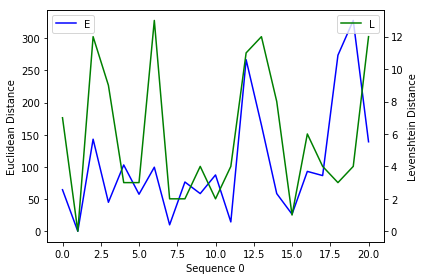

In [78]:
fig, ax = plt.subplots()
x = df2_eucl[1]
ax.plot(x, 'b')
ax.set_xlabel('Sequence 0')
ax.set_ylabel('Euclidean Distance')
plt.legend('Eucl')
ax2 = ax.twinx()

ax2.plot(df_leven2[1], 'g')
plt.legend('Leven')
ax2.set_ylabel('Levenshtein Distance')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

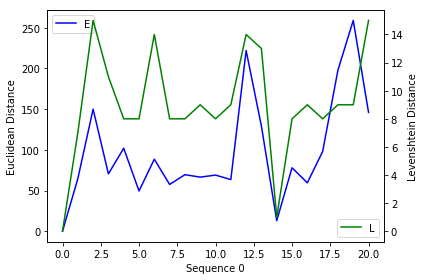

In [79]:
fig, ax = plt.subplots()
x = df2_eucl[0]
ax.plot(x, 'b')
ax.set_xlabel('Sequence 0')
ax.set_ylabel('Euclidean Distance')
plt.legend('Eucl')
ax2 = ax.twinx()

ax2.plot(df_leven2[0], 'g')
plt.legend('Leven')
ax2.set_ylabel('Levenshtein Distance')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Hamming Distance

In [131]:
print (li_padded[0])
print(li_padded[9])
distance.hamming(li_padded[0],li_padded[9])

[  0.   -7.5 -15.  -10.5  -6.   -1.5 -12.   -7.5 -11.  -15.5 -20.  -24.5
 -30.  -25.5 -21.  -12.5  -8.   -3.5  -8.   -3.5  -9.  -19.5 -15.   -9.5
  -5.   -0.5  -5.   -5.5  -9.    0.    0.    0. ]
[  0.  -10.5 -18.  -13.5  -9.   -9.5 -20.  -23.5 -27.  -31.5 -36.  -40.5
 -46.  -41.5 -37.  -28.5 -24.  -19.5 -24.  -19.5 -27.  -31.5 -42.  -37.5
 -32.  -27.5 -23.  -27.5 -28.  -31.5   0.    0. ]


29

### Difflib SequenceMatcher 

In [132]:
from difflib import SequenceMatcher

In [133]:
sm_data1_test1 = SequenceMatcher(None,li_padded[0],li_padded[2],)
sm_data1_test1.ratio()*100

12.5

In [134]:
sm_data1_test1 = SequenceMatcher(None,li_padded[42],li_padded[199],)
sm_data1_test1.ratio()*100


28.125

In [135]:
sm_data1_test2 = SequenceMatcher(None,li_padded[2],li_padded[1],)
sm_data1_test2.ratio()*100

78.125

In [136]:
sm_data2 = SequenceMatcher(None, "WKQENGMWYFYNTDGSM ALG","WKQENGMWYFYNTDGSM AIG")
sm_data2.ratio()*100

95.23809523809523

In [139]:
sm_data2_test2 = SequenceMatcher(None,li_padded2[2],li_padded2[12],)
sm_data2_test2.ratio()*100

36.36363636363637

In [138]:
sm_data2 = SequenceMatcher(None, "ADGSSASGESSVSGQSEASTSS","ADSSSAGGQQQESSVSSQSDQASTSSQLG")
sm_data2.ratio()*100

70.58823529411765

In [137]:
sm_data2_test1 = SequenceMatcher(None,li_padded2[0],li_padded2[14],)
sm_data2_test1.ratio()*100

90.9090909090909

In [ ]:
# Actual data line1= WKQENGMWYFYNTDGSM ATG and line2 = WKQENGMWYFYNTDGSM AIG
#line1 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,5.5,-3.5"
#line2= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,-1.5,-3.5"
# >> 98.36065573770492

line1 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 5.5 -3.5"
line2 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 -1.5 -3.5"
#>> 98.36065573770492
sm_data2 = SequenceMatcher(None, line1,line2)
sm_data2.ratio()*100

In [ ]:
# chanegd ATG to ALG and compared to AIG
line11 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-0.5,-3.5"
line21= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-1.5,-3.5"
sm_data2 = SequenceMatcher(None, line11,line21)
sm_data2.ratio()*100

In [ ]:
#line 18 and 19
#line18 = WLEYNGSWYYLNANGAM ATG
#line19 = WLEYNGSWYYLNSNGAM ATG
sm_data2_test3 = SequenceMatcher(None,li_padded2[18],li_padded2[19],)
sm_data2_test3.ratio()*100



In [ ]:
# lines 18 and 19 in data 2
line18 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

In [ ]:
#testing with 5 value changes
line18 = "-6.5,-1.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,5.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-10.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

In [151]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open(groEL.fasta),'fasta')
with open(output_file) as out_file:
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        new_sequence = some_function(sequence)
        write_fasta(out_file)

ModuleNotFoundError: No module named 'Bio'

In [ ]:
# Data 1 Order 1 TS 1 
pad_arr1_Order1_TS1

# Data 1 Order 2 TS 1
pad_arr1_Order2_TS1


# Data 1 Order 3 TS 1
pad_arr1_Order3_TS1


# Data 1 Order 1 TS 2
pad_arr1_Order1_TS2

# Data 1 Order 2 TS 2
pad_arr1_Order2_TS2

# Data 1 Order 3 TS 2
pad_arr1_Order3_TS2

In [ ]:
# Data 2 Order 1 TS 1 
pad_arr2_Order1_TS1

# Data 2 Order 2 TS 1
pad_arr2_Order2_TS1

# Data 2 Order 3 TS 1
pad_arr2_Order3_TS1

# Data 2 Order 1 TS 2
pad_arr2_Order1_TS2

# Data 2 Order 2 TS 2
pad_arr2_Order2_TS2

# Data 2 Order 3 TS 2
pad_arr2_Order3_TS2

In [ ]:
# Data 3 Order 1 TS 1 
pad_arr3_Order1_TS1


# Data 3 Order 2 TS 1
pad_arr3_Order2_TS1


# Data 3 Order 3 TS 1
pad_arr3_Order3_TS1

# Data 3 Order 1 TS 2
pad_arr3_Order1_TS2

# Data 3 Order 2 TS 2
pad_arr3_Order2_TS2

# Data 3 Order 3 TS 2
pad_arr3_Order3_TS2